<a href="https://colab.research.google.com/github/rogerjordan123/html/blob/master/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação do ambiente

##Download pacotes

In [ ]:
!pip install scikit-plot
!pip install optuna
!pip install pytorch-tabnet
!pip install openpyxl==3.0.9


     |████████████████████████████████| 308 kB 6.8 MB/s 
     |████████████████████████████████| 210 kB 33.9 MB/s 
     |████████████████████████████████| 80 kB 5.7 MB/s 
     |████████████████████████████████| 75 kB 4.8 MB/s 
     |████████████████████████████████| 112 kB 42.5 MB/s 
     |████████████████████████████████| 149 kB 45.0 MB/s 
     |████████████████████████████████| 49 kB 6.3 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=07c6a259ba4d2709fe8ef93d0570e0215924da48f1013274c858dcf687c93ea7
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
     |████████████████████████████████| 242 kB 6.4 MB/s 
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


## Bibliotecas

In [ ]:
import scikitplot as skplt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import f_regression,chi2
from sklearn.metrics.cluster import normalized_mutual_info_score
import torch.nn as nn

import optuna
from optuna.samplers import TPESampler

import matplotlib.pyplot as plt
import plotly.express as px

import warnings
from sklearn.exceptions import ConvergenceWarning

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## DB import

In [ ]:
data = pd.read_excel("/content/Covid_BDados_210521_soHD.xlsx")

In [ ]:
data.head()

In [ ]:
y0 = data["Obito_vazio_virou_0"]
X0 = data.drop(["Obito_vazio_virou_0"], axis=1)

In [ ]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, random_state=0, test_size=0.2, stratify = y0)
print('Labels in traning: {}'.format(set(y0_train)))

Labels in traning: {0, 1}


In [ ]:
train = pd.concat([X0_train, y0_train], axis=1)
test = pd.concat([X0_test,y0_test], axis=1)

In [ ]:
train.to_excel("Treino.xlsx")

In [ ]:
test.to_excel("Teste.xlsx")



---



In [ ]:
for col in future.columns:
  print(col, str(round(100*future[col].isnull().sum() / len(future), 2))+ "%")

id 0.0%
Código 0.0%
CNPJ 0.0%
Hospital 0.64%
Cidade 0.0%
UF 0.0%
Região 0.0%
CEP 0.0%
Telefone 0.0%
Ramal_Voz 64.74%
Email 0.0%
Responsável 0.0%
Preenchedor 0.0%
PreenchedorFuncao 0.0%
TipoDeUnidade 0.0%
DtCadastro 0.0%
Total_dial 0.0%
Total_HD 0.0%
Total_DP 0.0%
cpf 0.0%
cpfOriginal 0.0%
IniciaisNome 0.0%
DiaFinanciadaSetor 0.0%
dataNasc 0.0%
Idade 0.0%
dataPrimDialVida 0.0%
Raça 0.0%
Sexo 0.0%
Método Dialítico 0.0%
Peso 0.0%
Altura 0.0%
Uso de inibidor de ECA ou bloqueador de receptor de angiotensina II 0.0%
Acesso Vascular 2.24%
Transplante renal prévio? 0.0%
Hipertensão 0.0%
Diabetes Mellitus 0.0%
Infarto do Miocárdio  0.0%
Insuficiência Cardíaca 0.0%
Doença Vascular periférica 0.0%
Acidente Vascular Cerebral 0.0%
Demência 0.0%
Doença Pulmonar Obstrutiva 0.0%
Doença hepática ou cirrose 0.0%
Neoplasia atual ou prévia 0.0%
HIV 0.0%
Etilismo 0.0%
Tabagismo atual 0.0%
Tabagismo prévio 0.0%
Foi vacinado contra a Covid-19? 0.0%
Se sim, imunizante: 35.58%
Dt. prim. dose 35.58%
Dt. seg. do

In [ ]:
future = pd.read_excel("/content/Banco_Treino.xlsx")

In [ ]:
for col in future.columns:
  print(col, str(round(100*future[col].isnull().sum() / len(future), 2))+ "%")

Unnamed: 0 0.0%
id 0.0%
Código 0.0%
CNPJ 0.0%
Hospital 4.51%
Responsável 0.0%
Cidade 0.0%
UF 0.0%
Sudeste 0.0%
Sul 0.0%
Centro-Oeste 0.0%
Norte 0.0%
Nordeste 0.0%
Região 0.0%
CEP 0.0%
Telefone 0.0%
Ramal_Voz 63.74%
Email 0.0%
Preenchedor 0.0%
PreenchedorFuncao 0.0%
TipoDeUnidade 1.59%
DtCadastro 0.0%
Total_dial 13.2%
Total_HD 0.0%
Total_DP 1.67%
cpf 0.0%
IniciaisNome 26.73%
DiaFinanciadaSetor 0.08%
dataNasc 0.58%
dataPrimDialVida 22.47%
Raça 0.17%
Sexo 0.17%
MétodoDialítico 0.0%
Peso 0.0%
Altura 0.75%
UsodeinibidordeECAoubloqueadordereceptordeangiotensinaII 4.85%
AcessoVascular 0.67%
Transplanterenalprévio 2.76%
Hipertensão 12.28%
DiabetesMellitus 57.56%
InfartodoMiocárdio 94.24%
InsuficiênciaCardíaca 84.46%
DoençaVascularperiférica 94.07%
AcidenteVascularCerebral 96.41%
Demência 98.41%
DoençaPulmonarObstrutiva 97.33%
Doençahepáticaoucirrose 98.33%
Neoplasiaatualouprévia 96.74%
HIV 99.33%
Etilismo 97.99%
Tabagismoatual 97.83%
Tabagismoprévio 93.07%
TestediagnósticoparaCOVIDSwabnasaloro

In [ ]:
#Para cada coluna da tabela (de TODO O BANCO), verifica a porcentagem de células que estão vazias
for col in data.columns:
  print(col, str(round(100*data[col].isnull().sum() / len(data), 2))+ "%")

id 0.0%
Código 0.0%
CNPJ 0.0%
Hospital 4.21%
Responsável 0.0%
Cidade 0.0%
UF 0.0%
Sudeste 0.0%
Sul 0.0%
Centro-Oeste 0.0%
Norte 0.0%
Nordeste 0.0%
Região 0.0%
CEP 0.0%
Telefone 0.0%
Ramal_Voz 63.59%
Email 0.0%
Preenchedor 0.0%
PreenchedorFuncao 0.0%
TipoDeUnidade 1.47%
DtCadastro 0.0%
Total_dial 13.96%
Total_HD 0.0%
Total_DP 1.47%
cpf 0.0%
IniciaisNome 26.45%
DiaFinanciadaSetor 0.07%
dataNasc 0.53%
dataPrimDialVida 22.78%
Raça 0.2%
Sexo 0.2%
MétodoDialítico 0.0%
Peso 0.0%
Altura 0.67%
UsodeinibidordeECAoubloqueadordereceptordeangiotensinaII 4.41%
AcessoVascular 0.6%
Transplanterenalprévio 2.54%
Hipertensão 12.63%
DiabetesMellitus 57.85%
InfartodoMiocárdio 94.66%
InsuficiênciaCardíaca 85.1%
DoençaVascularperiférica 94.12%
AcidenteVascularCerebral 96.19%
Demência 98.46%
DoençaPulmonarObstrutiva 97.19%
Doençahepáticaoucirrose 98.53%
Neoplasiaatualouprévia 96.93%
HIV 99.2%
Etilismo 98.2%
Tabagismoatual 97.73%
Tabagismoprévio 93.05%
TestediagnósticoparaCOVIDSwabnasalorofaringertPCR 2.27%
Te

---
---
# Dataset splitting

##C_H_data << dados da história clínica

In [ ]:
C_H_data = data[[
                  "Uso_ISRAA_Num",
                  "TxRenalprevio_Num",
                  "DM_Num",
                  "Acesso_Vasc_Num", 
                  "IMC_dic", 
                  "Idade",
                  "Sexo_Numérico",
                  "AVC_Num", 
                  "HAS_Num", 
                  "HIV_Num", 
                  "ICC_Num", 
                  "DHepCron_Num", 
                  "DPOC_Num", 
                  "Demência_Num", 
                  "DVP_Num", 
                  "Etilismo_Num",
                  "InfartoM_Num", 
                  "Neo_Atual_Pass_Num",
                  "Tabag_Atual_Num", 
                  "Tabag_Prévio_Num",
                 "Obito_vazio_virou_0"
                  ]]

In [ ]:
# Verifica a porcentagem de células que estão vazias no subset de História Clínica
for col in C_H_data.columns:
  print(col, str(round(100*C_H_data[col].isnull().sum() / len(C_H_data), 2))+ "%")

Uso_ISRAA_Num 4.41%
TxRenalprevio_Num 2.54%
DM_Num 0.0%
Acesso_Vasc_Num 0.6%
IMC_dic 1.14%
Idade 1.6%
Sexo_Numérico 0.2%
AVC_Num 0.0%
HAS_Num 0.0%
HIV_Num 0.0%
ICC_Num 0.0%
DHepCron_Num 0.0%
DPOC_Num 0.0%
Demência_Num 0.0%
DVP_Num 0.0%
Etilismo_Num 0.0%
InfartoM_Num 0.0%
Neo_Atual_Pass_Num 0.0%
Tabag_Atual_Num 0.0%
Tabag_Prévio_Num 0.0%
Obito_vazio_virou_0 0.0%


In [ ]:
# Verifica o tamanho do subset de História Clínica
C_H_data.shape

(1497, 21)

## S_data << dados dos sintomas

In [ ]:
S_data = data[[
             "Febre",
             "Tosse",
             "Dispneia",
             "FadigaMalestar",
             "Mialgia",
             "Sintomasgastrointestinais",
             "ConfusãoMental",
             "Assintomático",
             "Obito_vazio_virou_0"
]]

Obs: nenhum desses tem faltantes!!


## C_data << dados história clínica + sintomas

In [ ]:
C_data = data[[   "Obito_vazio_virou_0",
                  "Uso_ISRAA_Num",
                  "TxRenalprevio_Num",
                  "DM_Num",
                  "Acesso_Vasc_Num", 
                  "IMC_dic", 
                  "Idade",
                  "Sexo_Numérico",
                  "AVC_Num", 
                  "HAS_Num", 
                  "HIV_Num", 
                  "ICC_Num", 
                  "DHepCron_Num", 
                  "DPOC_Num", 
                  "Demência_Num", 
                  "DVP_Num", 
                  "Etilismo_Num",
                  "InfartoM_Num", 
                  "Neo_Atual_Pass_Num",
                  "Tabag_Atual_Num", 
                  "Tabag_Prévio_Num", 
                  "Febre",
                  "Tosse",
                  "Dispneia",
                  "FadigaMalestar",
                  "Mialgia",
                  "Sintomasgastrointestinais",
                  "ConfusãoMental",
                  "Assintomático"
                
]]

In [ ]:
# Verifica a porcentagem de células que estão vazias no subset de história clínica + sintomas
for col in C_data.columns:
  print(col, str(round(100*data[col].isnull().sum() / len(data), 2))+ "%")

Obito_vazio_virou_0 0.0%
Uso_ISRAA_Num 4.41%
TxRenalprevio_Num 2.54%
DM_Num 0.0%
Acesso_Vasc_Num 0.6%
IMC_dic 1.14%
Idade 1.6%
Sexo_Numérico 0.2%
AVC_Num 0.0%
HAS_Num 0.0%
HIV_Num 0.0%
ICC_Num 0.0%
DHepCron_Num 0.0%
DPOC_Num 0.0%
Demência_Num 0.0%
DVP_Num 0.0%
Etilismo_Num 0.0%
InfartoM_Num 0.0%
Neo_Atual_Pass_Num 0.0%
Tabag_Atual_Num 0.0%
Tabag_Prévio_Num 0.0%
Febre 0.0%
Tosse 0.0%
Dispneia 0.0%
FadigaMalestar 0.0%
Mialgia 0.0%
Sintomasgastrointestinais 0.0%
ConfusãoMental 0.0%
Assintomático 0.0%


In [ ]:
# Verifica o tamanho do subset de história clínica + sintomas
C_data.shape

(1497, 29)

---
Nan = -1

In [ ]:
C_H_data = C_H_data.fillna(-1)
S_data = S_data.fillna(-1)
C_data = C_data.fillna(-1)

In [ ]:
C_H_data = C_H_data.astype('int64')
S_data = S_data.astype('int64')
C_data = C_data.astype('int64')

---
---
# TREINAMENTO

##História Clínica
Treinamento de cada subset sem seleção de variáveis

In [ ]:
y1 = C_H_data["Obito_vazio_virou_0"]
X1 =  C_H_data.drop(["Obito_vazio_virou_0"], axis=1)

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0, test_size=0.2, stratify = y1)


print('Labels in traning: {}'.format(set(y1_train)))
print('Zero count = {}, One count = {}'.format (len(y1_train) - sum(y1_train), sum(y1_train)))


print('Labels in test: {}'.format(set(y1_test)))
print('Zero count = {}, One count = {}'.format (len(y1_test) - sum(y1_test), sum(y1_test)))

Labels in traning: {0, 1}
Zero count = 966, One count = 231
Labels in test: {0, 1}
Zero count = 242, One count = 58


In [ ]:
# Defining Optuna's func
def objective(trial):
  criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
  max_depth = trial.suggest_int("max_depth",2,32,log=True)
  n_estimators = trial.suggest_int("n_estimators",100,500)
  class_weight = trial.suggest_categorical("class_weight",["balanced", "balanced_subsample", None])
  

  rf = RandomForestClassifier(criterion=criterion,
                              max_depth=max_depth,
                              n_estimators=n_estimators,
                              class_weight=class_weight
                              )

  # Stratified 10 fold 
  score =  cross_val_score(rf, X1_train, y1_train, n_jobs=-1, cv = 10, scoring = "recall")
  recall = score.mean()
  return recall

# Apllying it to a study (object)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2021-09-15 13:44:42,120] A new study created in memory with name: no-name-88c80e26-94c7-4a94-8209-7ed34cde689a
[I 2021-09-15 13:44:49,977] Trial 0 finished with value: 0.13876811594202895 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'n_estimators': 277, 'class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.13876811594202895.
[I 2021-09-15 13:44:58,367] Trial 1 finished with value: 0.13442028985507243 and parameters: {'criterion': 'gini', 'max_depth': 18, 'n_estimators': 490, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.13876811594202895.
[I 2021-09-15 13:45:04,517] Trial 2 finished with value: 0.5110507246376811 and parameters: {'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 464, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.5110507246376811.
[I 2021-09-15 13:45:08,611] Trial 3 finished with value: 0.567391304347826 and parameters: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 233, 'class_weight': 'balanced_subs

Recall: 0.567391304347826
Best hyperparameters: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 233, 'class_weight': 'balanced_subsample'}
              precision    recall  f1-score   support

           0       0.87      0.70      0.78       242
           1       0.31      0.57      0.40        58

    accuracy                           0.67       300
   macro avg       0.59      0.63      0.59       300
weighted avg       0.76      0.67      0.70       300



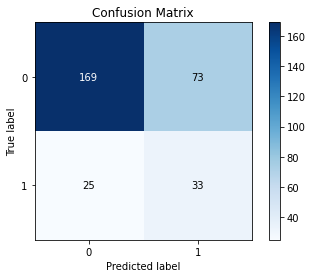

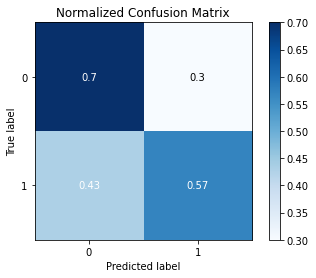

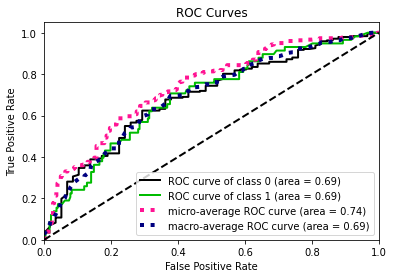

In [ ]:
# Retrieve and show the best configuration
trial = study.best_trial
print("Recall: {}".format(trial.value))
print("Best hyperparameters: {}".format(trial.params))
rf_recall = RandomForestClassifier(
    **trial.params
)
rf_recall.fit(X1_train, y1_train)
preds = rf_recall.predict(X1_test)
probs = rf_recall.predict_proba(X1_test)
print(metrics.classification_report(y1_test,preds))

skplt.metrics.plot_confusion_matrix(y1_test, preds, normalize=False)
skplt.metrics.plot_confusion_matrix(y1_test, preds, normalize=True)
skplt.metrics.plot_roc(y1_test, probs)
plt.show()

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_slice(study)

**Xgboost**

In [ ]:
def objective(trial):

  max_depth = trial.suggest_int("max_depth",1,5)
  gamma = trial.suggest_uniform('gamma', 0, 5)
  reg_lambda = trial.suggest_int('reg_lambda', 0, 5)
  min_child_weight = trial.suggest_int('min_child_weight', 5, 20)
  n_estimators = trial.suggest_int("n_estimators",100, 1000)
  early_stopping_rounds = trial.suggest_int("early_stopping_rounds",5,30)
  learning_rate = trial.suggest_loguniform('learning_rate',0.00001,1)
  base_score = trial.suggest_uniform("base_score",0.1, 0.9)


  xgb = XGBClassifier(max_depth=max_depth,
                    gamma=gamma,
                    reg_lambda=reg_lambda,
                    min_child_weight=min_child_weight,
                    n_estimators=n_estimators,
                    early_stopping_rounds=early_stopping_rounds,
                    learning_rate=learning_rate,
                    base_score=base_score
                    )
  
  score =  cross_val_score(xgb, X1_train, y1_train, cv = 5, n_jobs=-1, scoring = "balanced_accuracy")
  balanced_accuracy = score.mean()
  return balanced_accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)

[I 2021-09-15 14:30:49,234] A new study created in memory with name: no-name-33748533-82a8-4c86-9662-b6058750a53b
[I 2021-09-15 14:30:50,171] Trial 0 finished with value: 0.5 and parameters: {'max_depth': 3, 'gamma': 4.518657631428498, 'reg_lambda': 2, 'min_child_weight': 12, 'n_estimators': 342, 'early_stopping_rounds': 25, 'learning_rate': 0.0029313741989406917, 'base_score': 0.7155215747491629}. Best is trial 0 with value: 0.5.
[I 2021-09-15 14:30:51,562] Trial 1 finished with value: 0.5 and parameters: {'max_depth': 2, 'gamma': 2.3915768368164803, 'reg_lambda': 0, 'min_child_weight': 10, 'n_estimators': 653, 'early_stopping_rounds': 17, 'learning_rate': 0.04621382231959682, 'base_score': 0.37666550937780074}. Best is trial 0 with value: 0.5.
[I 2021-09-15 14:30:52,028] Trial 2 finished with value: 0.5 and parameters: {'max_depth': 1, 'gamma': 4.827579765620211, 'reg_lambda': 1, 'min_child_weight': 10, 'n_estimators': 283, 'early_stopping_rounds': 25, 'learning_rate': 0.588342188441

Balanced_accuracy: 0.6154040210005227
Best hyperparameters: {'max_depth': 2, 'gamma': 0.8381499532816701, 'reg_lambda': 2, 'min_child_weight': 10, 'n_estimators': 520, 'early_stopping_rounds': 17, 'learning_rate': 0.0007076488009110018, 'base_score': 0.6506620312277465}
              precision    recall  f1-score   support

           0       0.89      0.55      0.68       242
           1       0.28      0.72      0.40        58

    accuracy                           0.58       300
   macro avg       0.59      0.64      0.54       300
weighted avg       0.77      0.58      0.63       300



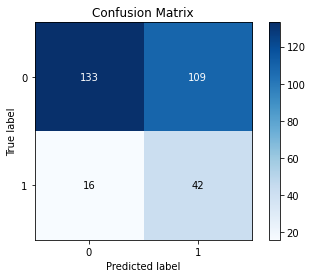

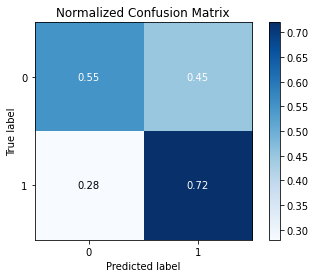

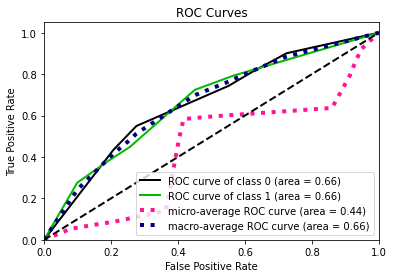

In [ ]:
trial = study.best_trial
print("Balanced_accuracy: {}".format(trial.value))
print("Best hyperparameters: {}".format(trial.params))
xgb_acc = XGBClassifier(
    **trial.params
)
xgb_acc.fit(X1_train, y1_train)
preds = xgb_acc.predict(X1_test)
probs = xgb_acc.predict_proba(X1_test)
print(metrics.classification_report(y1_test,preds))

skplt.metrics.plot_confusion_matrix(y1_test, preds, normalize=False)
skplt.metrics.plot_confusion_matrix(y1_test, preds, normalize=True)
skplt.metrics.plot_roc(y1_test, probs)
plt.show()

Correlação mattheus

In [ ]:
np.corrcoef(y1_test,preds)



array([[1.       , 0.2161992],
       [0.2161992, 1.       ]])

**Binarização da idade para o suportvectormachine**

In [ ]:
C_H_data["Idade_num"] = pd.cut(C_H_data["Idade"], bins=[-10,0,65,200],labels=[-1, 0, 1])

In [ ]:
C_H_data = C_H_data.drop(["Idade"], axis=1)

In [ ]:
y1 = C_H_data["Obito_vazio_virou_0"]
X1 =  C_H_data.drop(["Obito_vazio_virou_0"], axis=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0, test_size=0.2, stratify = y1)
print('Labels in traning: {}'.format(set(y1_train)))
print('Zero count = {}, One count = {}'.format (len(y1_train) - sum(y1_train), sum(y1_train)))
print('Labels in test: {}'.format(set(y1_test)))
print('Zero count = {}, One count = {}'.format (len(y1_test) - sum(y1_test), sum(y1_test)))

Labels in traning: {0, 1}
Zero count = 966, One count = 231
Labels in test: {0, 1}
Zero count = 242, One count = 58


In [ ]:
X1_train, X1_test, y1_train, y1_test = X1_train.to_numpy(), X1_test.to_numpy(), y1_train.to_numpy(), y1_test.to_numpy()

In [ ]:
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
predictions_array =[]
proba_array = []
CV_score_array    =[]
for train_index, test_index in kf.split(X1_train,y1_train):
    X_train, X_valid = X1_train[train_index], X1_train[test_index]
    y_train, y_valid = y1_train[train_index], y1_train[test_index]
    classifier = TabNetClassifier(verbose=0,seed=42)
    classifier.fit(X_train=X_train, y_train=y_train,
              eval_set=[(X_valid, y_valid)],
              patience=50, max_epochs=2000,
              eval_metric=['balanced_accuracy'])
    CV_score_array.append(classifier.best_cost)
    predictions_array.append(classifier.predict(X1_test))
    proba_array.append(classifier.predict_proba(X1_test))
     

predictions = np.mean(CV_score_array,axis=0)
predictions_array = np.asarray(predictions_array)
proba_array = np.asarray(proba_array)


Early stopping occurred at epoch 67 with best_epoch = 17 and best_val_0_balanced_accuracy = 0.54124
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 111 with best_epoch = 61 and best_val_0_balanced_accuracy = 0.60914
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 51 with best_epoch = 1 and best_val_0_balanced_accuracy = 0.61528
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 71 with best_epoch = 21 and best_val_0_balanced_accuracy = 0.5949
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 60 with best_epoch = 10 and best_val_0_balanced_accuracy = 0.56775
Best weights from best epoch are automatically used!


In [ ]:
pred = predictions_array[:][4]
prob = proba_array[:][4]

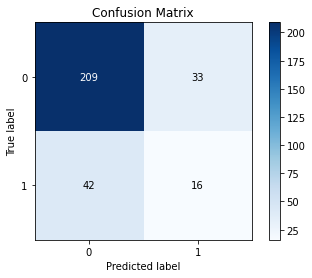

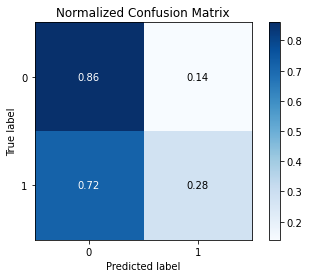

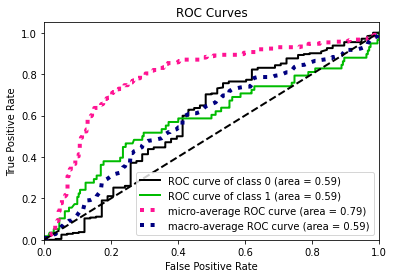

In [ ]:
skplt.metrics.plot_confusion_matrix(y1_test, pred, normalize=False)
skplt.metrics.plot_confusion_matrix(y1_test, pred, normalize=True)
skplt.metrics.plot_roc(y1_test, prob)
plt.show()

In [ ]:
np.corrcoef(y1_test,pred)

array([[1.        , 0.14902396],
       [0.14902396, 1.        ]])

In [ ]:
def objective(trial):

  eta0 = trial.suggest_loguniform("eta0", 0.001, 1)
  epsilon = trial.suggest_loguniform("epsilon", 0.01, 1)
  class_weight = trial.suggest_categorical("class_weight",["balanced", None])
  learning_rate = trial.suggest_categorical("learning_rate",[ "optimal", "invscaling", "adaptive"])


  svm = SGDClassifier(       epsilon=epsilon,
                    class_weight=class_weight,
                    learning_rate=learning_rate,
                    eta0=eta0
                    )
  
  score =  cross_val_score(svm, X1_train, y1_train, cv = 5, n_jobs=-1, scoring = "balanced_accuracy")
  balanced_accuracy = score.mean()
  return balanced_accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)

[I 2021-09-22 17:40:33,993] A new study created in memory with name: no-name-0464afc1-cfa2-4314-b2d3-f552adf3fa90
[I 2021-09-22 17:40:34,030] Trial 0 finished with value: 0.5 and parameters: {'eta0': 0.32551436879990525, 'epsilon': 0.30104532722020594, 'class_weight': None, 'learning_rate': 'invscaling'}. Best is trial 0 with value: 0.5.
[I 2021-09-22 17:40:34,085] Trial 1 finished with value: 0.5 and parameters: {'eta0': 0.3040538610562739, 'epsilon': 0.08891496125858435, 'class_weight': None, 'learning_rate': 'adaptive'}. Best is trial 0 with value: 0.5.
[I 2021-09-22 17:40:34,129] Trial 2 finished with value: 0.5366780917174097 and parameters: {'eta0': 0.28703229211931763, 'epsilon': 0.027607013861128616, 'class_weight': 'balanced', 'learning_rate': 'optimal'}. Best is trial 2 with value: 0.5366780917174097.
[I 2021-09-22 17:40:34,184] Trial 3 finished with value: 0.5231912882489208 and parameters: {'eta0': 0.3357420668258629, 'epsilon': 0.022095179604878844, 'class_weight': None, '

Balanced_accuracy: 0.6216138994330349
Best hyperparameters: {'eta0': 0.0010472158755028354, 'epsilon': 0.95872671902272, 'class_weight': 'balanced', 'learning_rate': 'adaptive'}
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       242
           1       0.32      0.60      0.42        58

    accuracy                           0.68       300
   macro avg       0.60      0.65      0.60       300
weighted avg       0.77      0.68      0.71       300



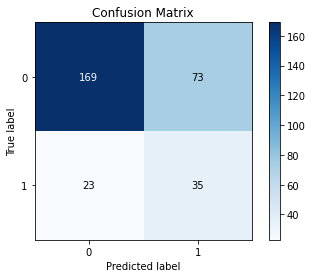

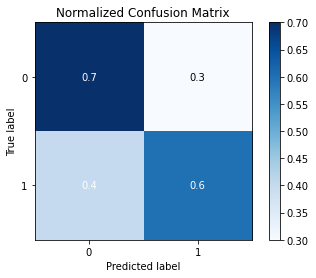

In [ ]:
trial = study.best_trial
print("Balanced_accuracy: {}".format(trial.value))
print("Best hyperparameters: {}".format(trial.params))
svm_acc = SGDClassifier(
    **trial.params

)
svm_acc.fit(X1_train, y1_train)
preds = svm_acc.predict(X1_test)
#probs = svm_acc.predict_proba(X1_test)
print(metrics.classification_report(y1_test,preds))

skplt.metrics.plot_confusion_matrix(y1_test, preds, normalize=False)
skplt.metrics.plot_confusion_matrix(y1_test, preds, normalize=True)
#skplt.metrics.plot_roc(y1_test, probs)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

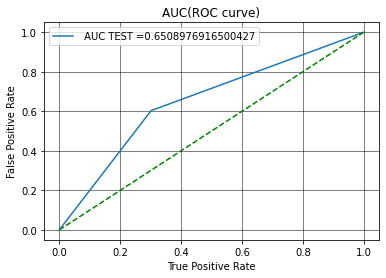

In [ ]:

test_fpr, test_tpr, te_thresholds = roc_curve(y1_test, preds)
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [ ]:
def objective(trial):

  n_neighbors = trial.suggest_int("n_neighbors", 2, 100)
  weights = trial.suggest_categorical("weights",['uniform', 'distance'])


  knn = KNeighborsClassifier(       n_neighbors,
                             weights= weights
                    
                    )
  
  score =  cross_val_score(knn, X1_train, y1_train, cv = 5, n_jobs=-1, scoring = "balanced_accuracy")
  balanced_accuracy = score.mean()
  return balanced_accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)

[I 2021-09-15 16:03:02,413] A new study created in memory with name: no-name-065d1f20-755d-428b-9029-eac9f09fb917
[I 2021-09-15 16:03:02,532] Trial 0 finished with value: 0.5369878844620413 and parameters: {'n_neighbors': 93, 'weights': 'distance'}. Best is trial 0 with value: 0.5369878844620413.
[I 2021-09-15 16:03:02,642] Trial 1 finished with value: 0.5369878844620413 and parameters: {'n_neighbors': 66, 'weights': 'distance'}. Best is trial 0 with value: 0.5369878844620413.
[I 2021-09-15 16:03:02,763] Trial 2 finished with value: 0.5369878844620413 and parameters: {'n_neighbors': 92, 'weights': 'distance'}. Best is trial 0 with value: 0.5369878844620413.
[I 2021-09-15 16:03:02,862] Trial 3 finished with value: 0.5369878844620413 and parameters: {'n_neighbors': 28, 'weights': 'distance'}. Best is trial 0 with value: 0.5369878844620413.
[I 2021-09-15 16:03:03,000] Trial 4 finished with value: 0.5 and parameters: {'n_neighbors': 75, 'weights': 'uniform'}. Best is trial 0 with value: 0.

Balanced_accuracy: 0.5393182924032587
Best hyperparameters: {'n_neighbors': 13, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       242
           1       0.30      0.10      0.15        58

    accuracy                           0.78       300
   macro avg       0.56      0.52      0.51       300
weighted avg       0.71      0.78      0.73       300



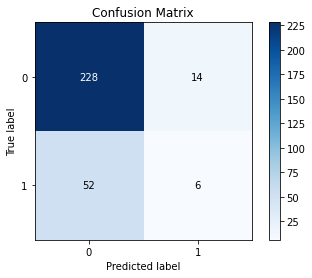

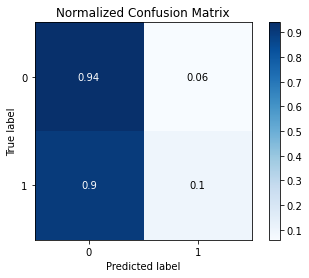

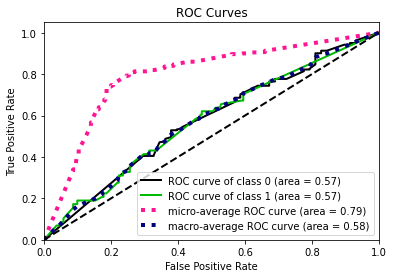

In [ ]:
trial = study.best_trial
print("Balanced_accuracy: {}".format(trial.value))
print("Best hyperparameters: {}".format(trial.params))
knn_acc = KNeighborsClassifier(
    **trial.params
)
knn_acc.fit(X1_train, y1_train)
preds = knn_acc.predict(X1_test)
probs = knn_acc.predict_proba(X1_test)
print(metrics.classification_report(y1_test,preds))

skplt.metrics.plot_confusion_matrix(y1_test, preds, normalize=False)
skplt.metrics.plot_confusion_matrix(y1_test, preds, normalize=True)
skplt.metrics.plot_roc(y1_test, probs)
plt.show()

## Treinando os dados dos sinais clínicos e sintomas

In [ ]:
y2 = S_data["Obito_vazio_virou_0"]
X2 =  S_data.drop(["Obito_vazio_virou_0"], axis=1)

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0, test_size=0.2, stratify = y2)
print('Labels in traning: {}'.format(set(y2_train)))
print('Zero count = {}, One count = {}'.format (len(y2_train) - sum(y2_train), sum(y2_train)))
print('Labels in test: {}'.format(set(y2_test)))
print('Zero count = {}, One count = {}'.format (len(y2_test) - sum(y2_test), sum(y2_test)))

Labels in traning: {0, 1}
Zero count = 966, One count = 231
Labels in test: {0, 1}
Zero count = 242, One count = 58


In [ ]:
def objective(trial):
  criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
  max_depth = trial.suggest_int("max_depth",2,32,log=True)
  n_estimators = trial.suggest_int("n_estimators",100,500)
  class_weight = trial.suggest_categorical("class_weight",["balanced", "balanced_subsample", None])
  

  rf = RandomForestClassifier(criterion=criterion,
                              max_depth=max_depth,
                              n_estimators=n_estimators,
                              class_weight=class_weight
                              )

  
  score =  cross_val_score(rf, X2_train, y2_train, n_jobs=-1, cv = 10, scoring = "recall")
  recall = score.mean()
  return recall


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)

[I 2021-09-15 16:13:42,204] A new study created in memory with name: no-name-27cf05bc-487d-459d-be00-aabc180c3ed9
[I 2021-09-15 16:13:49,042] Trial 0 finished with value: 0.6275362318840579 and parameters: {'criterion': 'entropy', 'max_depth': 21, 'n_estimators': 402, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.6275362318840579.
[I 2021-09-15 16:13:55,828] Trial 1 finished with value: 0.09927536231884057 and parameters: {'criterion': 'entropy', 'max_depth': 23, 'n_estimators': 483, 'class_weight': None}. Best is trial 0 with value: 0.6275362318840579.
[I 2021-09-15 16:14:00,515] Trial 2 finished with value: 0.6318840579710143 and parameters: {'criterion': 'entropy', 'max_depth': 13, 'n_estimators': 325, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.6318840579710143.
[I 2021-09-15 16:14:04,914] Trial 3 finished with value: 0.6231884057971013 and parameters: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 240, 'class_weight': 'balanced_subsample'}. Best 

Recall: 0.740036231884058
Best hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 298, 'class_weight': 'balanced'}
              precision    recall  f1-score   support

           0       0.86      0.71      0.78       242
           1       0.30      0.53      0.39        58

    accuracy                           0.67       300
   macro avg       0.58      0.62      0.58       300
weighted avg       0.76      0.67      0.70       300



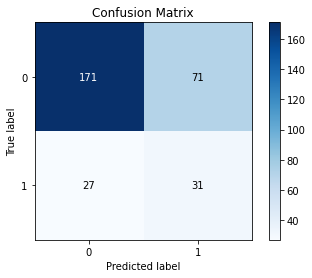

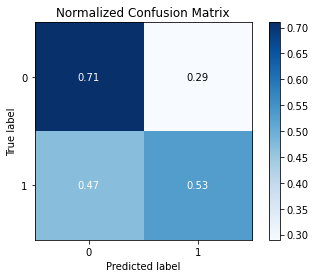

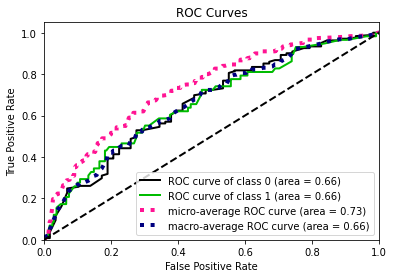

In [ ]:

trial = study.best_trial
print("Recall: {}".format(trial.value))
print("Best hyperparameters: {}".format(trial.params))
rf_recall_1 = RandomForestClassifier(
    **trial.params
)
rf_recall_1.fit(X2_train, y2_train)
preds = rf_recall_1.predict(X2_test)
probs = rf_recall_1.predict_proba(X2_test)
print(metrics.classification_report(y2_test,preds))

skplt.metrics.plot_confusion_matrix(y2_test, preds, normalize=False)
skplt.metrics.plot_confusion_matrix(y2_test, preds, normalize=True)
skplt.metrics.plot_roc(y2_test, probs)
plt.show()

In [ ]:
np.corrcoef(y2_test,preds)

array([[1.        , 0.20099071],
       [0.20099071, 1.        ]])

In [ ]:
def objective(trial):

  max_depth = trial.suggest_int("max_depth",1,5)
  gamma = trial.suggest_uniform('gamma', 0, 5)
  reg_lambda = trial.suggest_int('reg_lambda', 0, 5)
  min_child_weight = trial.suggest_int('min_child_weight', 5, 20)
  n_estimators = trial.suggest_int("n_estimators",100, 1000)
  early_stopping_rounds = trial.suggest_int("early_stopping_rounds",5,30)
  learning_rate = trial.suggest_loguniform('learning_rate',0.00001,1)
  base_score = trial.suggest_uniform("base_score",0.1, 0.9)


  xgb = XGBClassifier(max_depth=max_depth,
                    gamma=gamma,
                    reg_lambda=reg_lambda,
                    min_child_weight=min_child_weight,
                    n_estimators=n_estimators,
                    early_stopping_rounds=early_stopping_rounds,
                    learning_rate=learning_rate,
                    base_score=base_score
                    )
  
  score =  cross_val_score(xgb, X2_train, y2_train, cv = 5, n_jobs=-1, scoring = "balanced_accuracy")
  balanced_accuracy = score.mean()
  return balanced_accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)

[I 2021-09-15 16:29:03,250] A new study created in memory with name: no-name-06c8f9ec-047b-4684-a75b-3f22c2255185
[I 2021-09-15 16:29:06,195] Trial 0 finished with value: 0.5 and parameters: {'max_depth': 4, 'gamma': 2.3559484621395117, 'reg_lambda': 4, 'min_child_weight': 9, 'n_estimators': 883, 'early_stopping_rounds': 19, 'learning_rate': 0.00018016602244935699, 'base_score': 0.13850548346082212}. Best is trial 0 with value: 0.5.
[I 2021-09-15 16:29:07,007] Trial 1 finished with value: 0.5 and parameters: {'max_depth': 1, 'gamma': 0.6502713647140301, 'reg_lambda': 4, 'min_child_weight': 16, 'n_estimators': 730, 'early_stopping_rounds': 22, 'learning_rate': 0.0034192316909652212, 'base_score': 0.12030882575320323}. Best is trial 0 with value: 0.5.
[I 2021-09-15 16:29:08,825] Trial 2 finished with value: 0.5 and parameters: {'max_depth': 5, 'gamma': 4.123918391456789, 'reg_lambda': 4, 'min_child_weight': 13, 'n_estimators': 901, 'early_stopping_rounds': 24, 'learning_rate': 0.00238193

Balanced_accuracy: 0.7128022738690605
Best hyperparameters: {'max_depth': 3, 'gamma': 4.479178838986393, 'reg_lambda': 2, 'min_child_weight': 7, 'n_estimators': 100, 'early_stopping_rounds': 7, 'learning_rate': 0.008037186642197647, 'base_score': 0.8408207252368054}
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       242
           1       0.38      0.71      0.49        58

    accuracy                           0.72       300
   macro avg       0.64      0.71      0.65       300
weighted avg       0.81      0.72      0.74       300



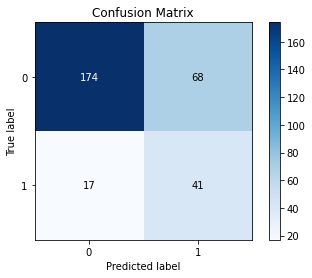

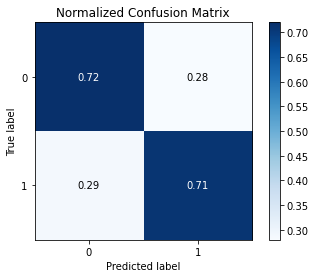

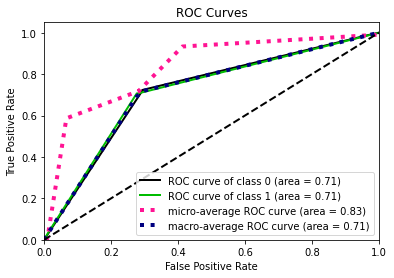

In [ ]:
trial = study.best_trial
print("Balanced_accuracy: {}".format(trial.value))
print("Best hyperparameters: {}".format(trial.params))
xgb_acc_1 = XGBClassifier(
    **trial.params
)
xgb_acc_1.fit(X2_train, y2_train)
preds = xgb_acc_1.predict(X2_test)
probs = xgb_acc_1.predict_proba(X2_test)
print(metrics.classification_report(y2_test,preds))

skplt.metrics.plot_confusion_matrix(y2_test, preds, normalize=False)
skplt.metrics.plot_confusion_matrix(y2_test, preds, normalize=True)
skplt.metrics.plot_roc(y2_test, probs)
plt.show()

In [ ]:
np.corrcoef(y2_test,preds)

NameError: ignored

In [ ]:
X2_train, X2_test, y2_train, y2_test = X2_train.to_numpy(), X2_test.to_numpy(), y2_train.to_numpy(), y2_test.to_numpy()

NameError: ignored

In [ ]:
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
predictions_array =[]
proba_array = []
CV_score_array    =[]
for train_index, test_index in kf.split(X2_train,y2_train):
    X_train, X_valid = X2_train[train_index], X2_train[test_index]
    y_train, y_valid = y2_train[train_index], y2_train[test_index]
    classifier = TabNetClassifier(verbose=0,seed=42)
    classifier.fit(X_train=X_train, y_train=y_train,
              eval_set=[(X_valid, y_valid)],
              patience=50, max_epochs=2000,
              eval_metric=['balanced_accuracy'])
    CV_score_array.append(classifier.best_cost)
    predictions_array.append(classifier.predict(X2_test))
    proba_array.append(classifier.predict_proba(X2_test))
     

predictions = np.mean(CV_score_array,axis=0)
predictions_array = np.asarray(predictions_array)
proba_array = np.asarray(proba_array)


Early stopping occurred at epoch 51 with best_epoch = 1 and best_val_0_balanced_accuracy = 0.54919
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 52 with best_epoch = 2 and best_val_0_balanced_accuracy = 0.51869
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 60 with best_epoch = 10 and best_val_0_balanced_accuracy = 0.51656
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 52 with best_epoch = 2 and best_val_0_balanced_accuracy = 0.53002
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 154 with best_epoch = 104 and best_val_0_balanced_accuracy = 0.57969
Best weights from best epoch are automatically used!


In [ ]:
predictions_array[:][4]
proba_array[:][4]

array([[0.7479815 , 0.25201854],
       [0.9202151 , 0.07978488],
       [0.71378917, 0.28621083],
       [0.7415822 , 0.25841781],
       [0.9202151 , 0.07978488],
       [0.7415822 , 0.25841781],
       [0.7681184 , 0.23188157],
       [0.48446828, 0.5155318 ],
       [0.7479815 , 0.25201854],
       [0.71378917, 0.28621083],
       [0.57180285, 0.42819715],
       [0.90074784, 0.09925218],
       [0.47746545, 0.5225345 ],
       [0.7994482 , 0.20055181],
       [0.5241592 , 0.47584084],
       [0.73871696, 0.261283  ],
       [0.5679232 , 0.43207678],
       [0.7415822 , 0.25841781],
       [0.48446828, 0.5155318 ],
       [0.9544978 , 0.0455022 ],
       [0.5241592 , 0.47584084],
       [0.73871696, 0.261283  ],
       [0.4497507 , 0.55024934],
       [0.7415822 , 0.25841781],
       [0.9202151 , 0.07978488],
       [0.72925246, 0.27074754],
       [0.9172344 , 0.08276551],
       [0.5679232 , 0.43207678],
       [0.7479815 , 0.25201854],
       [0.8311942 , 0.16880581],
       [0.

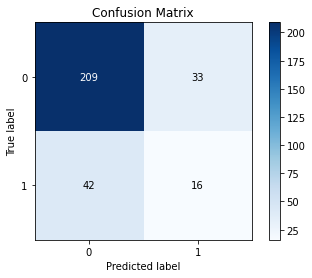

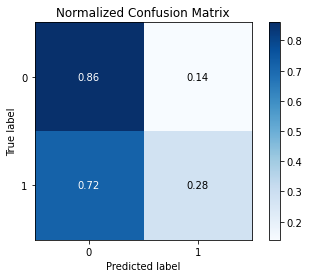

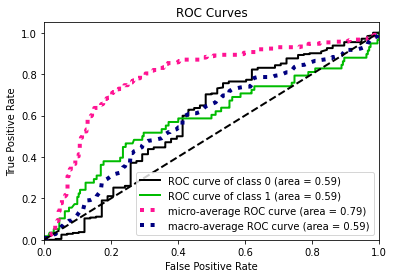

In [ ]:
skplt.metrics.plot_confusion_matrix(y2_test, pred, normalize=False)
skplt.metrics.plot_confusion_matrix(y2_test, pred, normalize=True)
skplt.metrics.plot_roc(y2_test, prob)
plt.show()

In [ ]:
prob_preds = prob
threshold = 0.40 # define threshold here
preds_cut_sens = [1 if prob_preds[i][1]> threshold else 0 for i in range(len(prob_preds))]
skplt.metrics.plot_confusion_matrix(y2_test, preds_cut_sens, normalize=False)
skplt.metrics.plot_confusion_matrix(y2_test, preds_cut_sens, normalize=True)

NameError: ignored

In [ ]:
def objective(trial):

  eta0 = trial.suggest_loguniform("eta0", 0.001, 1)
  epsilon = trial.suggest_loguniform("epsilon", 0.01, 1)
  class_weight = trial.suggest_categorical("class_weight",["balanced", None])
  learning_rate = trial.suggest_categorical("learning_rate",[ "optimal", "invscaling", "adaptive"])


  svm = SGDClassifier(       epsilon=epsilon,
                    class_weight=class_weight,
                    learning_rate=learning_rate,
                    eta0=eta0
                    )
  
  score =  cross_val_score(svm,  X2_train, y2_train, cv = 5, n_jobs=-1, scoring = "balanced_accuracy")
  balanced_accuracy = score.mean()
  return balanced_accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=1200)

[I 2022-02-04 03:38:56,022] A new study created in memory with name: no-name-ae5a84b0-a59d-423f-a72f-739fd1e6969a
[I 2022-02-04 03:38:57,380] Trial 0 finished with value: 0.6131605585124295 and parameters: {'eta0': 0.022490946502061855, 'epsilon': 0.04664451183417072, 'class_weight': 'balanced', 'learning_rate': 'optimal'}. Best is trial 0 with value: 0.6131605585124295.
[I 2022-02-04 03:38:57,450] Trial 1 finished with value: 0.5507608388053387 and parameters: {'eta0': 0.015774804744501655, 'epsilon': 0.9073507057212727, 'class_weight': None, 'learning_rate': 'adaptive'}. Best is trial 0 with value: 0.6131605585124295.
[I 2022-02-04 03:38:57,501] Trial 2 finished with value: 0.5 and parameters: {'eta0': 0.07055942653036482, 'epsilon': 0.14806202163377272, 'class_weight': None, 'learning_rate': 'invscaling'}. Best is trial 0 with value: 0.6131605585124295.
[I 2022-02-04 03:38:57,558] Trial 3 finished with value: 0.5 and parameters: {'eta0': 0.00933529745851861, 'epsilon': 0.87690989248

Balanced_accuracy: 0.7128022738690605
Best hyperparameters: {'eta0': 0.023409428851301886, 'epsilon': 0.01138213689986609, 'class_weight': 'balanced', 'learning_rate': 'adaptive'}
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       242
           1       0.38      0.71      0.49        58

    accuracy                           0.72       300
   macro avg       0.64      0.71      0.65       300
weighted avg       0.81      0.72      0.74       300



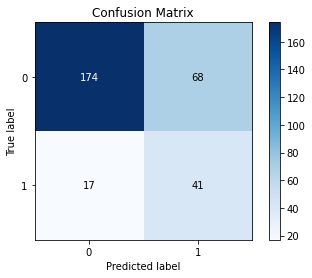

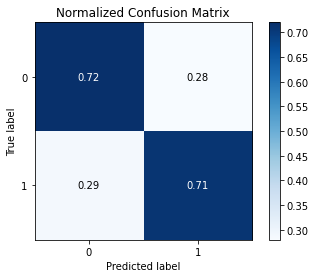

In [ ]:
trial = study.best_trial
print("Balanced_accuracy: {}".format(trial.value))
print("Best hyperparameters: {}".format(trial.params))
svm_acc = SGDClassifier(
    **trial.params

)
svm_acc.fit(X2_train, y2_train)
preds = svm_acc.predict(X2_test)
#probs = svm_acc.predict_proba(X2_test)
print(metrics.classification_report(y2_test,preds))

skplt.metrics.plot_confusion_matrix(y2_test, preds, normalize=False)
skplt.metrics.plot_confusion_matrix(y2_test, preds, normalize=True)
#skplt.metrics.plot_roc(y1_test, probs)
plt.show()

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

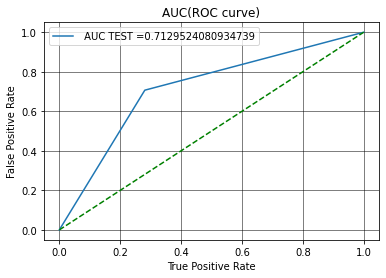

In [ ]:
test_fpr, test_tpr, te_thresholds = roc_curve(y2_test, preds)
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [ ]:
X2_train = X2_train.to_numpy()
y2_train = y2_train.to_numpy()
X2_test = X2_test.to_numpy()
y2_test = y2_test.to_numpy()

In [ ]:
def Objective_2(trial):
    mask_type = trial.suggest_categorical("mask_type", ["entmax"])
    n_d = trial.suggest_int("n_d", 4, 16, step=2)
    n_steps = trial.suggest_int("n_steps", 1, 8, step=1)
    gamma = trial.suggest_float("gamma", 1., 1.8, step=0.2)
    n_shared = trial.suggest_int("n_shared", 1, 2)
    lambda_sparse = trial.suggest_float("lambda_sparse", 1e-3, 1e-1, log=True)
    tabnet_params = dict(n_d=n_d, n_a=n_d, n_steps=n_steps, gamma=gamma,
                     lambda_sparse=lambda_sparse, optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=mask_type, n_shared=n_shared,
                     scheduler_params=dict(mode="min",
                                           patience=trial.suggest_int("patienceScheduler",low=3,high=10), # changing sheduler patience to be lower than early stopping patience 
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=0,
                     ) #early stopping
    kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    CV_score_array    =[]
    for train_index, test_index in kf.split(X2_train, y2_train):
        X_train, X_valid = X2_train[train_index], X2_train[test_index]
        y_train, y_valid = y2_train[train_index], y2_train[test_index]
        classifier = TabNetClassifier(**tabnet_params)
        classifier.fit(X_train=X_train, y_train=y_train,
                  eval_set=[(X_valid, y_valid)],
                  patience=trial.suggest_int("patience",low=30,high=60), max_epochs=trial.suggest_int('epochs', 100, 1000),
                  eval_metric=['balanced_accuracy'],loss_fn=nn.CrossEntropyLoss(weight=weight_balance))
        CV_score_array.append(classifier.best_cost)
    avg = np.mean(CV_score_array)
    return avg

In [ ]:
study = optuna.create_study(direction="maximize", study_name='TabNet optimization_2')
study.optimize(Objective_2, n_trials=10) #2 horas no máximo

[I 2021-10-19 23:04:41,862] A new study created in memory with name: TabNet optimization_2



Early stopping occurred at epoch 75 with best_epoch = 16 and best_val_0_balanced_accuracy = 0.6162
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 171 with best_epoch = 112 and best_val_0_balanced_accuracy = 0.72495
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 165 with best_epoch = 106 and best_val_0_balanced_accuracy = 0.64012
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 78 with best_epoch = 19 and best_val_0_balanced_accuracy = 0.79337
Best weights from best epoch are automatically used!


[I 2021-10-19 23:05:35,908] Trial 0 finished with value: 0.7002419406523595 and parameters: {'mask_type': 'entmax', 'n_d': 10, 'n_steps': 4, 'gamma': 1.4, 'n_shared': 2, 'lambda_sparse': 0.0011074533897420188, 'patienceScheduler': 7, 'patience': 59, 'epochs': 308}. Best is trial 0 with value: 0.7002419406523595.



Early stopping occurred at epoch 105 with best_epoch = 46 and best_val_0_balanced_accuracy = 0.72657
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 47 with best_epoch = 14 and best_val_0_balanced_accuracy = 0.66887
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 42 with best_epoch = 9 and best_val_0_balanced_accuracy = 0.71635
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 45 with best_epoch = 12 and best_val_0_balanced_accuracy = 0.68979
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 55 with best_epoch = 22 and best_val_0_balanced_accuracy = 0.7607
Best weights from best epoch are automatically used!


[I 2021-10-19 23:05:58,380] Trial 1 finished with value: 0.7130767434019812 and parameters: {'mask_type': 'entmax', 'n_d': 14, 'n_steps': 4, 'gamma': 1.0, 'n_shared': 1, 'lambda_sparse': 0.004082919127476009, 'patienceScheduler': 6, 'patience': 33, 'epochs': 390}. Best is trial 1 with value: 0.7130767434019812.



Early stopping occurred at epoch 65 with best_epoch = 32 and best_val_0_balanced_accuracy = 0.72967
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 40 with best_epoch = 4 and best_val_0_balanced_accuracy = 0.66977
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 41 with best_epoch = 5 and best_val_0_balanced_accuracy = 0.67666
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 41 with best_epoch = 5 and best_val_0_balanced_accuracy = 0.61681
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 39 with best_epoch = 3 and best_val_0_balanced_accuracy = 0.73998
Best weights from best epoch are automatically used!


[I 2021-10-19 23:06:11,196] Trial 2 finished with value: 0.6821377557325666 and parameters: {'mask_type': 'entmax', 'n_d': 16, 'n_steps': 2, 'gamma': 1.4, 'n_shared': 1, 'lambda_sparse': 0.00904442082935743, 'patienceScheduler': 7, 'patience': 36, 'epochs': 977}. Best is trial 1 with value: 0.7130767434019812.



Early stopping occurred at epoch 54 with best_epoch = 18 and best_val_0_balanced_accuracy = 0.70748
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 44 with best_epoch = 6 and best_val_0_balanced_accuracy = 0.60365
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 57 with best_epoch = 19 and best_val_0_balanced_accuracy = 0.61063
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 51 with best_epoch = 13 and best_val_0_balanced_accuracy = 0.5869
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 75 with best_epoch = 37 and best_val_0_balanced_accuracy = 0.67954
Best weights from best epoch are automatically used!


[I 2021-10-19 23:06:21,275] Trial 3 finished with value: 0.614561407860624 and parameters: {'mask_type': 'entmax', 'n_d': 10, 'n_steps': 1, 'gamma': 1.4, 'n_shared': 1, 'lambda_sparse': 0.0012318077709467282, 'patienceScheduler': 4, 'patience': 38, 'epochs': 310}. Best is trial 1 with value: 0.7130767434019812.



Early stopping occurred at epoch 66 with best_epoch = 28 and best_val_0_balanced_accuracy = 0.59208
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 97 with best_epoch = 38 and best_val_0_balanced_accuracy = 0.65486
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 83 with best_epoch = 24 and best_val_0_balanced_accuracy = 0.72181
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 59 with best_epoch = 0 and best_val_0_balanced_accuracy = 0.66586
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 148 with best_epoch = 89 and best_val_0_balanced_accuracy = 0.72759
Best weights from best epoch are automatically used!


[I 2021-10-19 23:06:52,507] Trial 4 finished with value: 0.6939528672678869 and parameters: {'mask_type': 'entmax', 'n_d': 12, 'n_steps': 2, 'gamma': 1.2, 'n_shared': 2, 'lambda_sparse': 0.04527175572405929, 'patienceScheduler': 7, 'patience': 59, 'epochs': 912}. Best is trial 1 with value: 0.7130767434019812.



Early stopping occurred at epoch 119 with best_epoch = 60 and best_val_0_balanced_accuracy = 0.69965
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 103 with best_epoch = 62 and best_val_0_balanced_accuracy = 0.61856
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 62 with best_epoch = 21 and best_val_0_balanced_accuracy = 0.7169
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 41 with best_epoch = 0 and best_val_0_balanced_accuracy = 0.6016
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 58 with best_epoch = 17 and best_val_0_balanced_accuracy = 0.73479
Best weights from best epoch are automatically used!


[I 2021-10-19 23:07:47,797] Trial 5 finished with value: 0.6785466251323478 and parameters: {'mask_type': 'entmax', 'n_d': 6, 'n_steps': 8, 'gamma': 1.4, 'n_shared': 2, 'lambda_sparse': 0.0549968603424356, 'patienceScheduler': 6, 'patience': 41, 'epochs': 305}. Best is trial 1 with value: 0.7130767434019812.



Early stopping occurred at epoch 147 with best_epoch = 106 and best_val_0_balanced_accuracy = 0.72088
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 47 with best_epoch = 8 and best_val_0_balanced_accuracy = 0.6794
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 148 with best_epoch = 109 and best_val_0_balanced_accuracy = 0.69766
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 58 with best_epoch = 19 and best_val_0_balanced_accuracy = 0.66445
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 121 with best_epoch = 82 and best_val_0_balanced_accuracy = 0.71666
Best weights from best epoch are automatically used!


[I 2021-10-19 23:08:54,820] Trial 6 finished with value: 0.696330220466551 and parameters: {'mask_type': 'entmax', 'n_d': 16, 'n_steps': 6, 'gamma': 1.6, 'n_shared': 2, 'lambda_sparse': 0.006968001424898231, 'patienceScheduler': 6, 'patience': 39, 'epochs': 604}. Best is trial 1 with value: 0.7130767434019812.



Early stopping occurred at epoch 49 with best_epoch = 10 and best_val_0_balanced_accuracy = 0.72347
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 53 with best_epoch = 18 and best_val_0_balanced_accuracy = 0.62573
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 41 with best_epoch = 6 and best_val_0_balanced_accuracy = 0.58593
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 44 with best_epoch = 9 and best_val_0_balanced_accuracy = 0.64429
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 56 with best_epoch = 21 and best_val_0_balanced_accuracy = 0.73693
Best weights from best epoch are automatically used!


[I 2021-10-19 23:09:29,634] Trial 7 finished with value: 0.6485611937026894 and parameters: {'mask_type': 'entmax', 'n_d': 8, 'n_steps': 8, 'gamma': 1.2, 'n_shared': 2, 'lambda_sparse': 0.027677239971393833, 'patienceScheduler': 5, 'patience': 35, 'epochs': 310}. Best is trial 1 with value: 0.7130767434019812.



Early stopping occurred at epoch 43 with best_epoch = 8 and best_val_0_balanced_accuracy = 0.64992
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 79 with best_epoch = 22 and best_val_0_balanced_accuracy = 0.69117
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 60 with best_epoch = 3 and best_val_0_balanced_accuracy = 0.72357
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 111 with best_epoch = 54 and best_val_0_balanced_accuracy = 0.6417
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 237 with best_epoch = 180 and best_val_0_balanced_accuracy = 0.79337
Best weights from best epoch are automatically used!


[I 2021-10-19 23:10:50,121] Trial 8 finished with value: 0.7205577213200449 and parameters: {'mask_type': 'entmax', 'n_d': 12, 'n_steps': 8, 'gamma': 1.8, 'n_shared': 1, 'lambda_sparse': 0.0018331842037736445, 'patienceScheduler': 6, 'patience': 57, 'epochs': 840}. Best is trial 8 with value: 0.7205577213200449.



Early stopping occurred at epoch 89 with best_epoch = 32 and best_val_0_balanced_accuracy = 0.75298
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 49 with best_epoch = 7 and best_val_0_balanced_accuracy = 0.70518
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 48 with best_epoch = 6 and best_val_0_balanced_accuracy = 0.66167
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 45 with best_epoch = 3 and best_val_0_balanced_accuracy = 0.62345
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 49 with best_epoch = 7 and best_val_0_balanced_accuracy = 0.71976
Best weights from best epoch are automatically used!


[I 2021-10-19 23:11:00,535] Trial 9 finished with value: 0.6774805075019268 and parameters: {'mask_type': 'entmax', 'n_d': 8, 'n_steps': 2, 'gamma': 1.0, 'n_shared': 1, 'lambda_sparse': 0.00579679939423973, 'patienceScheduler': 3, 'patience': 42, 'epochs': 900}. Best is trial 8 with value: 0.7205577213200449.



Early stopping occurred at epoch 44 with best_epoch = 2 and best_val_0_balanced_accuracy = 0.67735
Best weights from best epoch are automatically used!


In [ ]:
trial = study.best_trial
print("Best hyperparameters: {}".format(trial.params))
TabNet_params = study.best_params

final_params = dict(n_d=TabNet_params['n_d'], n_a=TabNet_params['n_d'], n_steps=TabNet_params['n_steps'], gamma=TabNet_params['gamma'],
                     lambda_sparse=TabNet_params['lambda_sparse'], optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=TabNet_params['mask_type'], n_shared=TabNet_params['n_shared'],
                     scheduler_params=dict(mode="min",
                                           patience=TabNet_params['patienceScheduler'],
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=0,
                     )
epochs = TabNet_params['epochs']

Best hyperparameters: {'mask_type': 'entmax', 'n_d': 12, 'n_steps': 8, 'gamma': 1.8, 'n_shared': 1, 'lambda_sparse': 0.0018331842037736445, 'patienceScheduler': 6, 'patience': 57, 'epochs': 840}


In [ ]:
classifier = TabNetClassifier(**final_params)
classifier.fit(X_train=X2_train, y_train=y2_train, eval_set=None,eval_name=None,
          patience=TabNet_params['patience'], max_epochs=epochs,loss_fn=nn.CrossEntropyLoss(weight=weight_balance))


No early stopping will be performed, last training weights will be used.


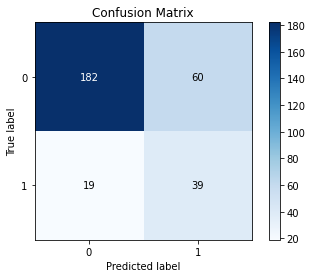

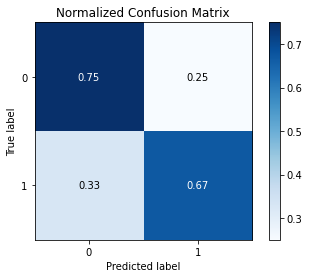

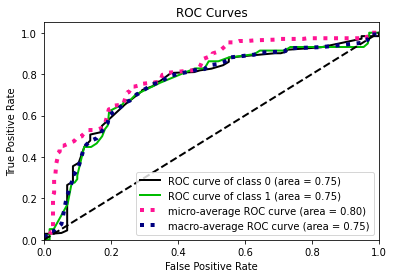

In [ ]:
pred = classifier.predict(X2_test)
prob = classifier.predict_proba(X2_test)
skplt.metrics.plot_confusion_matrix(y2_test, pred, normalize=False)
skplt.metrics.plot_confusion_matrix(y2_test, pred, normalize=True)
skplt.metrics.plot_roc(y2_test, prob)
plt.show()

## Treinando com os dados completos

In [ ]:
y3 = C_data["Obito_vazio_virou_0"]
X3 =  C_data.drop(["Obito_vazio_virou_0"], axis=1)

Seleção de variáveis

MÁXIMA RELEVÂNCIA E MÍNIMA REDUNDÂNCIA

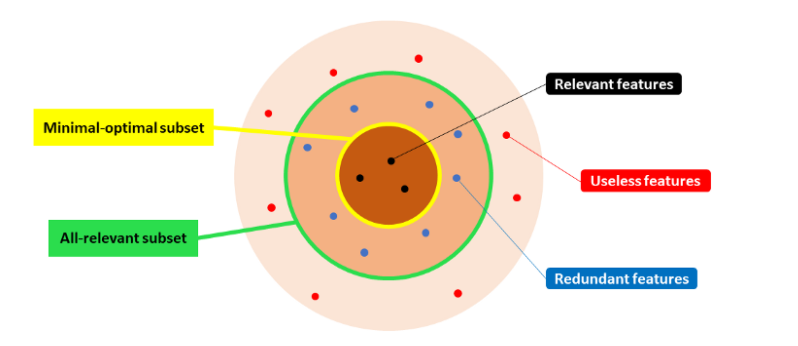

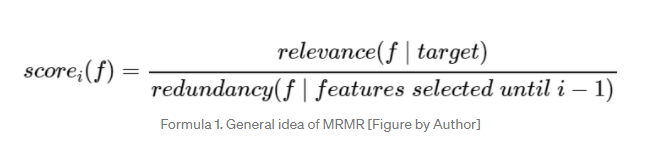

Seleção dos dados sem a imputação dos valores faltantes por -1

In [ ]:
select_data = data[["Obito_vazio_virou_0",
                  "Uso_ISRAA_Num",
                  "TxRenalprevio_Num",
                  "DM_Num",
                  "Acesso_Vasc_Num", 
                  "IMC_dic", 
                  "Idade",
                  "Sexo_Numérico",
                  "AVC_Num", 
                  "HAS_Num", 
                  "HIV_Num", 
                  "ICC_Num", 
                  "DHepCron_Num", 
                  "DPOC_Num", 
                  "Demência_Num", 
                  "DVP_Num", 
                  "Etilismo_Num",
                  "InfartoM_Num", 
                  "Neo_Atual_Pass_Num",
                  "Tabag_Atual_Num", 
                  "Tabag_Prévio_Num", 
                  "Febre",
                  "Tosse",
                  "Dispneia",
                  "FadigaMalestar",
                  "Mialgia",
                  "Sintomasgastrointestinais",
                  "ConfusãoMental",
                  "Assintomático"
                
]].dropna()

In [ ]:
select_data

Obito_vazio_virou_0  Uso_ISRAA_Num  ...  ConfusãoMental  Assintomático
1                       0            1.0  ...               0              1
2                       0            0.0  ...               0              0
3                       1            0.0  ...               0              0
4                       0            1.0  ...               0              0
5                       0            1.0  ...               0              0
...                   ...            ...  ...             ...            ...
1492                    0            1.0  ...               0              0
1493                    0            0.0  ...               0              1
1494                    0            1.0  ...               0              0
1495                    0            0.0  ...               0              0
1496                    0            0.0  ...               0              0

[1359 rows x 29 columns]

In [ ]:
select_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 1 to 1496
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Obito_vazio_virou_0        1359 non-null   int64  
 1   Uso_ISRAA_Num              1359 non-null   float64
 2   TxRenalprevio_Num          1359 non-null   float64
 3   DM_Num                     1359 non-null   int64  
 4   Acesso_Vasc_Num            1359 non-null   float64
 5   IMC_dic                    1359 non-null   float64
 6   Idade                      1359 non-null   float64
 7   Sexo_Numérico              1359 non-null   float64
 8   AVC_Num                    1359 non-null   int64  
 9   HAS_Num                    1359 non-null   int64  
 10  HIV_Num                    1359 non-null   int64  
 11  ICC_Num                    1359 non-null   int64  
 12  DHepCron_Num               1359 non-null   int64  
 13  DPOC_Num                   1359 non-null   int64

In [ ]:
y_select = select_data['Obito_vazio_virou_0']
X_select = select_data.drop(['Obito_vazio_virou_0'], axis=1)

# MRMR

In [ ]:
F = pd.Series(f_regression(X_select, y_select)[0], index = X_select.columns)
corr = X_select.corr().abs().clip(.001) 
selected = []
scores = []
not_selected = list(X_select.columns)

# K varáveis de interese
for i in range(28):
    
    # Computar a razação entre a correlação com o target e os features
    score = F.loc[not_selected] / corr.loc[not_selected, selected].mean(axis = 1).fillna(.001)
    scores.append(score)
    best = score.index[score.argmax()]
    selected.append(best)
    not_selected.remove(best)

In [ ]:
selected

['Dispneia',
 'ConfusãoMental',
 'DM_Num',
 'Idade',
 'Assintomático',
 'HAS_Num',
 'Acesso_Vasc_Num',
 'IMC_dic',
 'ICC_Num',
 'Febre',
 'Tosse',
 'InfartoM_Num',
 'Neo_Atual_Pass_Num',
 'Uso_ISRAA_Num',
 'Demência_Num',
 'AVC_Num',
 'DVP_Num',
 'DPOC_Num',
 'FadigaMalestar',
 'Sexo_Numérico',
 'Mialgia',
 'Tabag_Prévio_Num',
 'HIV_Num',
 'DHepCron_Num',
 'Sintomasgastrointestinais',
 'Tabag_Atual_Num',
 'TxRenalprevio_Num',
 'Etilismo_Num']

In [ ]:
scores

[Uso_ISRAA_Num                  4702.293111
 TxRenalprevio_Num                 7.976003
 DM_Num                        43518.493144
 Acesso_Vasc_Num                7520.091391
 IMC_dic                        5068.864037
 Idade                         54698.274514
 Sexo_Numérico                   429.624581
 AVC_Num                        2673.960051
 HAS_Num                        4255.197603
 HIV_Num                          22.143348
 ICC_Num                        9286.836137
 DHepCron_Num                     33.363912
 DPOC_Num                       2621.731557
 Demência_Num                   3214.464094
 DVP_Num                        2669.151883
 Etilismo_Num                      0.707709
 InfartoM_Num                   5992.010559
 Neo_Atual_Pass_Num             3388.117816
 Tabag_Atual_Num                  10.609021
 Tabag_Prévio_Num                306.675428
 Febre                         10390.679411
 Tosse                         10757.091898
 Dispneia                     14

Experimento com os 5 features mais importantes + idade

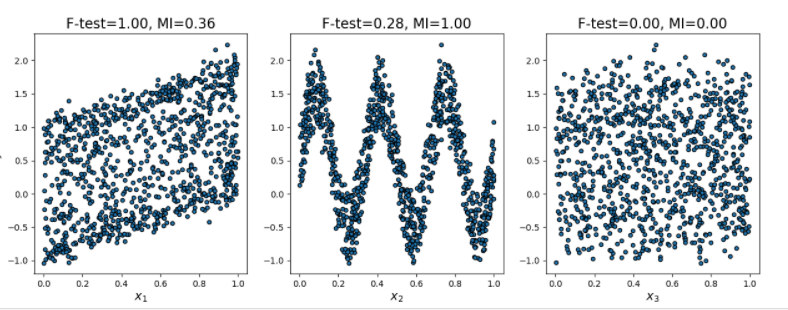

In [ ]:
X4 = C_data[['Dispneia',
 'ConfusãoMental',
 'DM_Num',
 'Assintomático',
 'HAS_Num','Idade']]
y4 = C_data['Obito_vazio_virou_0']

In [ ]:
X4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Dispneia        1497 non-null   int64
 1   ConfusãoMental  1497 non-null   int64
 2   DM_Num          1497 non-null   int64
 3   Assintomático   1497 non-null   int64
 4   HAS_Num         1497 non-null   int64
 5   Idade           1497 non-null   int64
dtypes: int64(6)
memory usage: 70.3 KB


In [ ]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=0, test_size=0.2, stratify = y4)
print('Labels in traning: {}'.format(set(y4_train)))
print('Zero count = {}, One count = {}'.format (len(y4_train) - sum(y4_train), sum(y4_train)))
print('Labels in test: {}'.format(set(y4_test)))
print('Zero count = {}, One count = {}'.format (len(y4_test) - sum(y4_test), sum(y4_test)))

Labels in traning: {0, 1}
Zero count = 966, One count = 231
Labels in test: {0, 1}
Zero count = 242, One count = 58


In [ ]:
def objective(trial):
  criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
  max_depth = trial.suggest_int("max_depth",2,10,log=True)
  n_estimators = trial.suggest_int("n_estimators",100,1000)
  class_weight = trial.suggest_categorical("class_weight",["balanced", "balanced_subsample"])
  

  rf = RandomForestClassifier(criterion=criterion,
                              max_depth=max_depth,
                              n_estimators=n_estimators,
                              class_weight=class_weight
                              )

  
  score =  cross_val_score(rf, X4_train, y4_train, n_jobs=-1, cv = 5, scoring = "recall")
  recall = score.mean()
  return recall


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2021-12-23 21:43:59,475] A new study created in memory with name: no-name-c0abed59-c404-48c2-878e-277840105940
[I 2021-12-23 21:44:07,720] Trial 0 finished with value: 0.7358926919518964 and parameters: {'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 601, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7358926919518964.
[I 2021-12-23 21:44:13,323] Trial 1 finished with value: 0.4542090656799259 and parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 705, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7358926919518964.
[I 2021-12-23 21:44:20,068] Trial 2 finished with value: 0.7316373728029604 and parameters: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 977, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7358926919518964.
[I 2021-12-23 21:44:27,086] Trial 3 finished with value: 0.5673450508788159 and parameters: {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 704, 'class_weight': 'balanced'}. Best is trial 0

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
optuna.visualization.plot_edf(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
optuna.visualization.plot_pareto_front

<function optuna.visualization._pareto_front.plot_pareto_front>

Recall: 0.7532839962997224
Best hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 410, 'class_weight': 'balanced'}
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       242
           1       0.38      0.72      0.49        58

    accuracy                           0.71       300
   macro avg       0.64      0.72      0.65       300
weighted avg       0.81      0.71      0.74       300



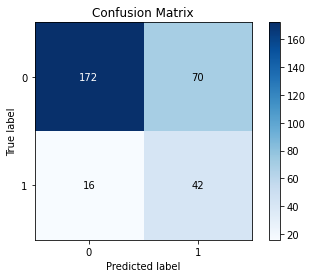

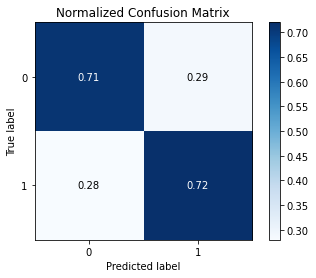

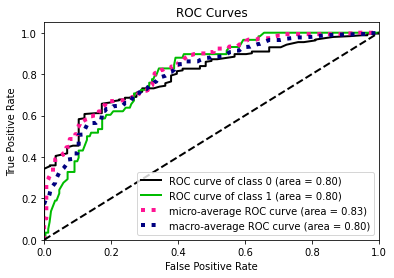

In [ ]:
trial = study.best_trial
print("Recall: {}".format(trial.value))
print("Best hyperparameters: {}".format(trial.params))
rf_recall = RandomForestClassifier(
    **trial.params
)
rf_recall.fit(X4_train, y4_train)
preds = rf_recall.predict(X4_test)
probs = rf_recall.predict_proba(X4_test)
print(metrics.classification_report(y4_test,preds))

skplt.metrics.plot_confusion_matrix(y4_test, preds, normalize=False)
skplt.metrics.plot_confusion_matrix(y4_test, preds, normalize=True)
skplt.metrics.plot_roc(y4_test, probs)
plt.show()

Random Forest F1 score

In [ ]:
def objective(trial):
  criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
  max_depth = trial.suggest_int("max_depth",2,10,log=True)
  n_estimators = trial.suggest_int("n_estimators",100,1000)
  class_weight = trial.suggest_categorical("class_weight",["balanced", "balanced_subsample"])
  

  rf = RandomForestClassifier(criterion=criterion,
                              max_depth=max_depth,
                              n_estimators=n_estimators,
                              class_weight=class_weight
                              )

  
  score =  cross_val_score(rf, X4_train, y4_train, n_jobs=-1, cv = 5, scoring = "f1")
  recall = score.mean()
  return recall


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2022-01-18 21:43:58,823] A new study created in memory with name: no-name-6c90b257-19c8-44a3-a065-9884eb54bd60
[I 2022-01-18 21:44:05,228] Trial 0 finished with value: 0.47364928417017593 and parameters: {'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 653, 'class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.47364928417017593.
[I 2022-01-18 21:44:08,914] Trial 1 finished with value: 0.4004029356340587 and parameters: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 345, 'class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.47364928417017593.
[I 2022-01-18 21:44:09,781] Trial 2 finished with value: 0.4755984802821587 and parameters: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 110, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.4755984802821587.
[I 2022-01-18 21:44:16,616] Trial 3 finished with value: 0.48091834348652107 and parameters: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 976, 'class_weight': 'balance

KeyboardInterrupt: ignored

In [ ]:
trial = study.best_trial
print("Recall: {}".format(trial.value))
print("Best hyperparameters: {}".format(trial.params))
rf_f1 = RandomForestClassifier(
    **trial.params
)
rf_f1.fit(X4_train, y4_train)
preds = rf_f.predict(X4_test)
probs = rf_f.predict_proba(X4_test)
print(metrics.classification_report(y4_test,preds))

skplt.metrics.plot_confusion_matrix(y4_test, preds, normalize=False)
skplt.metrics.plot_confusion_matrix(y4_test, preds, normalize=True)
skplt.metrics.plot_roc(y4_test, probs)
plt.show()

In [ ]:
teste = pd.read_excel("/content/Banco_teste.xlsx")

In [ ]:
teste[['n','y']] = probs

In [ ]:
kaplan_1 = teste[['T_acomp_90d','Obito_vazio_virou_0','y']]

In [ ]:
kaplan_1.isnull().sum()

T_acomp_90d            0
Obito_vazio_virou_0    0
y                      0
dtype: int64

In [ ]:
baixa_1 = kaplan_1[kaplan_1['y'] <0.5]

In [ ]:
baixa_1.to_excel('baixa_prob_teste.xlsx')

In [ ]:
media_1 = kaplan_1[(kaplan_1['y'] >= 0.5) & (kaplan_1['y'] <= 0.65)]

In [ ]:
media_1.to_excel('media_prob_teste.xlsx')

In [ ]:
alta_1 = kaplan_1[kaplan_1['y']>0.65]

In [ ]:
alta_1.to_excel('alta_prob_teste.xlsx')

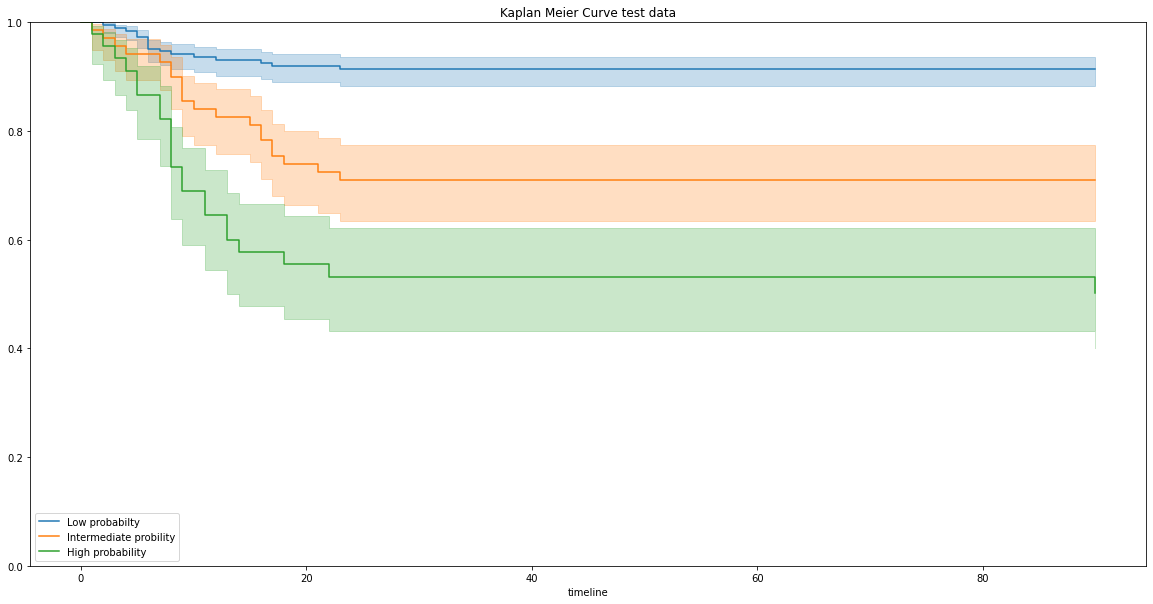

In [ ]:
kmf_dm = KaplanMeierFitter(alpha=0.2)
kmf_dm.fit(baixa_1['T_acomp_90d'], baixa_1['Obito_vazio_virou_0'], label="Low probabilty")
ax = kmf_dm.plot()

kmf_no_dm = KaplanMeierFitter(alpha=0.2)
kmf_no_dm.fit(media_1['T_acomp_90d'], media_1['Obito_vazio_virou_0'], label="Intermediate probility")
ax = kmf_no_dm.plot()

ax.set_ylim([0.0, 1.0])

kmf_no_dm = KaplanMeierFitter(alpha=0.2)
kmf_no_dm.fit(alta_1['T_acomp_90d'], alta_1['Obito_vazio_virou_0'], label="High probability")
ax = kmf_no_dm.plot()

ax.set_ylim([0.0, 1.0])
plt.title('Kaplan Meier Curve test data')
plt.show()

In [ ]:
future = pd.read_excel('/content/Future.xlsx')

In [ ]:
X_f = future[['Dispneia',
 'Confusão_Mental',
 'DM_Num',
 'Assintomático',
 'HAS_Num','Idade']]
y_f = future['Óbito']

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Confusão_Mental
Feature names seen at fit time, yet now missing:
- ConfusãoMental


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Confusão_Mental
Feature names seen at fit time, yet now missing:
- ConfusãoMental




              precision    recall  f1-score   support

           0       0.92      0.62      0.74       252
           1       0.33      0.78      0.46        60

    accuracy                           0.65       312
   macro avg       0.62      0.70      0.60       312
weighted avg       0.81      0.65      0.68       312



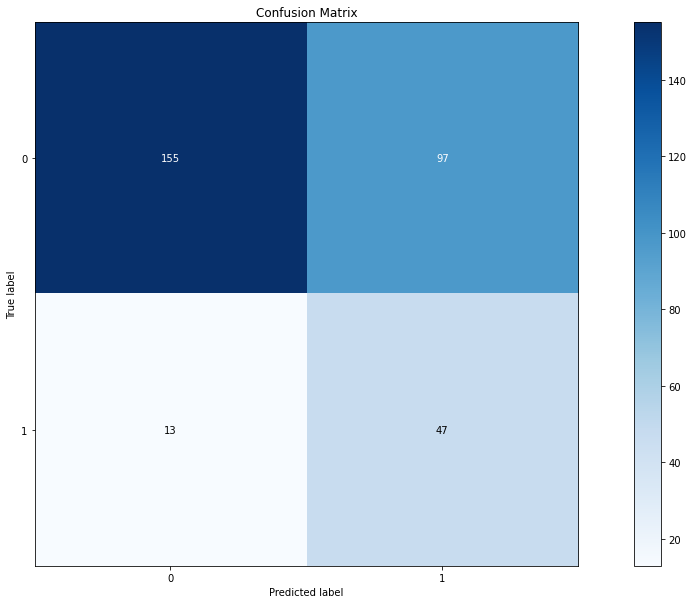

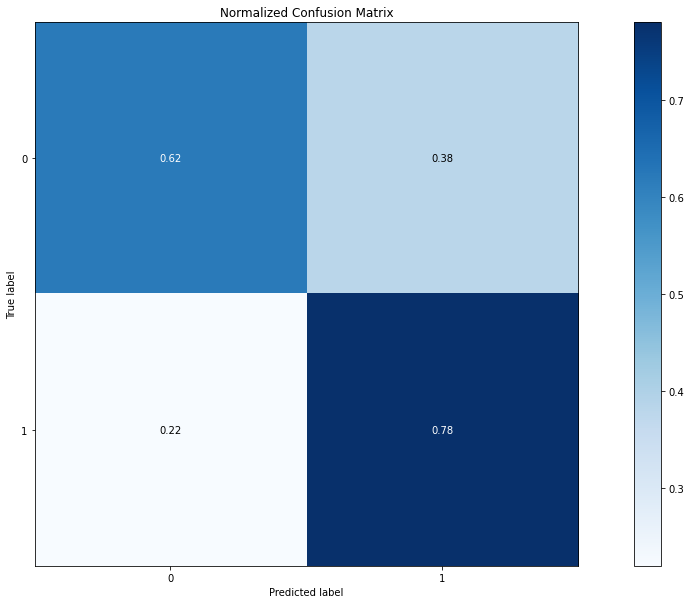

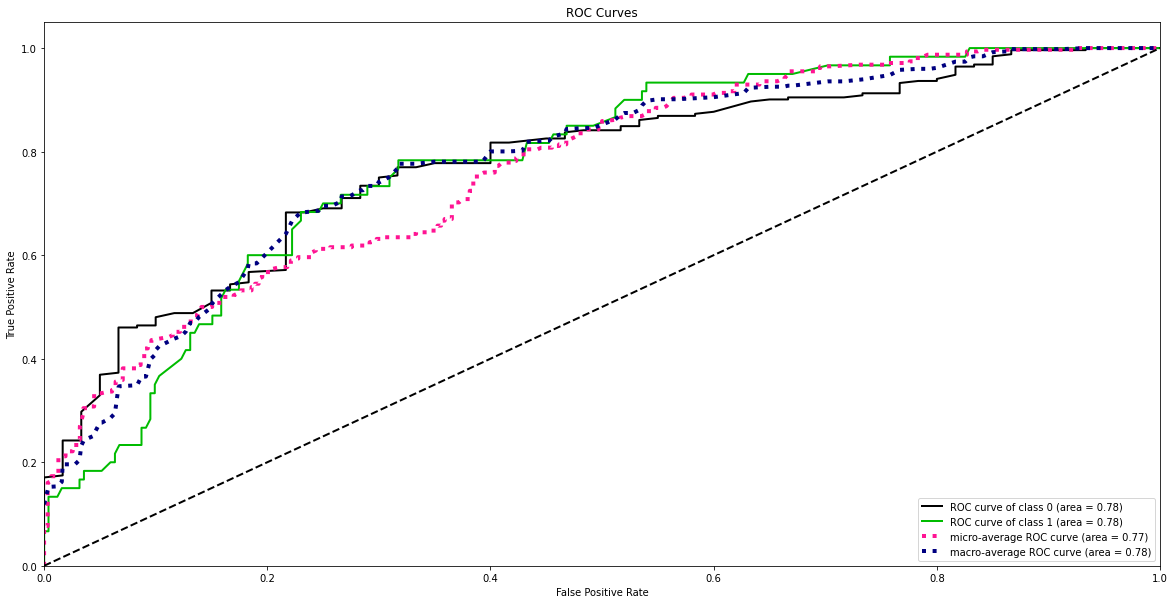

In [ ]:
preds = rf_recall.predict(X_f)
probs = rf_recall.predict_proba(X_f)
print(metrics.classification_report(y_f,preds))

skplt.metrics.plot_confusion_matrix(y_f, preds, normalize=False)
skplt.metrics.plot_confusion_matrix(y_f, preds, normalize=True)
skplt.metrics.plot_roc(y_f, probs)
plt.show()

In [ ]:
future[['n','y']] = probs

In [ ]:
future

Idade  HAS_Num  DM_Num  ...  Sobrevida         n         y
0    83.886111        1       0  ...         90  0.719961  0.280039
1    82.205556        1       0  ...          7  0.586922  0.413078
2    63.125000        1       0  ...          1  0.692583  0.307417
3    66.658333        1       1  ...         90  0.321052  0.678948
4    79.927778        1       0  ...         90  0.590862  0.409138
..         ...      ...     ...  ...        ...       ...       ...
307  47.883333        1       0  ...         90  0.729901  0.270099
308  84.502778        1       0  ...         90  0.578398  0.421602
309  56.666667        1       1  ...         90  0.363008  0.636992
310  41.650000        1       0  ...         90  0.433809  0.566191
311  61.619444        1       0  ...         90  0.708834  0.291166

[312 rows x 12 columns]

In [ ]:
!pip install lifelines

     |████████████████████████████████| 348 kB 5.1 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=628f1c132da3d9ae4196e5c4bfd14ef3323d574a2362b82fc56e54944d8df835
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


In [ ]:
!pip install lifelines

     |████████████████████████████████| 348 kB 5.4 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=8d806a86e8b2cc31aab20e9d08299f198ea78a416c0414adf1ba1617e00b4392
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


In [ ]:
from lifelines import KaplanMeierFitter

In [ ]:
kaplan = future[['Sobrevida','Óbito','y']]

In [ ]:
baixa = kaplan[kaplan['y'] <0.5]

In [ ]:
baixa.to_excel('baixa_prob_futuro.xlsx')

In [ ]:
media = kaplan[(kaplan['y'] >= 0.5) & (kaplan['y'] <= 0.65)]

In [ ]:
media.to_excel('media_prob_futuro.xlsx')

In [ ]:
alta = kaplan[kaplan['y']>0.65]

In [ ]:
alta.to_excel('alta_prob_futuro.xlsx')

In [ ]:
from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 20,10

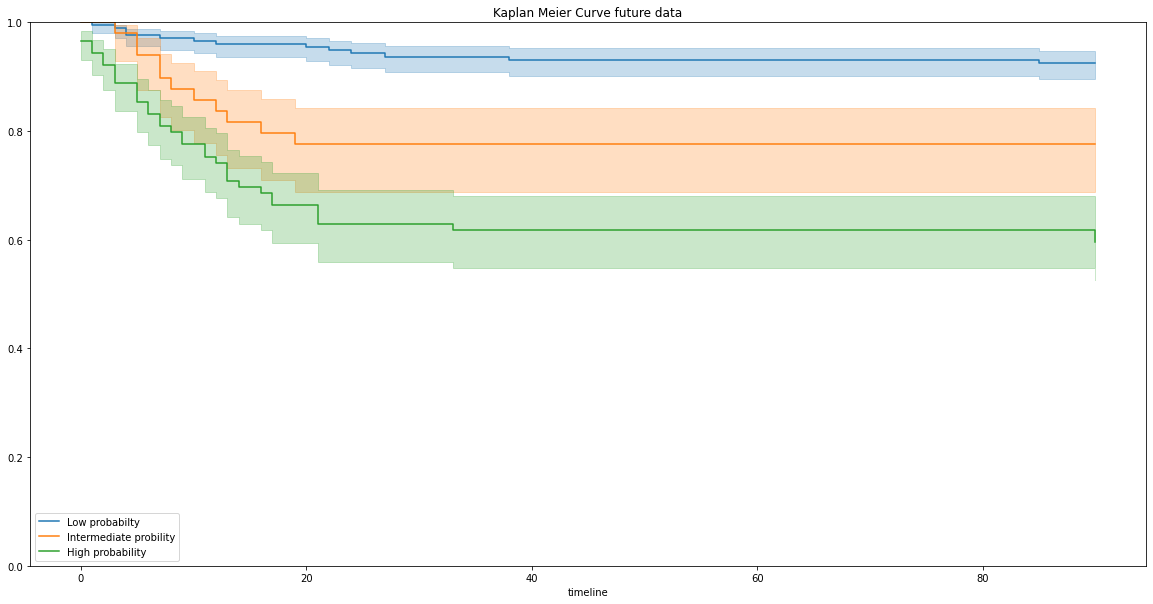

In [ ]:

kmf_dm = KaplanMeierFitter(alpha=0.2)
kmf_dm.fit(baixa['Sobrevida'], baixa['Óbito'], label="Low probabilty")
ax = kmf_dm.plot()

kmf_no_dm = KaplanMeierFitter(alpha=0.2)
kmf_no_dm.fit(media['Sobrevida'], media['Óbito'], label="Intermediate probility")
ax = kmf_no_dm.plot()

ax.set_ylim([0.0, 1.0])

kmf_no_dm = KaplanMeierFitter(alpha=0.2)
kmf_no_dm.fit(alta['Sobrevida'], alta['Óbito'], label="High probability")
ax = kmf_no_dm.plot()

ax.set_ylim([0.0, 1.0])

plt.title('Kaplan Meier Curve future data')
plt.show()

In [ ]:
media = kaplan[(kaplan['y'] >= 0.5) & (kaplan['y'] <= 0.60)]

In [ ]:
alta = kaplan[kaplan['y']>0.60]

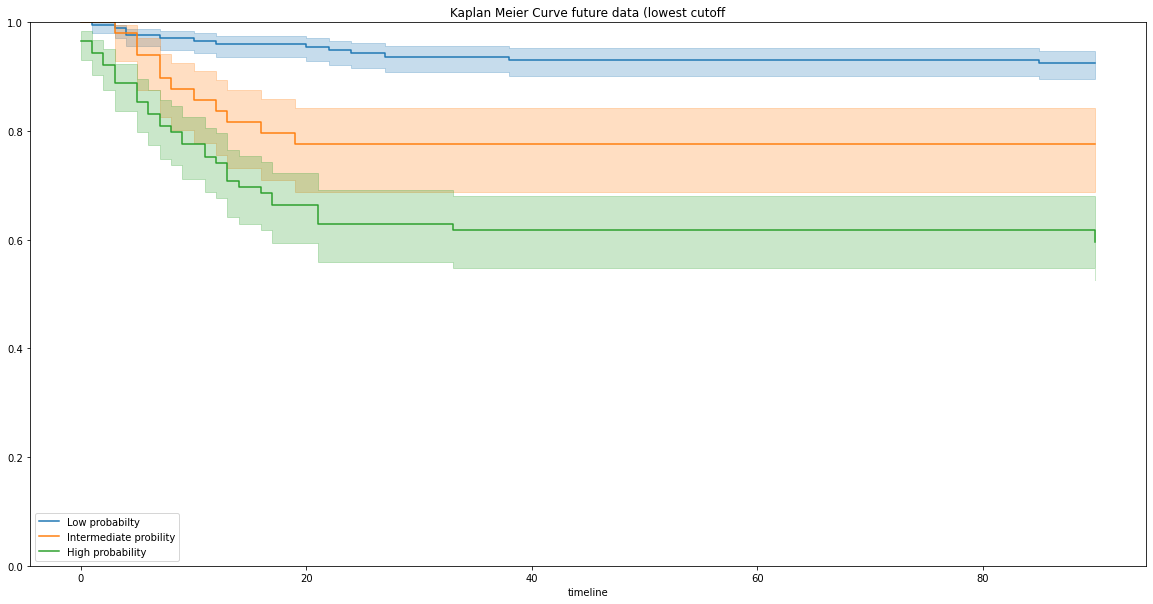

In [ ]:

kmf_dm = KaplanMeierFitter(alpha=0.2)
kmf_dm.fit(baixa['Sobrevida'], baixa['Óbito'], label="Low probabilty")
ax = kmf_dm.plot()

kmf_no_dm = KaplanMeierFitter(alpha=0.2)
kmf_no_dm.fit(media['Sobrevida'], media['Óbito'], label="Intermediate probility")
ax = kmf_no_dm.plot()

ax.set_ylim([0.0, 1.0])

kmf_no_dm = KaplanMeierFitter(alpha=0.2)
kmf_no_dm.fit(alta['Sobrevida'], alta['Óbito'], label="High probability")
ax = kmf_no_dm.plot()

ax.set_ylim([0.0, 1.0])

plt.title('Kaplan Meier Curve future data (lowest cutoff')
plt.show()

In [ ]:
!pip install -q gradio

     |████████████████████████████████| 979 kB 5.2 MB/s 
     |████████████████████████████████| 2.0 MB 45.3 MB/s 
     |████████████████████████████████| 206 kB 45.7 MB/s 
     |████████████████████████████████| 961 kB 42.3 MB/s 
     |████████████████████████████████| 3.6 MB 37.3 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 


In [ ]:
import gradio as gr

In [ ]:
def predict(Idade,HAS_Num,DM_Num,Dispneia, Confusão_Mental,Assintomático):
  df = pd.DataFrame.from_dict({'Idade': [Idade], 'HAS_Num': [HAS_Num], 'DM_Num': [DM_Num],
                               'Dispneia':[Dispneia],
                               'Confusão_Mental':[Confusão_Mental],
                              'Assintomático':[Assintomático],
                                             })
  pred = rf_recall.predict(df)[0]
  return {'Perishes': pred[0], 'Survives': pred[1]}




In [ ]:
data = np.array([100,1,1,1,1,1]).reshape(-1, 1).shape

In [ ]:
df = pd.DataFrame(data)

In [ ]:
 rf_recall.predict(df)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



ValueError: ignored

In [ ]:
teste = pd.read_excel('/content/teste.xlsx')

NameError: ignored

In [ ]:
h = rf_recall.predict(teste[['Dispneia',
 'ConfusãoMental',
 'DM_Num',
 'Assintomático',
 'HAS_Num','Idade']])
p = rf_recall.predict_proba(teste[['Dispneia',
 'ConfusãoMental',
 'DM_Num',
 'Assintomático',
 'HAS_Num','Idade']])[:,1]

NameError: ignored

In [ ]:
print(h)
print(p)

NameError: ignored

In [ ]:
Idade = gr.inputs.Slider(minimum=0, maximum=100, default=50, label="Idade")
Dispneia = gr.inputs.Radio([1,0],label="Dispneia")
HAS_Num = gr.inputs.Radio([1,0],label="HAS")
DM_Num = gr.inputs.Radio([1,0],label="DM")
Confusão_Mental = gr.inputs.Radio([1,0],label="Confusão_Mental")
Assintomático = gr.inputs.Radio([1,0],label="Assintomático")


gr.Interface(predict, [Idade,HAS_Num,DM_Num,Dispneia,Confusão_Mental, Assintomático], "label", live=True).launch();

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://57002.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


In [ ]:
import numpy as np
from scipy.stats import sem
from sklearn.metrics import roc_auc_score

y_pred = probs[:,1]
y_true =  y_f.to_numpy()

print("Original ROC area: {:0.3f}".format(roc_auc_score(y_true, y_pred)))

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

Original ROC area: 0.777
Bootstrap #1 ROC area: 0.786
Bootstrap #2 ROC area: 0.767
Bootstrap #3 ROC area: 0.792
Bootstrap #4 ROC area: 0.778
Bootstrap #5 ROC area: 0.771
Bootstrap #6 ROC area: 0.755
Bootstrap #7 ROC area: 0.802
Bootstrap #8 ROC area: 0.777
Bootstrap #9 ROC area: 0.788
Bootstrap #10 ROC area: 0.790
Bootstrap #11 ROC area: 0.809
Bootstrap #12 ROC area: 0.718
Bootstrap #13 ROC area: 0.753
Bootstrap #14 ROC area: 0.801
Bootstrap #15 ROC area: 0.766
Bootstrap #16 ROC area: 0.775
Bootstrap #17 ROC area: 0.771
Bootstrap #18 ROC area: 0.763
Bootstrap #19 ROC area: 0.739
Bootstrap #20 ROC area: 0.804
Bootstrap #21 ROC area: 0.787
Bootstrap #22 ROC area: 0.763
Bootstrap #23 ROC area: 0.741
Bootstrap #24 ROC area: 0.783
Bootstrap #25 ROC area: 0.785
Bootstrap #26 ROC area: 0.848
Bootstrap #27 ROC area: 0.772
Bootstrap #28 ROC area: 0.833
Bootstrap #29 ROC area: 0.844
Bootstrap #30 ROC area: 0.793
Bootstrap #31 ROC area: 0.763
Bootstrap #32 ROC area: 0.777
Bootstrap #33 ROC area: 

Comparando predição entre vacinados e não vacinados



In [ ]:
vaci = pd.read_excel('/content/vacinados.xlsx')

In [ ]:
X_vaci = vaci[['Dispneia',
 'Confusão Mental',
 'DM_Num',
 'Assintomático',
 'HAS_Num','Idade']]
y_vaci = vaci['Óbito']

              precision    recall  f1-score   support

           0       0.92      0.55      0.69       157
           1       0.28      0.77      0.41        35

    accuracy                           0.59       192
   macro avg       0.60      0.66      0.55       192
weighted avg       0.80      0.59      0.64       192



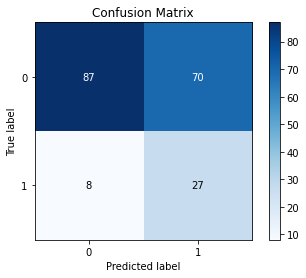

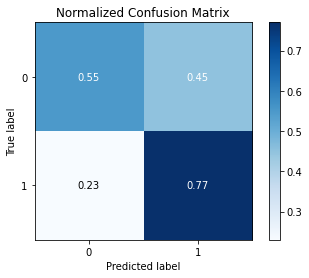

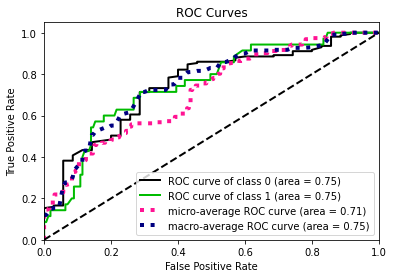

In [ ]:
preds = rf_recall.predict(X_vaci)
probs = rf_recall.predict_proba(X_vaci)
print(metrics.classification_report(y_vaci,preds))

skplt.metrics.plot_confusion_matrix(y_vaci, preds, normalize=False)
skplt.metrics.plot_confusion_matrix(y_vaci, preds, normalize=True)
skplt.metrics.plot_roc(y_vaci, probs)
plt.show()

In [ ]:
import numpy as np
from scipy.stats import sem
from sklearn.metrics import roc_auc_score

y_pred = probs[:,1]
y_true =  y_vaci.to_numpy()

print("Original ROC area: {:0.3f}".format(roc_auc_score(y_true, y_pred)))

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

Original ROC area: 0.750
Bootstrap #1 ROC area: 0.728
Bootstrap #2 ROC area: 0.772
Bootstrap #3 ROC area: 0.792
Bootstrap #4 ROC area: 0.755
Bootstrap #5 ROC area: 0.772
Bootstrap #6 ROC area: 0.767
Bootstrap #7 ROC area: 0.780
Bootstrap #8 ROC area: 0.741
Bootstrap #9 ROC area: 0.792
Bootstrap #10 ROC area: 0.747
Bootstrap #11 ROC area: 0.733
Bootstrap #12 ROC area: 0.779
Bootstrap #13 ROC area: 0.801
Bootstrap #14 ROC area: 0.840
Bootstrap #15 ROC area: 0.729
Bootstrap #16 ROC area: 0.774
Bootstrap #17 ROC area: 0.770
Bootstrap #18 ROC area: 0.732
Bootstrap #19 ROC area: 0.789
Bootstrap #20 ROC area: 0.757
Bootstrap #21 ROC area: 0.693
Bootstrap #22 ROC area: 0.734
Bootstrap #23 ROC area: 0.766
Bootstrap #24 ROC area: 0.691
Bootstrap #25 ROC area: 0.767
Bootstrap #26 ROC area: 0.735
Bootstrap #27 ROC area: 0.747
Bootstrap #28 ROC area: 0.785
Bootstrap #29 ROC area: 0.755
Bootstrap #30 ROC area: 0.733
Bootstrap #31 ROC area: 0.741
Bootstrap #32 ROC area: 0.729
Bootstrap #33 ROC area: 

In [ ]:
nvac = pd.read_excel('/content/Nao_vacinados.xlsx')

In [ ]:
X_nvac = nvac[['Dispneia',
 'Confusão Mental',
 'DM_Num',
 'Assintomático',
 'HAS_Num','Idade']]
y_nvac = nvac['Óbito']

              precision    recall  f1-score   support

           0       0.93      0.75      0.83        95
           1       0.45      0.80      0.58        25

    accuracy                           0.76       120
   macro avg       0.69      0.77      0.71       120
weighted avg       0.83      0.76      0.78       120



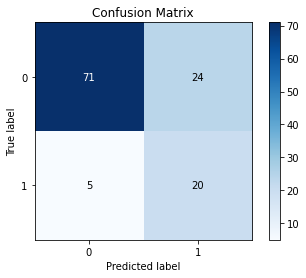

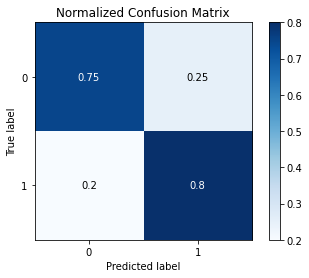

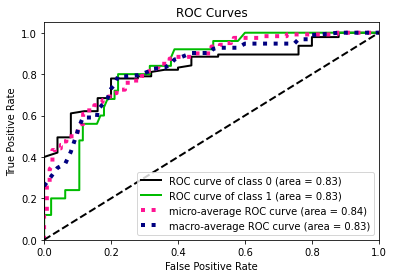

In [ ]:
preds = rf_recall.predict(X_nvac)
probs = rf_recall.predict_proba(X_nvac)
print(metrics.classification_report(y_nvac,preds))

skplt.metrics.plot_confusion_matrix(y_nvac, preds, normalize=False)
skplt.metrics.plot_confusion_matrix(y_nvac, preds, normalize=True)
skplt.metrics.plot_roc(y_nvac, probs)
plt.show()

In [ ]:
import numpy as np
from scipy.stats import sem
from sklearn.metrics import roc_auc_score

y_pred = probs[:,1]
y_true =  y_nvac.to_numpy()

print("Original ROC area: {:0.3f}".format(roc_auc_score(y_true, y_pred)))

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

Original ROC area: 0.827
Bootstrap #1 ROC area: 0.831
Bootstrap #2 ROC area: 0.800
Bootstrap #3 ROC area: 0.799
Bootstrap #4 ROC area: 0.873
Bootstrap #5 ROC area: 0.849
Bootstrap #6 ROC area: 0.867
Bootstrap #7 ROC area: 0.805
Bootstrap #8 ROC area: 0.795
Bootstrap #9 ROC area: 0.791
Bootstrap #10 ROC area: 0.816
Bootstrap #11 ROC area: 0.738
Bootstrap #12 ROC area: 0.846
Bootstrap #13 ROC area: 0.842
Bootstrap #14 ROC area: 0.833
Bootstrap #15 ROC area: 0.764
Bootstrap #16 ROC area: 0.862
Bootstrap #17 ROC area: 0.780
Bootstrap #18 ROC area: 0.812
Bootstrap #19 ROC area: 0.741
Bootstrap #20 ROC area: 0.846
Bootstrap #21 ROC area: 0.820
Bootstrap #22 ROC area: 0.777
Bootstrap #23 ROC area: 0.802
Bootstrap #24 ROC area: 0.821
Bootstrap #25 ROC area: 0.849
Bootstrap #26 ROC area: 0.806
Bootstrap #27 ROC area: 0.887
Bootstrap #28 ROC area: 0.859
Bootstrap #29 ROC area: 0.841
Bootstrap #30 ROC area: 0.760
Bootstrap #31 ROC area: 0.788
Bootstrap #32 ROC area: 0.818
Bootstrap #33 ROC area: 

Sul/Sudeste/Centro Oeste

In [ ]:
Sul = pd.read_excel("/content/Sul.xlsx")

In [ ]:
X_Sul = Sul[['Dispneia',
 'Confusão Mental',
 'DM_Num',
 'Assintomático',
 'HAS_Num','Idade']]
y_Sul = Sul['Óbito']

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        93
           1       0.36      0.70      0.47        20

    accuracy                           0.73       113
   macro avg       0.64      0.72      0.64       113
weighted avg       0.82      0.73      0.75       113



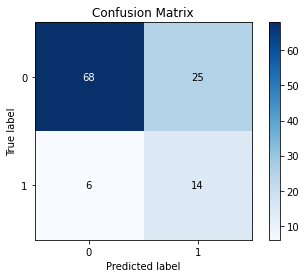

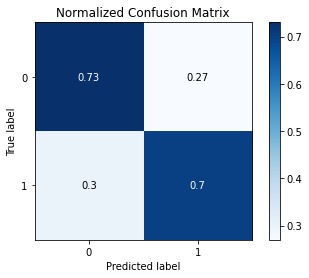

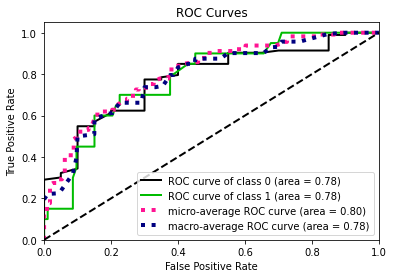

In [ ]:
preds = rf_recall.predict(X_Sul)
probs = rf_recall.predict_proba(X_Sul)
print(metrics.classification_report(y_Sul,preds))

skplt.metrics.plot_confusion_matrix(y_Sul, preds, normalize=False)
skplt.metrics.plot_confusion_matrix(y_Sul, preds, normalize=True)
skplt.metrics.plot_roc(y_Sul, probs)
plt.show()

In [ ]:
import numpy as np
from scipy.stats import sem
from sklearn.metrics import roc_auc_score

y_pred = probs[:,1]
y_true =  y_Sul.to_numpy()

print("Original ROC area: {:0.3f}".format(roc_auc_score(y_true, y_pred)))

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

Original ROC area: 0.779
Bootstrap #1 ROC area: 0.739
Bootstrap #2 ROC area: 0.766
Bootstrap #3 ROC area: 0.866
Bootstrap #4 ROC area: 0.797
Bootstrap #5 ROC area: 0.778
Bootstrap #6 ROC area: 0.755
Bootstrap #7 ROC area: 0.855
Bootstrap #8 ROC area: 0.819
Bootstrap #9 ROC area: 0.858
Bootstrap #10 ROC area: 0.852
Bootstrap #11 ROC area: 0.741
Bootstrap #12 ROC area: 0.768
Bootstrap #13 ROC area: 0.696
Bootstrap #14 ROC area: 0.784
Bootstrap #15 ROC area: 0.777
Bootstrap #16 ROC area: 0.787
Bootstrap #17 ROC area: 0.805
Bootstrap #18 ROC area: 0.685
Bootstrap #19 ROC area: 0.798
Bootstrap #20 ROC area: 0.827
Bootstrap #21 ROC area: 0.790
Bootstrap #22 ROC area: 0.672
Bootstrap #23 ROC area: 0.775
Bootstrap #24 ROC area: 0.791
Bootstrap #25 ROC area: 0.786
Bootstrap #26 ROC area: 0.845
Bootstrap #27 ROC area: 0.843
Bootstrap #28 ROC area: 0.824
Bootstrap #29 ROC area: 0.706
Bootstrap #30 ROC area: 0.910
Bootstrap #31 ROC area: 0.695
Bootstrap #32 ROC area: 0.755
Bootstrap #33 ROC area: 

In [ ]:
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

Confidence interval for the score: [0.621 - 0.806]


In [ ]:
Sudeste = pd.read_excel("/content/Sudeste.xlsx")

In [ ]:
X_Sud = Sudeste[['Dispneia',
 'Confusão Mental',
 'DM_Num',
 'Assintomático',
 'HAS_Num','Idade']]
y_Sud = Sudeste['Óbito']

              precision    recall  f1-score   support

           0       0.94      0.55      0.69       136
           1       0.35      0.87      0.50        38

    accuracy                           0.62       174
   macro avg       0.64      0.71      0.60       174
weighted avg       0.81      0.62      0.65       174



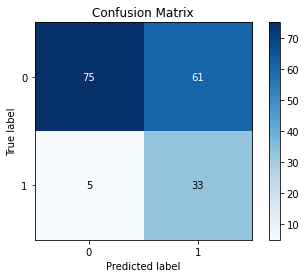

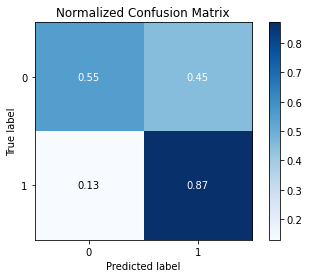

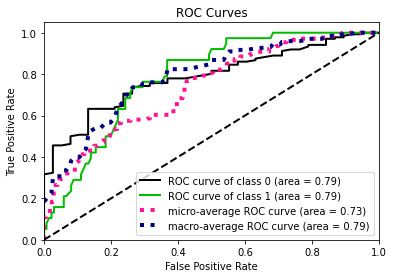

In [ ]:
preds = rf_recall.predict(X_Sud)
probs = rf_recall.predict_proba(X_Sud)
print(metrics.classification_report(y_Sud,preds))

skplt.metrics.plot_confusion_matrix(y_Sud, preds, normalize=False)
skplt.metrics.plot_confusion_matrix(y_Sud, preds, normalize=True)
skplt.metrics.plot_roc(y_Sud, probs)
plt.show()

In [ ]:
import numpy as np
from scipy.stats import sem
from sklearn.metrics import roc_auc_score

y_pred = probs[:,1]
y_true =  y_Sud.to_numpy()

print("Original ROC area: {:0.3f}".format(roc_auc_score(y_true, y_pred)))

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

Original ROC area: 0.786
Bootstrap #1 ROC area: 0.771
Bootstrap #2 ROC area: 0.767
Bootstrap #3 ROC area: 0.796
Bootstrap #4 ROC area: 0.845
Bootstrap #5 ROC area: 0.752
Bootstrap #6 ROC area: 0.790
Bootstrap #7 ROC area: 0.750
Bootstrap #8 ROC area: 0.802
Bootstrap #9 ROC area: 0.757
Bootstrap #10 ROC area: 0.806
Bootstrap #11 ROC area: 0.784
Bootstrap #12 ROC area: 0.739
Bootstrap #13 ROC area: 0.762
Bootstrap #14 ROC area: 0.842
Bootstrap #15 ROC area: 0.818
Bootstrap #16 ROC area: 0.770
Bootstrap #17 ROC area: 0.728
Bootstrap #18 ROC area: 0.742
Bootstrap #19 ROC area: 0.806
Bootstrap #20 ROC area: 0.869
Bootstrap #21 ROC area: 0.830
Bootstrap #22 ROC area: 0.760
Bootstrap #23 ROC area: 0.804
Bootstrap #24 ROC area: 0.793
Bootstrap #25 ROC area: 0.742
Bootstrap #26 ROC area: 0.738
Bootstrap #27 ROC area: 0.850
Bootstrap #28 ROC area: 0.781
Bootstrap #29 ROC area: 0.807
Bootstrap #30 ROC area: 0.787
Bootstrap #31 ROC area: 0.778
Bootstrap #32 ROC area: 0.848
Bootstrap #33 ROC area: 

In [ ]:
centro = pd.read_excel("/content/Centro.xlsx")

In [ ]:
X_cen = centro[['Dispneia',
 'Confusão Mental',
 'DM_Num',
 'Assintomático',
 'HAS_Num','Idade']]
y_cen = centro['Óbito']

              precision    recall  f1-score   support

           0       0.89      0.74      0.81        23
           1       0.00      0.00      0.00         2

    accuracy                           0.68        25
   macro avg       0.45      0.37      0.40        25
weighted avg       0.82      0.68      0.74        25



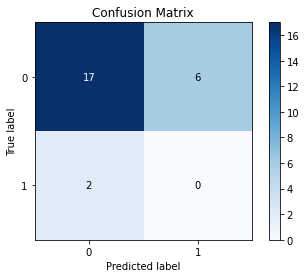

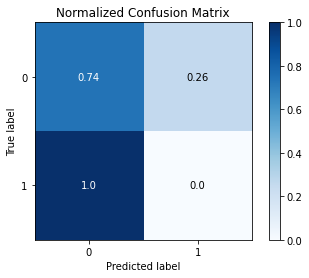

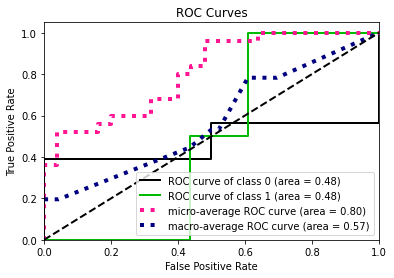

In [ ]:
preds = rf_recall.predict(X_cen)
probs = rf_recall.predict_proba(X_cen)
print(metrics.classification_report(y_cen,preds))

skplt.metrics.plot_confusion_matrix(y_cen, preds, normalize=False)
skplt.metrics.plot_confusion_matrix(y_cen, preds, normalize=True)
skplt.metrics.plot_roc(y_cen, probs)
plt.show()

In [ ]:
import numpy as np
from scipy.stats import sem
from sklearn.metrics import roc_auc_score

y_pred = probs[:,1]
y_true =  y_cen.to_numpy()

print("Original ROC area: {:0.3f}".format(roc_auc_score(y_true, y_pred)))

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

Original ROC area: 0.478
Bootstrap #1 ROC area: 0.430
Bootstrap #2 ROC area: 0.478
Bootstrap #3 ROC area: 0.543
Bootstrap #4 ROC area: 0.652
Bootstrap #7 ROC area: 0.457
Bootstrap #8 ROC area: 0.348
Bootstrap #9 ROC area: 0.435
Bootstrap #10 ROC area: 0.394
Bootstrap #11 ROC area: 0.174
Bootstrap #12 ROC area: 0.364
Bootstrap #13 ROC area: 0.283
Bootstrap #14 ROC area: 0.457
Bootstrap #15 ROC area: 0.452
Bootstrap #17 ROC area: 0.292
Bootstrap #18 ROC area: 0.530
Bootstrap #19 ROC area: 0.545
Bootstrap #20 ROC area: 0.439
Bootstrap #21 ROC area: 0.261
Bootstrap #23 ROC area: 0.435
Bootstrap #24 ROC area: 0.458
Bootstrap #25 ROC area: 0.400
Bootstrap #26 ROC area: 0.750
Bootstrap #27 ROC area: 0.208
Bootstrap #28 ROC area: 0.424
Bootstrap #29 ROC area: 0.606
Bootstrap #30 ROC area: 0.439
Bootstrap #31 ROC area: 0.667
Bootstrap #32 ROC area: 0.524
Bootstrap #34 ROC area: 0.457
Bootstrap #35 ROC area: 0.543
Bootstrap #36 ROC area: 0.375
Bootstrap #37 ROC area: 0.667
Bootstrap #38 ROC area

Publico / privado

In [ ]:
publico = pd.read_excel("/content/Publico.xlsx")

In [ ]:
X_pub = publico[['Dispneia',
 'Confusão Mental',
 'DM_Num',
 'Assintomático',
 'HAS_Num','Idade']]
y_pub = publico['Óbito']

              precision    recall  f1-score   support

           0       0.89      0.74      0.81        23
           1       0.00      0.00      0.00         2

    accuracy                           0.68        25
   macro avg       0.45      0.37      0.40        25
weighted avg       0.82      0.68      0.74        25



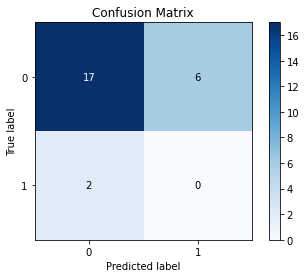

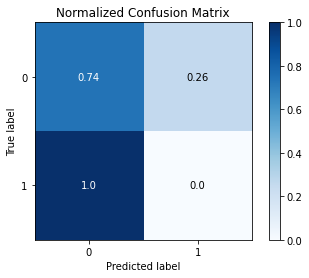

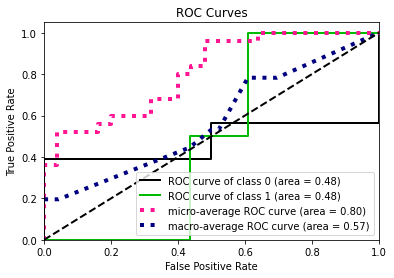

In [ ]:
preds = rf_recall.predict(X_pub)
probs = rf_recall.predict_proba(X_pub)
print(metrics.classification_report(y_pub,preds))

skplt.metrics.plot_confusion_matrix(y_pub, preds, normalize=False)
skplt.metrics.plot_confusion_matrix(y_pub, preds, normalize=True)
skplt.metrics.plot_roc(y_pub, probs)
plt.show()

In [ ]:
import numpy as np
from scipy.stats import sem
from sklearn.metrics import roc_auc_score

y_pred = probs[:,1]
y_true =  y_pub.to_numpy()

print("Original ROC area: {:0.3f}".format(roc_auc_score(y_true, y_pred)))

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

Original ROC area: 0.478
Bootstrap #1 ROC area: 0.430
Bootstrap #2 ROC area: 0.478
Bootstrap #3 ROC area: 0.543
Bootstrap #4 ROC area: 0.652
Bootstrap #7 ROC area: 0.457
Bootstrap #8 ROC area: 0.348
Bootstrap #9 ROC area: 0.435
Bootstrap #10 ROC area: 0.394
Bootstrap #11 ROC area: 0.174
Bootstrap #12 ROC area: 0.364
Bootstrap #13 ROC area: 0.283
Bootstrap #14 ROC area: 0.457
Bootstrap #15 ROC area: 0.452
Bootstrap #17 ROC area: 0.292
Bootstrap #18 ROC area: 0.530
Bootstrap #19 ROC area: 0.545
Bootstrap #20 ROC area: 0.439
Bootstrap #21 ROC area: 0.261
Bootstrap #23 ROC area: 0.435
Bootstrap #24 ROC area: 0.458
Bootstrap #25 ROC area: 0.400
Bootstrap #26 ROC area: 0.750
Bootstrap #27 ROC area: 0.208
Bootstrap #28 ROC area: 0.424
Bootstrap #29 ROC area: 0.606
Bootstrap #30 ROC area: 0.439
Bootstrap #31 ROC area: 0.667
Bootstrap #32 ROC area: 0.524
Bootstrap #34 ROC area: 0.457
Bootstrap #35 ROC area: 0.543
Bootstrap #36 ROC area: 0.375
Bootstrap #37 ROC area: 0.667
Bootstrap #38 ROC area

In [ ]:
privado = pd.read_excel("/content/Privado.xlsx")

In [ ]:
X_pri = privado[['Dispneia',
 'Confusão Mental',
 'DM_Num',
 'Assintomático',
 'HAS_Num','Idade']]
y_pri = privado['Óbito']

              precision    recall  f1-score   support

           0       0.93      0.64      0.76       193
           1       0.33      0.80      0.47        44

    accuracy                           0.67       237
   macro avg       0.63      0.72      0.61       237
weighted avg       0.82      0.67      0.70       237



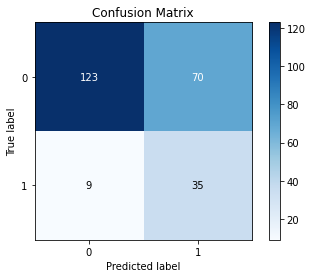

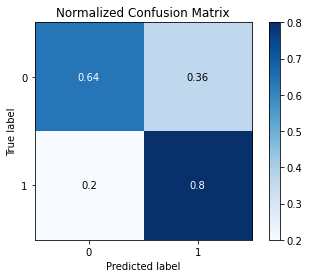

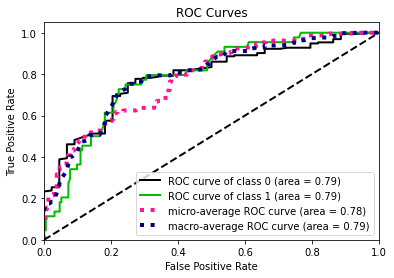

In [ ]:
preds = rf_recall.predict(X_pri)
probs = rf_recall.predict_proba(X_pri)
print(metrics.classification_report(y_pri,preds))

skplt.metrics.plot_confusion_matrix(y_pri, preds, normalize=False)
skplt.metrics.plot_confusion_matrix(y_pri, preds, normalize=True)
skplt.metrics.plot_roc(y_pri, probs)
plt.show()

In [ ]:
import numpy as np
from scipy.stats import sem
from sklearn.metrics import roc_auc_score

y_pred = probs[:,1]
y_true =  y_pri.to_numpy()

print("Original ROC area: {:0.3f}".format(roc_auc_score(y_true, y_pred)))

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

Original ROC area: 0.788
Bootstrap #1 ROC area: 0.847
Bootstrap #2 ROC area: 0.748
Bootstrap #3 ROC area: 0.830
Bootstrap #4 ROC area: 0.834
Bootstrap #5 ROC area: 0.762
Bootstrap #6 ROC area: 0.850
Bootstrap #7 ROC area: 0.745
Bootstrap #8 ROC area: 0.851
Bootstrap #9 ROC area: 0.771
Bootstrap #10 ROC area: 0.713
Bootstrap #11 ROC area: 0.758
Bootstrap #12 ROC area: 0.817
Bootstrap #13 ROC area: 0.750
Bootstrap #14 ROC area: 0.796
Bootstrap #15 ROC area: 0.848
Bootstrap #16 ROC area: 0.708
Bootstrap #17 ROC area: 0.824
Bootstrap #18 ROC area: 0.807
Bootstrap #19 ROC area: 0.737
Bootstrap #20 ROC area: 0.737
Bootstrap #21 ROC area: 0.814
Bootstrap #22 ROC area: 0.784
Bootstrap #23 ROC area: 0.735
Bootstrap #24 ROC area: 0.758
Bootstrap #25 ROC area: 0.737
Bootstrap #26 ROC area: 0.824
Bootstrap #27 ROC area: 0.712
Bootstrap #28 ROC area: 0.834
Bootstrap #29 ROC area: 0.861
Bootstrap #30 ROC area: 0.838
Bootstrap #31 ROC area: 0.739
Bootstrap #32 ROC area: 0.800
Bootstrap #33 ROC area: 

In [ ]:
filantro = pd.read_excel("/content/Filantropo.xlsx")

In [ ]:
X_fil = filantro[['Dispneia',
 'Confusão Mental',
 'DM_Num',
 'Assintomático',
 'HAS_Num','Idade']]
y_fil = filantro['Óbito']

              precision    recall  f1-score   support

           0       0.87      0.66      0.75        41
           1       0.36      0.67      0.47        12

    accuracy                           0.66        53
   macro avg       0.62      0.66      0.61        53
weighted avg       0.76      0.66      0.69        53



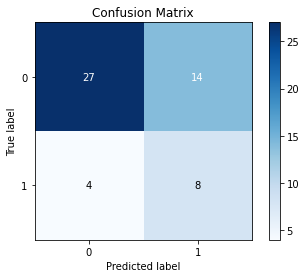

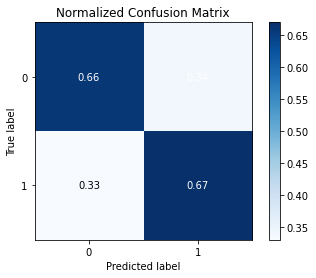

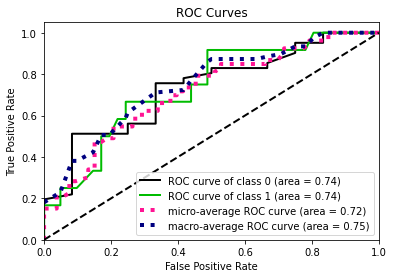

In [ ]:
preds = rf_recall.predict(X_fil)
probs = rf_recall.predict_proba(X_fil)
print(metrics.classification_report(y_fil,preds))

skplt.metrics.plot_confusion_matrix(y_fil, preds, normalize=False)
skplt.metrics.plot_confusion_matrix(y_fil, preds, normalize=True)
skplt.metrics.plot_roc(y_fil, probs)
plt.show()

In [ ]:
import numpy as np
from scipy.stats import sem
from sklearn.metrics import roc_auc_score

y_pred = probs[:,1]
y_true =  y_fil.to_numpy()

print("Original ROC area: {:0.3f}".format(roc_auc_score(y_true, y_pred)))

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

Original ROC area: 0.736
Bootstrap #1 ROC area: 0.809
Bootstrap #2 ROC area: 0.862
Bootstrap #3 ROC area: 0.817
Bootstrap #4 ROC area: 0.742
Bootstrap #5 ROC area: 0.589
Bootstrap #6 ROC area: 0.592
Bootstrap #7 ROC area: 0.908
Bootstrap #8 ROC area: 0.652
Bootstrap #9 ROC area: 0.819
Bootstrap #10 ROC area: 0.697
Bootstrap #11 ROC area: 0.722
Bootstrap #12 ROC area: 0.661
Bootstrap #13 ROC area: 0.684
Bootstrap #14 ROC area: 0.725
Bootstrap #15 ROC area: 0.727
Bootstrap #16 ROC area: 0.671
Bootstrap #17 ROC area: 0.773
Bootstrap #18 ROC area: 0.924
Bootstrap #19 ROC area: 0.665
Bootstrap #20 ROC area: 0.824
Bootstrap #21 ROC area: 0.847
Bootstrap #22 ROC area: 0.744
Bootstrap #23 ROC area: 0.814
Bootstrap #24 ROC area: 0.929
Bootstrap #25 ROC area: 0.801
Bootstrap #26 ROC area: 0.681
Bootstrap #27 ROC area: 0.520
Bootstrap #28 ROC area: 0.629
Bootstrap #29 ROC area: 0.859
Bootstrap #30 ROC area: 0.860
Bootstrap #31 ROC area: 0.713
Bootstrap #32 ROC area: 0.835
Bootstrap #33 ROC area: 

In [ ]:
prob_preds = probs
threshold = 0.37 # define threshold here
preds_cut_sens = [1 if prob_preds[i][1]> threshold else 0 for i in range(len(prob_preds))]

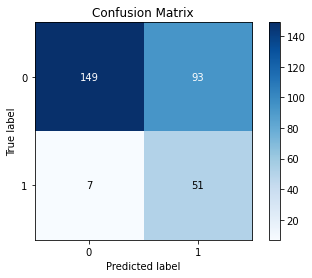

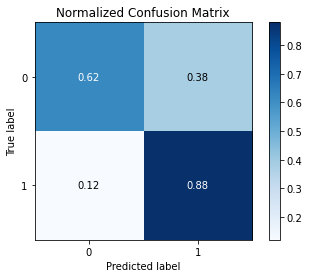

In [ ]:
skplt.metrics.plot_confusion_matrix(y4_test, preds_cut_sens, normalize=False)
skplt.metrics.plot_confusion_matrix(y4_test, preds_cut_sen, normalize=True)

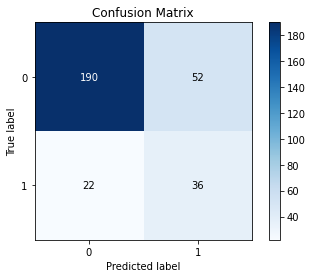

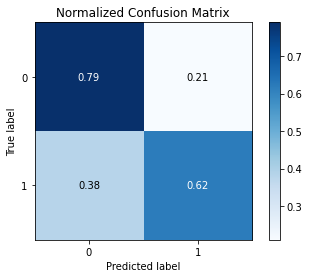

In [ ]:
prob_preds = probs
threshold = 0.57 # define threshold here
preds_cut_rec = [1 if prob_preds[i][1]> threshold else 0 for i in range(len(prob_preds))]
skplt.metrics.plot_confusion_matrix(y4_test, preds_cut_rec, normalize=False)
skplt.metrics.plot_confusion_matrix(y4_test, preds_cut_rec, normalize=True)

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
!pip install pytorch-tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import StratifiedKFold, KFold

In [ ]:
#C_data["Idade_num"] = pd.cut(C_data["Idade"], bins=[-10,0,65,200],labels=[-1, 0, 1])

In [ ]:
#C_data = C_data.drop(["Idade"], axis=1)

In [ ]:
C_data.head()

Obito_vazio_virou_0  Uso_ISRAA_Num  ...  Assintomático  Idade_num
0                    1              1  ...              0         -1
1                    0              1  ...              1          1
2                    0              0  ...              0          0
3                    1              0  ...              0          1
4                    0              1  ...              0          0

[5 rows x 29 columns]

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold

In [ ]:
y5 = C_data["Obito_vazio_virou_0"]
X5 =  C_data.drop(["Obito_vazio_virou_0"], axis=1)

In [ ]:
X5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Uso_ISRAA_Num              1497 non-null   int64
 1   TxRenalprevio_Num          1497 non-null   int64
 2   DM_Num                     1497 non-null   int64
 3   Acesso_Vasc_Num            1497 non-null   int64
 4   IMC_dic                    1497 non-null   int64
 5   Idade                      1497 non-null   int64
 6   Sexo_Numérico              1497 non-null   int64
 7   AVC_Num                    1497 non-null   int64
 8   HAS_Num                    1497 non-null   int64
 9   HIV_Num                    1497 non-null   int64
 10  ICC_Num                    1497 non-null   int64
 11  DHepCron_Num               1497 non-null   int64
 12  DPOC_Num                   1497 non-null   int64
 13  Demência_Num               1497 non-null   int64
 14  DVP_Num                 

In [ ]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, random_state=0, test_size=0.2, stratify = y5)
print('Labels in traning: {}'.format(set(y5_train)))
print('Zero count = {}, One count = {}'.format (len(y5_train) - sum(y5_train), sum(y5_train)))
print('Labels in test: {}'.format(set(y5_test)))
print('Zero count = {}, One count = {}'.format (len(y5_test) - sum(y5_test), sum(y5_test)))

Labels in traning: {0, 1}
Zero count = 966, One count = 231
Labels in test: {0, 1}
Zero count = 242, One count = 58


Salvar os dataframe

In [ ]:
X4 = C_data[['Dispneia',
 'ConfusãoMental',
 'DM_Num',
 'Assintomático',
 'HAS_Num','Idade']]
y4 = C_data['Obito_vazio_virou_0']

In [ ]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=0, test_size=0.2, stratify = y4)
print('Labels in traning: {}'.format(set(y4_train)))
print('Zero count = {}, One count = {}'.format (len(y4_train) - sum(y4_train), sum(y4_train)))
print('Labels in test: {}'.format(set(y4_test)))
print('Zero count = {}, One count = {}'.format (len(y4_test) - sum(y4_test), sum(y4_test)))

Labels in traning: {0, 1}
Zero count = 966, One count = 231
Labels in test: {0, 1}
Zero count = 242, One count = 58


In [ ]:
X4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Dispneia        1497 non-null   int64
 1   ConfusãoMental  1497 non-null   int64
 2   DM_Num          1497 non-null   int64
 3   Assintomático   1497 non-null   int64
 4   HAS_Num         1497 non-null   int64
 5   Idade           1497 non-null   int64
dtypes: int64(6)
memory usage: 70.3 KB


Support vector machine

In [ ]:
def objective(trial):

  eta0 = trial.suggest_loguniform("eta0", 0.001, 1)
  epsilon = trial.suggest_loguniform("epsilon", 0.01, 1)
  class_weight = trial.suggest_categorical("class_weight",["balanced", None])
  learning_rate = trial.suggest_categorical("learning_rate",[ "optimal", "invscaling", "adaptive"])


  svm = SGDClassifier(       epsilon=epsilon,
                    class_weight=class_weight,
                    learning_rate=learning_rate,
                    eta0=eta0
                    )
  
  score =  cross_val_score(svm,  X4_train, y4_train, cv = 5, n_jobs=-1, scoring = "balanced_accuracy")
  balanced_accuracy = score.mean()
  return balanced_accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=1200)

[I 2021-10-07 21:50:37,545] A new study created in memory with name: no-name-787d9160-d7c4-487e-9bf0-0ccc8d563cb9
[I 2021-10-07 21:50:38,748] Trial 0 finished with value: 0.5 and parameters: {'eta0': 0.0017364559279570892, 'epsilon': 0.2519205902864432, 'class_weight': None, 'learning_rate': 'adaptive'}. Best is trial 0 with value: 0.5.
[I 2021-10-07 21:50:38,816] Trial 1 finished with value: 0.6798049932399917 and parameters: {'eta0': 0.027156563679023516, 'epsilon': 0.0492061839263507, 'class_weight': 'balanced', 'learning_rate': 'invscaling'}. Best is trial 1 with value: 0.6798049932399917.
[I 2021-10-07 21:50:38,881] Trial 2 finished with value: 0.5395003612370977 and parameters: {'eta0': 0.9658397782766748, 'epsilon': 0.4772599609566318, 'class_weight': None, 'learning_rate': 'optimal'}. Best is trial 1 with value: 0.6798049932399917.
[I 2021-10-07 21:50:38,948] Trial 3 finished with value: 0.5507608388053387 and parameters: {'eta0': 0.2276955635541413, 'epsilon': 0.65401884999753

Balanced_accuracy: 0.7128022738690605
Best hyperparameters: {'eta0': 0.018691042716261628, 'epsilon': 0.02120315100609569, 'class_weight': 'balanced', 'learning_rate': 'adaptive'}
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       242
           1       0.38      0.71      0.49        58

    accuracy                           0.72       300
   macro avg       0.64      0.71      0.65       300
weighted avg       0.81      0.72      0.74       300



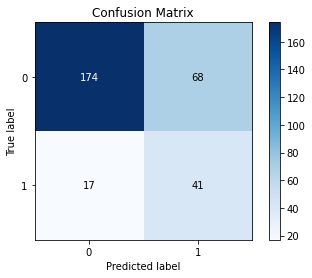

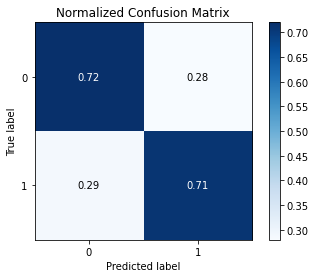

In [ ]:
trial = study.best_trial
print("Balanced_accuracy: {}".format(trial.value))
print("Best hyperparameters: {}".format(trial.params))
svm_acc = SGDClassifier(
    **trial.params

)
svm_acc.fit(X4_train, y4_train)
predss = svm_acc.predict(X4_test)
#probs = svm_acc.predict_proba(X2_test)
print(metrics.classification_report(y4_test,predss))

skplt.metrics.plot_confusion_matrix(y4_test, predss, normalize=False)
skplt.metrics.plot_confusion_matrix(y4_test, predss, normalize=True)
#skplt.metrics.plot_roc(y1_test, probs)
plt.show()

In [ ]:
X4_train = X4_train.to_numpy()
y4_train = y4_train.to_numpy()
X4_test = X4_test.to_numpy()
y4_test = y4_test.to_numpy()

In [ ]:
X5_train = X5_train.to_numpy()
y5_train = y5_train.to_numpy()
X5_test = X5_test.to_numpy()
y5_test = y5_test.to_numpy()

AttributeError: ignored

In [ ]:
features = ['Dispneia', 'ConfusãoMental', 'DM_Num', 'Assintomático', 'HAS_Num']
cat_idxs = [ i for i, f in enumerate(features)]


In [ ]:
cat_idxs

[0, 1, 2, 3, 4]

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

weight_balance = torch.tensor([1.0,4.2],device=device)

In [ ]:
def Objective_3(trial):
    mask_type = trial.suggest_categorical("mask_type", ["entmax"])
    n_d = trial.suggest_int("n_d", 4, 16, step=2)
    n_steps = trial.suggest_int("n_steps", 1, 8, step=1)
    gamma = trial.suggest_float("gamma", 1., 1.8, step=0.2)
    n_shared = trial.suggest_int("n_shared", 1, 2)
    lambda_sparse = trial.suggest_float("lambda_sparse", 1e-3, 1e-1, log=True)
    tabnet_params = dict(n_d=n_d, n_a=n_d, n_steps=n_steps, gamma=gamma,
                     lambda_sparse=lambda_sparse, optimizer_fn=torch.optim.Adam, cat_idxs=[0,1,2,3,4],  
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=mask_type, n_shared=n_shared,
                     scheduler_params=dict(mode="min",
                                           patience=trial.suggest_int("patienceScheduler",low=3,high=10), # changing sheduler patience to be lower than early stopping patience 
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=0,
                     ) #early stopping
    kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    CV_score_array    =[]
    for train_index, test_index in kf.split(X5_train, y5_train):
        X_train, X_valid = X5_train[train_index], X5_train[test_index]
        y_train, y_valid = y5_train[train_index], y5_train[test_index]
        classifier = TabNetClassifier(**tabnet_params)
        classifier.fit(X_train=X_train, y_train=y_train,
                  eval_set=[(X_valid, y_valid)],
                  patience=trial.suggest_int("patience",low=30,high=60), max_epochs=trial.suggest_int('epochs', 100, 1000),
                  eval_metric=['balanced_accuracy'],loss_fn=nn.CrossEntropyLoss(weight=weight_balance))
        CV_score_array.append(classifier.best_cost)
    avg = np.mean(CV_score_array)
    return avg

In [ ]:
study = optuna.create_study(direction="maximize", study_name='TabNet optimization')
study.optimize(Objective_3, n_trials=30) #2 horas no máximo

[I 2021-10-19 23:15:59,465] A new study created in memory with name: TabNet optimization



Early stopping occurred at epoch 80 with best_epoch = 25 and best_val_0_balanced_accuracy = 0.63652
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 200 with best_epoch = 145 and best_val_0_balanced_accuracy = 0.66081
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 77 with best_epoch = 22 and best_val_0_balanced_accuracy = 0.62244
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 95 with best_epoch = 40 and best_val_0_balanced_accuracy = 0.66151
Best weights from best epoch are automatically used!


[I 2021-10-19 23:16:47,528] Trial 0 finished with value: 0.649209149417205 and parameters: {'mask_type': 'entmax', 'n_d': 6, 'n_steps': 4, 'gamma': 1.8, 'n_shared': 2, 'lambda_sparse': 0.0661863545772368, 'patienceScheduler': 6, 'patience': 55, 'epochs': 443}. Best is trial 0 with value: 0.649209149417205.



Early stopping occurred at epoch 140 with best_epoch = 85 and best_val_0_balanced_accuracy = 0.66476
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 43 with best_epoch = 2 and best_val_0_balanced_accuracy = 0.56615
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 146 with best_epoch = 105 and best_val_0_balanced_accuracy = 0.60688
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 113 with best_epoch = 72 and best_val_0_balanced_accuracy = 0.63058
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 144 with best_epoch = 103 and best_val_0_balanced_accuracy = 0.66194
Best weights from best epoch are automatically used!


[I 2021-10-19 23:17:16,607] Trial 1 finished with value: 0.6281525130744328 and parameters: {'mask_type': 'entmax', 'n_d': 16, 'n_steps': 2, 'gamma': 1.4, 'n_shared': 1, 'lambda_sparse': 0.018842247042554588, 'patienceScheduler': 10, 'patience': 41, 'epochs': 867}. Best is trial 0 with value: 0.649209149417205.



Early stopping occurred at epoch 47 with best_epoch = 6 and best_val_0_balanced_accuracy = 0.67521
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 252 with best_epoch = 201 and best_val_0_balanced_accuracy = 0.67528
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 256 with best_epoch = 205 and best_val_0_balanced_accuracy = 0.63301
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 120 with best_epoch = 69 and best_val_0_balanced_accuracy = 0.63166
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 64 with best_epoch = 13 and best_val_0_balanced_accuracy = 0.62966
Best weights from best epoch are automatically used!


[I 2021-10-19 23:18:00,808] Trial 2 finished with value: 0.6464643486710713 and parameters: {'mask_type': 'entmax', 'n_d': 10, 'n_steps': 2, 'gamma': 1.4, 'n_shared': 2, 'lambda_sparse': 0.025640805727880123, 'patienceScheduler': 10, 'patience': 51, 'epochs': 964}. Best is trial 0 with value: 0.649209149417205.



Early stopping occurred at epoch 74 with best_epoch = 23 and best_val_0_balanced_accuracy = 0.66271
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 56 with best_epoch = 15 and best_val_0_balanced_accuracy = 0.67346
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 166 with best_epoch = 125 and best_val_0_balanced_accuracy = 0.61531
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 130 with best_epoch = 89 and best_val_0_balanced_accuracy = 0.67041
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 48 with best_epoch = 7 and best_val_0_balanced_accuracy = 0.60177
Best weights from best epoch are automatically used!


[I 2021-10-19 23:18:29,912] Trial 3 finished with value: 0.6572448105122833 and parameters: {'mask_type': 'entmax', 'n_d': 6, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 1, 'lambda_sparse': 0.0721544556075398, 'patienceScheduler': 3, 'patience': 41, 'epochs': 933}. Best is trial 3 with value: 0.6572448105122833.



Early stopping occurred at epoch 110 with best_epoch = 69 and best_val_0_balanced_accuracy = 0.72528
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 51 with best_epoch = 17 and best_val_0_balanced_accuracy = 0.60716
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 154 with best_epoch = 120 and best_val_0_balanced_accuracy = 0.72556
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 80 with best_epoch = 46 and best_val_0_balanced_accuracy = 0.60969
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 70 with best_epoch = 36 and best_val_0_balanced_accuracy = 0.70664
Best weights from best epoch are automatically used!


[I 2021-10-19 23:19:15,892] Trial 4 finished with value: 0.6461957307277247 and parameters: {'mask_type': 'entmax', 'n_d': 10, 'n_steps': 5, 'gamma': 1.6, 'n_shared': 2, 'lambda_sparse': 0.016955204430178825, 'patienceScheduler': 4, 'patience': 34, 'epochs': 363}. Best is trial 3 with value: 0.6572448105122833.



Early stopping occurred at epoch 53 with best_epoch = 19 and best_val_0_balanced_accuracy = 0.58192
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 33 with best_epoch = 3 and best_val_0_balanced_accuracy = 0.57865
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 30 with best_epoch = 0 and best_val_0_balanced_accuracy = 0.54986
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 31 with best_epoch = 1 and best_val_0_balanced_accuracy = 0.56986
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 160 with best_epoch = 130 and best_val_0_balanced_accuracy = 0.67839
Best weights from best epoch are automatically used!


[I 2021-10-19 23:19:46,438] Trial 5 finished with value: 0.611370080912549 and parameters: {'mask_type': 'entmax', 'n_d': 8, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 2, 'lambda_sparse': 0.030318142455210535, 'patienceScheduler': 3, 'patience': 30, 'epochs': 964}. Best is trial 3 with value: 0.6572448105122833.



Early stopping occurred at epoch 180 with best_epoch = 150 and best_val_0_balanced_accuracy = 0.68008
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 35 with best_epoch = 0 and best_val_0_balanced_accuracy = 0.6014
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 47 with best_epoch = 12 and best_val_0_balanced_accuracy = 0.55688
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 39 with best_epoch = 4 and best_val_0_balanced_accuracy = 0.54466
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 35 with best_epoch = 0 and best_val_0_balanced_accuracy = 0.64301
Best weights from best epoch are automatically used!


[I 2021-10-19 23:20:01,130] Trial 6 finished with value: 0.6153765827266112 and parameters: {'mask_type': 'entmax', 'n_d': 12, 'n_steps': 1, 'gamma': 1.4, 'n_shared': 2, 'lambda_sparse': 0.009606883816736762, 'patienceScheduler': 6, 'patience': 35, 'epochs': 215}. Best is trial 3 with value: 0.6572448105122833.



Early stopping occurred at epoch 185 with best_epoch = 150 and best_val_0_balanced_accuracy = 0.73093
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 116 with best_epoch = 71 and best_val_0_balanced_accuracy = 0.66264
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 69 with best_epoch = 24 and best_val_0_balanced_accuracy = 0.67008
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 88 with best_epoch = 43 and best_val_0_balanced_accuracy = 0.54761
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 155 with best_epoch = 110 and best_val_0_balanced_accuracy = 0.63178
Best weights from best epoch are automatically used!


[I 2021-10-19 23:20:36,156] Trial 7 finished with value: 0.6229734751378248 and parameters: {'mask_type': 'entmax', 'n_d': 10, 'n_steps': 3, 'gamma': 1.4, 'n_shared': 1, 'lambda_sparse': 0.02110765010262287, 'patienceScheduler': 9, 'patience': 45, 'epochs': 270}. Best is trial 3 with value: 0.6572448105122833.



Early stopping occurred at epoch 117 with best_epoch = 72 and best_val_0_balanced_accuracy = 0.60275
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 182 with best_epoch = 141 and best_val_0_balanced_accuracy = 0.66404
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 207 with best_epoch = 166 and best_val_0_balanced_accuracy = 0.70084
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 196 with best_epoch = 155 and best_val_0_balanced_accuracy = 0.65305
Best weights from best epoch are automatically used!
Stop training because you reached max_epochs = 216 with best_epoch = 175 and best_val_0_balanced_accuracy = 0.73694
Best weights from best epoch are automatically used!


[I 2021-10-19 23:22:21,678] Trial 8 finished with value: 0.6911871731391823 and parameters: {'mask_type': 'entmax', 'n_d': 4, 'n_steps': 8, 'gamma': 1.0, 'n_shared': 1, 'lambda_sparse': 0.006729576039526925, 'patienceScheduler': 10, 'patience': 41, 'epochs': 216}. Best is trial 8 with value: 0.6911871731391823.



Early stopping occurred at epoch 139 with best_epoch = 98 and best_val_0_balanced_accuracy = 0.70106
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 93 with best_epoch = 40 and best_val_0_balanced_accuracy = 0.67584
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 70 with best_epoch = 17 and best_val_0_balanced_accuracy = 0.60913
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 63 with best_epoch = 10 and best_val_0_balanced_accuracy = 0.53493
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 129 with best_epoch = 76 and best_val_0_balanced_accuracy = 0.66109
Best weights from best epoch are automatically used!


[I 2021-10-19 23:22:47,645] Trial 9 finished with value: 0.6136842310866306 and parameters: {'mask_type': 'entmax', 'n_d': 6, 'n_steps': 3, 'gamma': 1.4, 'n_shared': 1, 'lambda_sparse': 0.0010462215714350219, 'patienceScheduler': 9, 'patience': 53, 'epochs': 387}. Best is trial 8 with value: 0.6911871731391823.



Early stopping occurred at epoch 103 with best_epoch = 50 and best_val_0_balanced_accuracy = 0.58743
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 206 with best_epoch = 147 and best_val_0_balanced_accuracy = 0.69466
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 197 with best_epoch = 138 and best_val_0_balanced_accuracy = 0.73553
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 183 with best_epoch = 124 and best_val_0_balanced_accuracy = 0.64938
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 281 with best_epoch = 222 and best_val_0_balanced_accuracy = 0.71194
Best weights from best epoch are automatically used!


[I 2021-10-19 23:24:41,038] Trial 10 finished with value: 0.6993900185068533 and parameters: {'mask_type': 'entmax', 'n_d': 4, 'n_steps': 8, 'gamma': 1.0, 'n_shared': 1, 'lambda_sparse': 0.0038149597690225966, 'patienceScheduler': 8, 'patience': 59, 'epochs': 661}. Best is trial 10 with value: 0.6993900185068533.



Early stopping occurred at epoch 151 with best_epoch = 92 and best_val_0_balanced_accuracy = 0.70544
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 210 with best_epoch = 152 and best_val_0_balanced_accuracy = 0.67247
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 224 with best_epoch = 166 and best_val_0_balanced_accuracy = 0.70492
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 128 with best_epoch = 70 and best_val_0_balanced_accuracy = 0.62972
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 188 with best_epoch = 130 and best_val_0_balanced_accuracy = 0.68531
Best weights from best epoch are automatically used!


[I 2021-10-19 23:26:31,296] Trial 11 finished with value: 0.6854747325295791 and parameters: {'mask_type': 'entmax', 'n_d': 4, 'n_steps': 8, 'gamma': 1.0, 'n_shared': 1, 'lambda_sparse': 0.00362612472556423, 'patienceScheduler': 8, 'patience': 58, 'epochs': 648}. Best is trial 10 with value: 0.6993900185068533.



Early stopping occurred at epoch 241 with best_epoch = 183 and best_val_0_balanced_accuracy = 0.73496
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 98 with best_epoch = 51 and best_val_0_balanced_accuracy = 0.64944
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 47 with best_epoch = 0 and best_val_0_balanced_accuracy = 0.51419
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 230 with best_epoch = 183 and best_val_0_balanced_accuracy = 0.65111
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 47 with best_epoch = 0 and best_val_0_balanced_accuracy = 0.52189
Best weights from best epoch are automatically used!


[I 2021-10-19 23:27:36,788] Trial 12 finished with value: 0.6099522069056442 and parameters: {'mask_type': 'entmax', 'n_d': 4, 'n_steps': 8, 'gamma': 1.2, 'n_shared': 1, 'lambda_sparse': 0.003940115030906784, 'patienceScheduler': 8, 'patience': 47, 'epochs': 660}. Best is trial 10 with value: 0.6993900185068533.



Early stopping occurred at epoch 163 with best_epoch = 116 and best_val_0_balanced_accuracy = 0.71314
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 81 with best_epoch = 21 and best_val_0_balanced_accuracy = 0.61081
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 73 with best_epoch = 13 and best_val_0_balanced_accuracy = 0.60941
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 94 with best_epoch = 34 and best_val_0_balanced_accuracy = 0.57145
Best weights from best epoch are automatically used!
Stop training because you reached max_epochs = 111 with best_epoch = 79 and best_val_0_balanced_accuracy = 0.67281
Best weights from best epoch are automatically used!


[I 2021-10-19 23:28:17,110] Trial 13 finished with value: 0.6204251693206178 and parameters: {'mask_type': 'entmax', 'n_d': 4, 'n_steps': 6, 'gamma': 1.2, 'n_shared': 1, 'lambda_sparse': 0.004399693773814222, 'patienceScheduler': 7, 'patience': 60, 'epochs': 111}. Best is trial 10 with value: 0.6993900185068533.



Early stopping occurred at epoch 103 with best_epoch = 43 and best_val_0_balanced_accuracy = 0.63764
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 75 with best_epoch = 34 and best_val_0_balanced_accuracy = 0.64508
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 65 with best_epoch = 24 and best_val_0_balanced_accuracy = 0.63848
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 89 with best_epoch = 48 and best_val_0_balanced_accuracy = 0.65586
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 174 with best_epoch = 133 and best_val_0_balanced_accuracy = 0.67846
Best weights from best epoch are automatically used!


[I 2021-10-19 23:29:24,123] Trial 14 finished with value: 0.6627306886600354 and parameters: {'mask_type': 'entmax', 'n_d': 14, 'n_steps': 7, 'gamma': 1.2, 'n_shared': 1, 'lambda_sparse': 0.001524625189836204, 'patienceScheduler': 8, 'patience': 41, 'epochs': 565}. Best is trial 10 with value: 0.6993900185068533.



Early stopping occurred at epoch 68 with best_epoch = 27 and best_val_0_balanced_accuracy = 0.69576
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 56 with best_epoch = 9 and best_val_0_balanced_accuracy = 0.63525
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 64 with best_epoch = 17 and best_val_0_balanced_accuracy = 0.61685
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 54 with best_epoch = 7 and best_val_0_balanced_accuracy = 0.58636
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 53 with best_epoch = 6 and best_val_0_balanced_accuracy = 0.59188
Best weights from best epoch are automatically used!


[I 2021-10-19 23:29:56,733] Trial 15 finished with value: 0.6136111070418823 and parameters: {'mask_type': 'entmax', 'n_d': 8, 'n_steps': 7, 'gamma': 1.0, 'n_shared': 1, 'lambda_sparse': 0.007318915961851643, 'patienceScheduler': 10, 'patience': 47, 'epochs': 715}. Best is trial 10 with value: 0.6993900185068533.



Early stopping occurred at epoch 53 with best_epoch = 6 and best_val_0_balanced_accuracy = 0.63771
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 110 with best_epoch = 73 and best_val_0_balanced_accuracy = 0.63778
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 202 with best_epoch = 165 and best_val_0_balanced_accuracy = 0.69494
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 85 with best_epoch = 48 and best_val_0_balanced_accuracy = 0.70239
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 137 with best_epoch = 100 and best_val_0_balanced_accuracy = 0.70064
Best weights from best epoch are automatically used!


[I 2021-10-19 23:30:55,814] Trial 16 finished with value: 0.6565147175873705 and parameters: {'mask_type': 'entmax', 'n_d': 8, 'n_steps': 6, 'gamma': 1.2, 'n_shared': 1, 'lambda_sparse': 0.00238585955482155, 'patienceScheduler': 7, 'patience': 37, 'epochs': 488}. Best is trial 10 with value: 0.6993900185068533.



Early stopping occurred at epoch 40 with best_epoch = 3 and best_val_0_balanced_accuracy = 0.54682
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 207 with best_epoch = 158 and best_val_0_balanced_accuracy = 0.67837
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 267 with best_epoch = 218 and best_val_0_balanced_accuracy = 0.70548
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 165 with best_epoch = 116 and best_val_0_balanced_accuracy = 0.66587
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 242 with best_epoch = 193 and best_val_0_balanced_accuracy = 0.74138
Best weights from best epoch are automatically used!


[I 2021-10-19 23:32:43,532] Trial 17 finished with value: 0.7050434105347456 and parameters: {'mask_type': 'entmax', 'n_d': 4, 'n_steps': 7, 'gamma': 1.0, 'n_shared': 1, 'lambda_sparse': 0.006608035885105865, 'patienceScheduler': 9, 'patience': 49, 'epochs': 795}. Best is trial 17 with value: 0.7050434105347456.



Early stopping occurred at epoch 196 with best_epoch = 147 and best_val_0_balanced_accuracy = 0.73411
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 172 with best_epoch = 122 and best_val_0_balanced_accuracy = 0.65871
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 59 with best_epoch = 9 and best_val_0_balanced_accuracy = 0.63694
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 68 with best_epoch = 18 and best_val_0_balanced_accuracy = 0.6161
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 259 with best_epoch = 209 and best_val_0_balanced_accuracy = 0.69986
Best weights from best epoch are automatically used!


[I 2021-10-19 23:33:50,956] Trial 18 finished with value: 0.6452880403732622 and parameters: {'mask_type': 'entmax', 'n_d': 6, 'n_steps': 7, 'gamma': 1.6, 'n_shared': 1, 'lambda_sparse': 0.002328636736434192, 'patienceScheduler': 9, 'patience': 50, 'epochs': 817}. Best is trial 17 with value: 0.7050434105347456.



Early stopping occurred at epoch 53 with best_epoch = 3 and best_val_0_balanced_accuracy = 0.61483
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 162 with best_epoch = 103 and best_val_0_balanced_accuracy = 0.59705
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 124 with best_epoch = 65 and best_val_0_balanced_accuracy = 0.54242
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 220 with best_epoch = 161 and best_val_0_balanced_accuracy = 0.65305
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 287 with best_epoch = 228 and best_val_0_balanced_accuracy = 0.70989
Best weights from best epoch are automatically used!


[I 2021-10-19 23:35:30,112] Trial 19 finished with value: 0.6209051633632665 and parameters: {'mask_type': 'entmax', 'n_d': 12, 'n_steps': 6, 'gamma': 1.2, 'n_shared': 1, 'lambda_sparse': 0.005698216498409365, 'patienceScheduler': 5, 'patience': 59, 'epochs': 776}. Best is trial 17 with value: 0.7050434105347456.



Early stopping occurred at epoch 63 with best_epoch = 4 and best_val_0_balanced_accuracy = 0.60212
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 167 with best_epoch = 111 and best_val_0_balanced_accuracy = 0.65843
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 130 with best_epoch = 74 and best_val_0_balanced_accuracy = 0.71306
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 177 with best_epoch = 121 and best_val_0_balanced_accuracy = 0.67833
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 245 with best_epoch = 189 and best_val_0_balanced_accuracy = 0.73376
Best weights from best epoch are automatically used!


[I 2021-10-19 23:37:05,653] Trial 20 finished with value: 0.7040325041872366 and parameters: {'mask_type': 'entmax', 'n_d': 6, 'n_steps': 5, 'gamma': 1.0, 'n_shared': 2, 'lambda_sparse': 0.011863817564583544, 'patienceScheduler': 7, 'patience': 56, 'epochs': 643}. Best is trial 17 with value: 0.7050434105347456.



Early stopping occurred at epoch 263 with best_epoch = 207 and best_val_0_balanced_accuracy = 0.73658
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 161 with best_epoch = 105 and best_val_0_balanced_accuracy = 0.70154
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 76 with best_epoch = 20 and best_val_0_balanced_accuracy = 0.72921
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 87 with best_epoch = 31 and best_val_0_balanced_accuracy = 0.6532
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 79 with best_epoch = 23 and best_val_0_balanced_accuracy = 0.62288
Best weights from best epoch are automatically used!


[I 2021-10-19 23:37:48,913] Trial 21 finished with value: 0.6820596321091464 and parameters: {'mask_type': 'entmax', 'n_d': 4, 'n_steps': 5, 'gamma': 1.0, 'n_shared': 2, 'lambda_sparse': 0.013702716719954952, 'patienceScheduler': 7, 'patience': 56, 'epochs': 577}. Best is trial 17 with value: 0.7050434105347456.



Early stopping occurred at epoch 92 with best_epoch = 36 and best_val_0_balanced_accuracy = 0.70346
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 173 with best_epoch = 117 and best_val_0_balanced_accuracy = 0.67935
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 175 with best_epoch = 119 and best_val_0_balanced_accuracy = 0.71334
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 124 with best_epoch = 68 and best_val_0_balanced_accuracy = 0.65673
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 101 with best_epoch = 45 and best_val_0_balanced_accuracy = 0.66031
Best weights from best epoch are automatically used!


[I 2021-10-19 23:39:13,835] Trial 22 finished with value: 0.6660429515257167 and parameters: {'mask_type': 'entmax', 'n_d': 6, 'n_steps': 7, 'gamma': 1.0, 'n_shared': 2, 'lambda_sparse': 0.01075096119950602, 'patienceScheduler': 8, 'patience': 56, 'epochs': 723}. Best is trial 17 with value: 0.7050434105347456.



Early stopping occurred at epoch 94 with best_epoch = 38 and best_val_0_balanced_accuracy = 0.62048
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 93 with best_epoch = 41 and best_val_0_balanced_accuracy = 0.7177
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 125 with best_epoch = 73 and best_val_0_balanced_accuracy = 0.73301
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 78 with best_epoch = 26 and best_val_0_balanced_accuracy = 0.62288
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 211 with best_epoch = 159 and best_val_0_balanced_accuracy = 0.70791
Best weights from best epoch are automatically used!


[I 2021-10-19 23:40:06,086] Trial 23 finished with value: 0.6940234094604691 and parameters: {'mask_type': 'entmax', 'n_d': 4, 'n_steps': 5, 'gamma': 1.2, 'n_shared': 2, 'lambda_sparse': 0.002622148807407128, 'patienceScheduler': 9, 'patience': 52, 'epochs': 645}. Best is trial 17 with value: 0.7050434105347456.



Early stopping occurred at epoch 88 with best_epoch = 36 and best_val_0_balanced_accuracy = 0.68863
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 205 with best_epoch = 156 and best_val_0_balanced_accuracy = 0.70983
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 55 with best_epoch = 6 and best_val_0_balanced_accuracy = 0.61938
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 63 with best_epoch = 14 and best_val_0_balanced_accuracy = 0.63253
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 168 with best_epoch = 119 and best_val_0_balanced_accuracy = 0.69541
Best weights from best epoch are automatically used!


[I 2021-10-19 23:41:47,586] Trial 24 finished with value: 0.6797915293301886 and parameters: {'mask_type': 'entmax', 'n_d': 8, 'n_steps': 8, 'gamma': 1.0, 'n_shared': 2, 'lambda_sparse': 0.04123069690597869, 'patienceScheduler': 6, 'patience': 49, 'epochs': 849}. Best is trial 17 with value: 0.7050434105347456.



Early stopping occurred at epoch 180 with best_epoch = 131 and best_val_0_balanced_accuracy = 0.74181
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 234 with best_epoch = 180 and best_val_0_balanced_accuracy = 0.67992
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 180 with best_epoch = 126 and best_val_0_balanced_accuracy = 0.64031
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 145 with best_epoch = 91 and best_val_0_balanced_accuracy = 0.66256
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 153 with best_epoch = 99 and best_val_0_balanced_accuracy = 0.68121
Best weights from best epoch are automatically used!


[I 2021-10-19 23:43:08,098] Trial 25 finished with value: 0.6802718773957585 and parameters: {'mask_type': 'entmax', 'n_d': 6, 'n_steps': 6, 'gamma': 1.2, 'n_shared': 1, 'lambda_sparse': 0.009817667815475951, 'patienceScheduler': 5, 'patience': 54, 'epochs': 750}. Best is trial 17 with value: 0.7050434105347456.



Early stopping occurred at epoch 122 with best_epoch = 68 and best_val_0_balanced_accuracy = 0.73736
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 62 with best_epoch = 5 and best_val_0_balanced_accuracy = 0.6236
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 71 with best_epoch = 14 and best_val_0_balanced_accuracy = 0.62135
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 104 with best_epoch = 47 and best_val_0_balanced_accuracy = 0.63778
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 180 with best_epoch = 123 and best_val_0_balanced_accuracy = 0.74181
Best weights from best epoch are automatically used!


[I 2021-10-19 23:43:44,019] Trial 26 finished with value: 0.6577038561641494 and parameters: {'mask_type': 'entmax', 'n_d': 4, 'n_steps': 4, 'gamma': 1.0, 'n_shared': 2, 'lambda_sparse': 0.005802372608818712, 'patienceScheduler': 7, 'patience': 57, 'epochs': 529}. Best is trial 17 with value: 0.7050434105347456.



Early stopping occurred at epoch 66 with best_epoch = 9 and best_val_0_balanced_accuracy = 0.66398
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 227 with best_epoch = 168 and best_val_0_balanced_accuracy = 0.69803
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 65 with best_epoch = 6 and best_val_0_balanced_accuracy = 0.61924
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 76 with best_epoch = 17 and best_val_0_balanced_accuracy = 0.63865
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 71 with best_epoch = 12 and best_val_0_balanced_accuracy = 0.60579
Best weights from best epoch are automatically used!


[I 2021-10-19 23:44:48,102] Trial 27 finished with value: 0.6551396193154906 and parameters: {'mask_type': 'entmax', 'n_d': 6, 'n_steps': 7, 'gamma': 1.6, 'n_shared': 1, 'lambda_sparse': 0.011792387462989485, 'patienceScheduler': 8, 'patience': 59, 'epochs': 612}. Best is trial 17 with value: 0.7050434105347456.



Early stopping occurred at epoch 148 with best_epoch = 89 and best_val_0_balanced_accuracy = 0.71398
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 70 with best_epoch = 16 and best_val_0_balanced_accuracy = 0.58118
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 200 with best_epoch = 146 and best_val_0_balanced_accuracy = 0.68961
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 100 with best_epoch = 46 and best_val_0_balanced_accuracy = 0.62619
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 128 with best_epoch = 74 and best_val_0_balanced_accuracy = 0.63058
Best weights from best epoch are automatically used!


[I 2021-10-19 23:46:31,883] Trial 28 finished with value: 0.6488017666964534 and parameters: {'mask_type': 'entmax', 'n_d': 8, 'n_steps': 8, 'gamma': 1.8, 'n_shared': 2, 'lambda_sparse': 0.0018190148341143031, 'patienceScheduler': 9, 'patience': 54, 'epochs': 697}. Best is trial 17 with value: 0.7050434105347456.



Early stopping occurred at epoch 189 with best_epoch = 135 and best_val_0_balanced_accuracy = 0.71645
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 115 with best_epoch = 67 and best_val_0_balanced_accuracy = 0.65407
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 68 with best_epoch = 20 and best_val_0_balanced_accuracy = 0.70772
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 123 with best_epoch = 75 and best_val_0_balanced_accuracy = 0.64355
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 57 with best_epoch = 9 and best_val_0_balanced_accuracy = 0.64336
Best weights from best epoch are automatically used!


[I 2021-10-19 23:47:09,537] Trial 29 finished with value: 0.6679473873108419 and parameters: {'mask_type': 'entmax', 'n_d': 6, 'n_steps': 4, 'gamma': 1.2, 'n_shared': 1, 'lambda_sparse': 0.04014326302798361, 'patienceScheduler': 5, 'patience': 48, 'epochs': 474}. Best is trial 17 with value: 0.7050434105347456.



Early stopping occurred at epoch 177 with best_epoch = 129 and best_val_0_balanced_accuracy = 0.69103
Best weights from best epoch are automatically used!


In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
trial = study.best_trial
print("Best hyperparameters: {}".format(trial.params))
TabNet_params = study.best_params

final_params = dict(n_d=TabNet_params['n_d'], n_a=TabNet_params['n_d'], n_steps=TabNet_params['n_steps'], gamma=TabNet_params['gamma'],
                     lambda_sparse=TabNet_params['lambda_sparse'], optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=TabNet_params['mask_type'], n_shared=TabNet_params['n_shared'],
                     scheduler_params=dict(mode="min",
                                           patience=TabNet_params['patienceScheduler'],
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=0,
                     )
epochs = TabNet_params['epochs']
"""rf_recall.fit(X4_train, y4_train)
preds = rf_recall.predict(X4_test)
probs = rf_recall.predict_proba(X4_test)
print(metrics.classification_report(y4_test,preds))

skplt.metrics.plot_confusion_matrix(y4_test, preds, normalize=False)
skplt.metrics.plot_confusion_matrix(y4_test, preds, normalize=True)
skplt.metrics.plot_roc(y4_test, probs)
plt.show()"""

Best hyperparameters: {'mask_type': 'entmax', 'n_d': 8, 'n_steps': 4, 'gamma': 1.6, 'n_shared': 1, 'lambda_sparse': 0.0008791354293180571, 'patienceScheduler': 3, 'patience': 50, 'epochs': 633}


'rf_recall.fit(X4_train, y4_train)\npreds = rf_recall.predict(X4_test)\nprobs = rf_recall.predict_proba(X4_test)\nprint(metrics.classification_report(y4_test,preds))\n\nskplt.metrics.plot_confusion_matrix(y4_test, preds, normalize=False)\nskplt.metrics.plot_confusion_matrix(y4_test, preds, normalize=True)\nskplt.metrics.plot_roc(y4_test, probs)\nplt.show()'

In [ ]:
classifier = TabNetClassifier(**final_params)
classifier.fit(X_train=X4_train, y_train=y4_train, eval_set=None,eval_name=None,
          patience=TabNet_params['patience'], max_epochs=epochs,loss_fn=nn.CrossEntropyLoss(weight=weight_balance))


No early stopping will be performed, last training weights will be used.


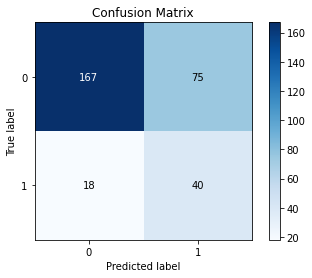

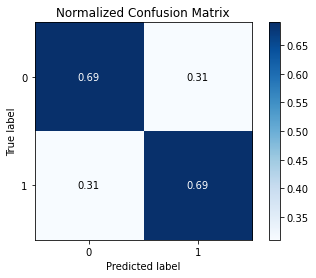

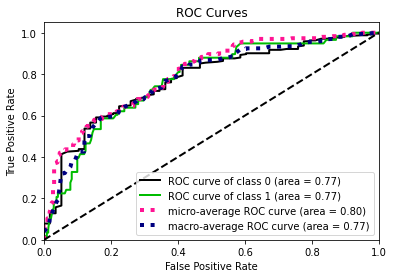

In [ ]:
pred = classifier.predict(X4_test)
prob = classifier.predict_proba(X4_test)
skplt.metrics.plot_confusion_matrix(y4_test, pred, normalize=False)
skplt.metrics.plot_confusion_matrix(y4_test, pred, normalize=True)
skplt.metrics.plot_roc(y4_test, prob)
plt.show()

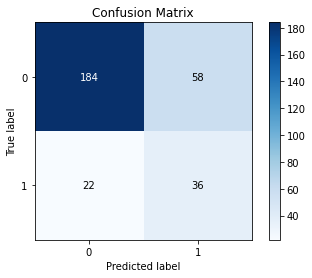

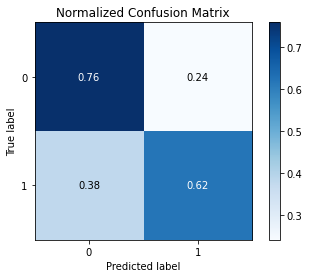

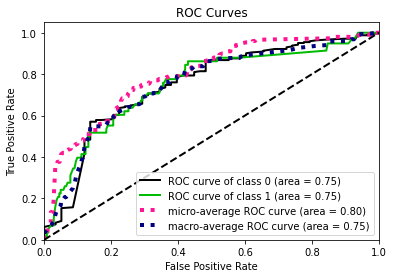

In [ ]:
pred = classifier.predict(X4_test)
prob = classifier.predict_proba(X4_test)
skplt.metrics.plot_confusion_matrix(y4_test, pred, normalize=False)
skplt.metrics.plot_confusion_matrix(y4_test, pred, normalize=True)
skplt.metrics.plot_roc(y4_test, prob)
plt.show()

In [ ]:
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
predictions_array =[]
proba_array = []
CV_score_array    =[]
for train_index, test_index in kf.split(X,y):
    X_train, X_valid = X[train_index], X[test_index]
    y_train, y_valid = y[train_index], y[test_index]
    classifier = TabNetClassifier(verbose=0,seed=42)
    classifier.fit(X_train=X_train, y_train=y_train,
              eval_set=[(X_valid, y_valid)],
              patience=50, max_epochs=2000,
              eval_metric=['auc'])
    CV_score_array.append(classifier.best_cost)
    predictions_array.append(classifier.predict(X5_test))
    proba_array.append(classifier.predict_proba(X5_test))
     

predictions = np.mean(CV_score_array,axis=0)
predictions_array = np.asarray(predictions_array)
proba_array = np.asarray(proba_array)

NameError: ignored

In [ ]:
pred = predictions_array[:][4]
prob = proba_array[:][4]

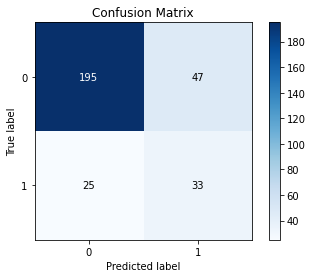

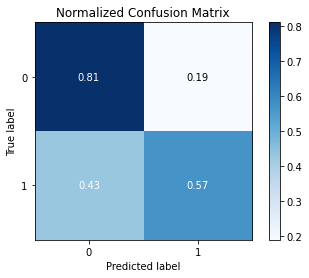

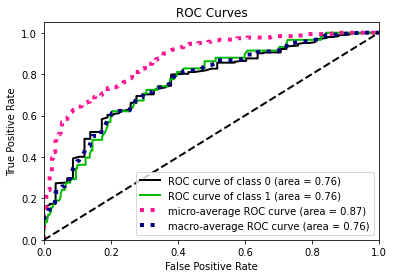

In [ ]:
skplt.metrics.plot_confusion_matrix(y5_test, pred, normalize=False)
skplt.metrics.plot_confusion_matrix(y5_test, pred, normalize=True)
skplt.metrics.plot_roc(y5_test, prob)
plt.show()

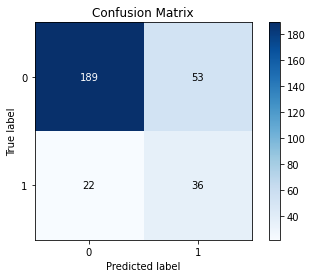

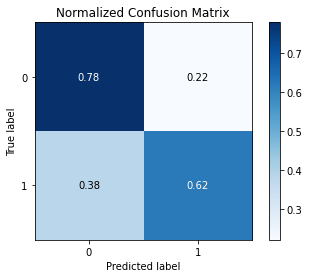

In [ ]:
prob_preds = prob
threshold = 0.47 # define threshold here
preds_cut_sens = [1 if prob_preds[i][1]> threshold else 0 for i in range(len(prob_preds))]
skplt.metrics.plot_confusion_matrix(y5_test, preds_cut_sens, normalize=False)
skplt.metrics.plot_confusion_matrix(y5_test, preds_cut_sens, normalize=True)

Binarização Idade para o suport vector machine


In [ ]:
!pip install shap

     |████████████████████████████████| 371 kB 4.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509234 sha256=01602d3b28290b9fb29db636620bcb098254c75d8b91c561bfaecbf47ce3d9fb
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
trial = study.best_trial
print("Recall: {}".format(trial.value))
print("Best hyperparameters: {}".format(trial.params))
rf_recall = RandomForestClassifier(
    **trial.params)

Recall: 0.7532839962997224
Best hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 637, 'class_weight': 'balanced_subsample'}


In [ ]:
rf_recall.fit(X4_train, y4_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=3,
                       n_estimators=637)

In [ ]:
X_select

Uso_ISRAA_Num  TxRenalprevio_Num  ...  ConfusãoMental  Assintomático
1               1.0                0.0  ...               0              1
2               0.0                0.0  ...               0              0
3               0.0                0.0  ...               0              0
4               1.0                0.0  ...               0              0
5               1.0                0.0  ...               0              0
...             ...                ...  ...             ...            ...
1492            1.0                0.0  ...               0              0
1493            0.0                0.0  ...               0              1
1494            1.0                0.0  ...               0              0
1495            0.0                0.0  ...               0              0
1496            0.0                0.0  ...               0              0

[1359 rows x 27 columns]

In [ ]:
X_select = X_select[['Dispneia', 'Idade','ConfusãoMental', 'DM_Num', 'Assintomático', 'HAS_Num']]

In [ ]:
X_select.columns = ['Dyspnea', 'Age','Mental confusion', 'Diabetes', 'Asymptomatic', 'Arterial hypertension']

In [ ]:
my_model = rf_recall.fit(X_select, y_select)

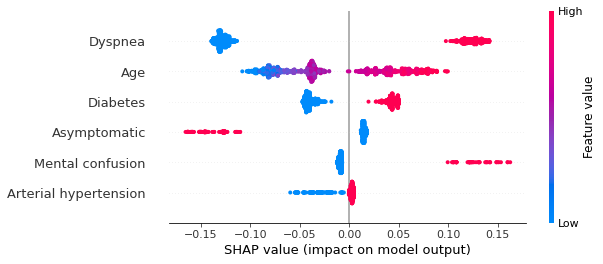

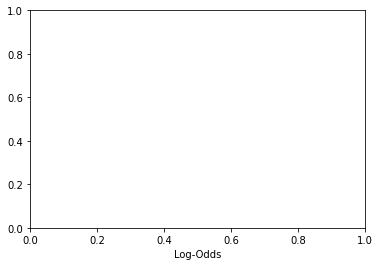

In [ ]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_select)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_select)
plt.xlabel("Log-Odds")
# plt.savefig("my_dependence_plot.pdf") # we can save a PDF of the figure if we want
plt.show()

In [ ]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

RGB_val = 255

color01= (0,150,200)  # Blue wanted
color04= (220,60,60)  # red wanted
Colors = [color01, color04]

# Creating a blue red palette transition for graphics
Colors= [(R/RGB_val,G/RGB_val,B/RGB_val) for idx, (R,G,B) in enumerate(Colors)]
n = 256

# Start of the creation of the gradient
Color01= ListedColormap(Colors[0], name='Color01', N=None)
Color04= ListedColormap(Colors[1], name='Color04', N=None)
top = cm.get_cmap(Color01,128)
bottom = cm.get_cmap(Color04,128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))

mymin0 = newcolors[0][0]
mymin1 = newcolors[0][1]
mymin2 = newcolors[0][2]
mymin3 = newcolors[0][3]
mymax0 = newcolors[255][0]
mymax1 = newcolors[255][1]
mymax2 = newcolors[255][2]
mymax3 = newcolors[255][3]

GradientBlueRed= [np.linspace(mymin0, mymax0,  n),
                   np.linspace(mymin1, mymax1,  n),
                   np.linspace(mymin2, mymax2,  n),
                   np.linspace(mymin3, mymax3,  n)]

GradientBlueRed_res =np.transpose(GradientBlueRed)

# End of the creation of the gradient

newcmp = ListedColormap(GradientBlueRed_res, name='BlueRed')

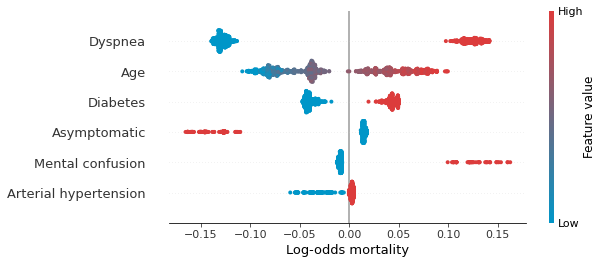

In [ ]:
# Create colormap
newcmp = ListedColormap(GradientBlueRed_res, name='BlueRed')

# Plot the summary without showing it
plt.figure()
shap.summary_plot(shap_values[1], X_select, show=False)


# Change the colormap of the artists
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newcmp)
plt.xlabel("Log-odds mortality")
# plt.savefig("my_dependence_plot.pdf") # we can save a PDF of the figure if we want
plt.show(fre)

In [ ]:
X_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 1 to 1496
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Dyspnea                1359 non-null   int64  
 1   Age                    1359 non-null   float64
 2   Mental confusion       1359 non-null   int64  
 3   Diabetes               1359 non-null   int64  
 4   Asymptomatic           1359 non-null   int64  
 5   Arterial hypertension  1359 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 74.3 KB


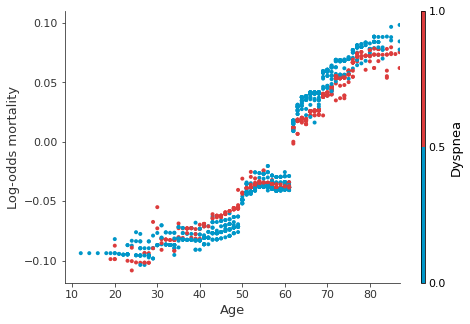

In [ ]:
shap.dependence_plot('Age', shap_values[1], X_select, interaction_index="Dyspnea", show=False,xmax="percentile(99)")

for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newcmp)
plt.ylabel("Log-odds mortality")
# plt.savefig("my_dependence_plot.pdf") # we can save a PDF of the figure if we want
plt.show()

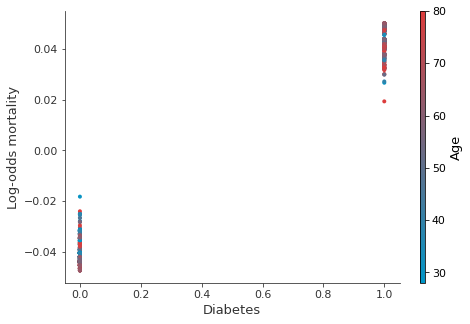

In [ ]:
shap.dependence_plot('Diabetes', shap_values[1], X_select, interaction_index="Age", show=False)

for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newcmp)
plt.ylabel("Log-odds mortality")
# plt.savefig("my_dependence_plot.pdf") # we can save a PDF of the figure if we want
plt.show()

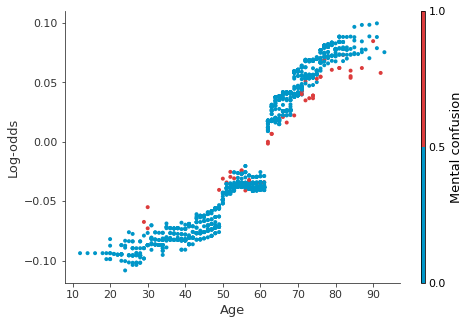

In [ ]:
shap.dependence_plot('Age', shap_values[1], X_select, interaction_index="Mental confusion", show=False)

for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newcmp)
plt.ylabel("Log-odds mortality")
# plt.savefig("my_dependence_plot.pdf") # we can save a PDF of the figure if we want
plt.show()

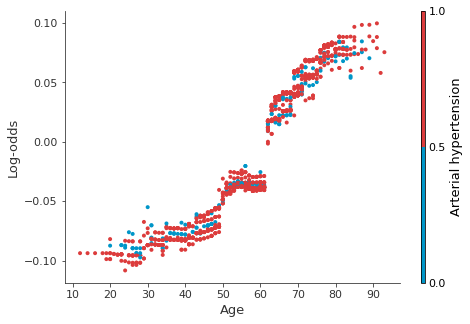

In [ ]:
shap.dependence_plot('Age', shap_values[1], X_select, interaction_index="Arterial hypertension", show=False)

for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newcmp)
plt.ylabel("Log-odds")
# plt.savefig("my_dependence_plot.pdf") # we can save a PDF of the figure if we want
plt.show()

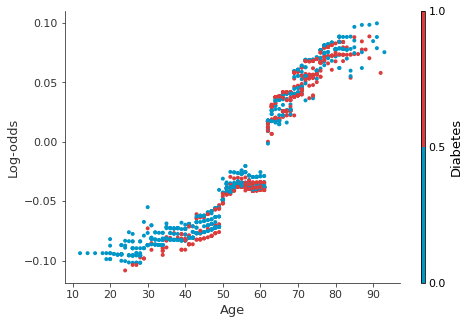

In [ ]:
shap.dependence_plot('Age', shap_values[1], X_select, interaction_index="Diabetes", show=False)

for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newcmp)
plt.ylabel("Log-odds")
# plt.savefig("my_dependence_plot.pdf") # we can save a PDF of the figure if we want
plt.show()

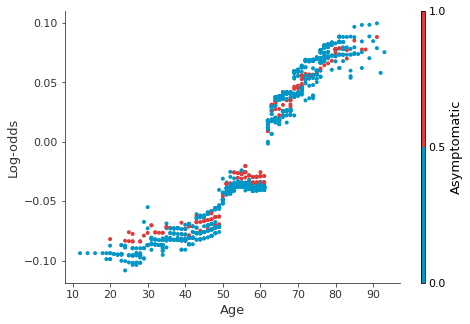

In [ ]:
shap.dependence_plot('Age', shap_values[1], X_select, interaction_index="Asymptomatic", show=False)

for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newcmp)
plt.ylabel("Log-odds")
# plt.savefig("my_dependence_plot.pdf") # we can save a PDF of the figure if we want
plt.show()

In [ ]:
shap_values = explainer.shap_values(X4_train)

In [ ]:
shap.plots.beeswarm(shap_values)

UnboundLocalError: ignored

In [ ]:
shap.plots.scatter(shap_values[:,"Idade"], color=shap_values)

TypeError: ignored

In [ ]:
def objective(trial):

  max_depth = trial.suggest_int("max_depth",1,5)
  gamma = trial.suggest_uniform('gamma', 0, 5)
  reg_lambda = trial.suggest_int('reg_lambda', 0, 5)
  min_child_weight = trial.suggest_int('min_child_weight', 5, 20)
  n_estimators = trial.suggest_int("n_estimators",100, 1000)
  early_stopping_rounds = trial.suggest_int("early_stopping_rounds",5,30)
  learning_rate = trial.suggest_loguniform('learning_rate',0.00001,1)
  base_score = trial.suggest_uniform("base_score",0.1, 0.9)


  xgb = XGBClassifier(max_depth=max_depth,
                    gamma=gamma,
                    reg_lambda=reg_lambda,
                    min_child_weight=min_child_weight,
                    n_estimators=n_estimators,
                    early_stopping_rounds=early_stopping_rounds,
                    learning_rate=learning_rate,
                    base_score=base_score
                    )
  
  score =  cross_val_score(xgb, X4_train, y4_train, cv = 5, n_jobs=-1, scoring = "balanced_accuracy")
  balanced_accuracy = score.mean()
  return balanced_accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2021-10-20 00:08:34,329] A new study created in memory with name: no-name-93a5b640-c24e-4696-b302-870e83467059
[I 2021-10-20 00:08:36,416] Trial 0 finished with value: 0.5119636261593077 and parameters: {'max_depth': 4, 'gamma': 4.258689024662024, 'reg_lambda': 0, 'min_child_weight': 8, 'n_estimators': 443, 'early_stopping_rounds': 21, 'learning_rate': 0.29182549848820044, 'base_score': 0.36199032371065065}. Best is trial 0 with value: 0.5119636261593077.
[I 2021-10-20 00:08:37,165] Trial 1 finished with value: 0.5 and parameters: {'max_depth': 1, 'gamma': 1.3853838515025174, 'reg_lambda': 2, 'min_child_weight': 17, 'n_estimators': 709, 'early_stopping_rounds': 24, 'learning_rate': 0.0019383509772923078, 'base_score': 0.19755411335871093}. Best is trial 0 with value: 0.5119636261593077.
[I 2021-10-20 00:08:38,303] Trial 2 finished with value: 0.5169673912178743 and parameters: {'max_depth': 5, 'gamma': 2.7486853122171935, 'reg_lambda': 2, 'min_child_weight': 16, 'n_estimators': 578,

In [ ]:
trial = study.best_trial
print("Recall: {}".format(trial.value))
print("Best hyperparameters: {}".format(trial.params))
xg_recall = XGBClassifier(
    **trial.params)

Recall: 0.7532839962997224
Best hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 637, 'class_weight': 'balanced_subsample'}


SHAP explicação

In [ ]:
import shap

# train an XGBoost model
model  = xg_recal.fit(X4_train, y4_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X4_train)

explainer = shap.Explainer(model)
shap_values = explainer(X4_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[5])

ModuleNotFoundError: ignored

In [ ]:
shap.plots.force(shap_values[0])
shap.initjs()
shap.plots.force(shap_values[0])

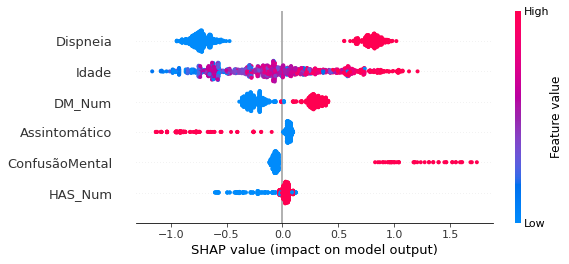

In [ ]:
shap.plots.beeswarm(shap_values)

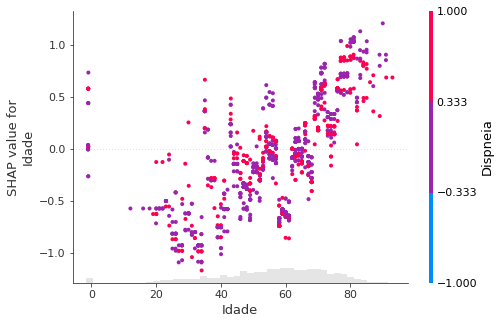

In [ ]:
shap.plots.scatter(shap_values[:,"Idade"], color=shap_values)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[0:5,:],X4_train.iloc[0:100,:], plot_cmap="DrDb")

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=0, test_size=0.2, stratify = y3)

In [ ]:
X3_train = X3_train.to_numpy()
y3_train = y3_train.to_numpy()
X3_test = X3_test.to_numpy()
y3_test = y3_test.to_numpy()

In [ ]:
len(X3_train)

1197

In [ ]:
import torch

In [ ]:
def Objective_3(trial):
    mask_type = trial.suggest_categorical("mask_type", ["entmax"])
    n_d = trial.suggest_int("n_d", 4, 16, step=2)
    n_steps = trial.suggest_int("n_steps", 1, 8, step=1)
    gamma = trial.suggest_float("gamma", 1., 1.8, step=0.2)
    n_shared = trial.suggest_int("n_shared", 1, 2)
    lambda_sparse = trial.suggest_float("lambda_sparse", 1e-3, 1e-1, log=True)
    tabnet_params = dict(n_d=n_d, n_a=n_d, n_steps=n_steps, gamma=gamma,
                     lambda_sparse=lambda_sparse, optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=mask_type, n_shared=n_shared,
                     scheduler_params=dict(mode="min",
                                           patience=trial.suggest_int("patienceScheduler",low=3,high=10), # changing sheduler patience to be lower than early stopping patience 
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=0,
                     ) #early stopping
    kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    CV_score_array    =[]
    for train_index, test_index in kf.split(X3_train, y3_train):
        X_train, X_valid = X3_train[train_index], X3_train[test_index]
        y_train, y_valid = y3_train[train_index], y3_train[test_index]
        classifier = TabNetClassifier(**tabnet_params)
        classifier.fit(X_train=X_train, y_train=y_train,
                  eval_set=[(X_valid, y_valid)],
                  patience=trial.suggest_int("patience",low=30,high=160), max_epochs=trial.suggest_int('epochs', 100, 1500),
                  eval_metric=['balanced_accuracy'],loss_fn=nn.CrossEntropyLoss(weight=weight_balance))
        CV_score_array.append(classifier.best_cost)
    avg = np.mean(CV_score_array)
    return avg

In [ ]:
study = optuna.create_study(direction="maximize", study_name='TabNet optimization_3')
study.optimize(Objective_3, n_trials=20) #2 horas no máximo

[I 2021-10-28 16:22:30,211] A new study created in memory with name: TabNet optimization_3



Early stopping occurred at epoch 95 with best_epoch = 16 and best_val_0_balanced_accuracy = 0.60018
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 206 with best_epoch = 127 and best_val_0_balanced_accuracy = 0.66018
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 83 with best_epoch = 4 and best_val_0_balanced_accuracy = 0.582
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 80 with best_epoch = 1 and best_val_0_balanced_accuracy = 0.60329
Best weights from best epoch are automatically used!


[I 2021-10-28 16:23:33,308] Trial 0 finished with value: 0.6245770862572718 and parameters: {'mask_type': 'entmax', 'n_d': 4, 'n_steps': 6, 'gamma': 1.8, 'n_shared': 2, 'lambda_sparse': 0.030173398002993606, 'patienceScheduler': 6, 'patience': 79, 'epochs': 952}. Best is trial 0 with value: 0.6245770862572718.



Early stopping occurred at epoch 128 with best_epoch = 49 and best_val_0_balanced_accuracy = 0.67724
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 266 with best_epoch = 141 and best_val_0_balanced_accuracy = 0.67627
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 326 with best_epoch = 201 and best_val_0_balanced_accuracy = 0.6959
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 325 with best_epoch = 200 and best_val_0_balanced_accuracy = 0.66338
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 536 with best_epoch = 411 and best_val_0_balanced_accuracy = 0.72083
Best weights from best epoch are automatically used!


[I 2021-10-28 16:27:29,686] Trial 1 finished with value: 0.6903713278202078 and parameters: {'mask_type': 'entmax', 'n_d': 10, 'n_steps': 6, 'gamma': 1.2, 'n_shared': 2, 'lambda_sparse': 0.002590933770179047, 'patienceScheduler': 8, 'patience': 125, 'epochs': 909}. Best is trial 1 with value: 0.6903713278202078.



Early stopping occurred at epoch 290 with best_epoch = 165 and best_val_0_balanced_accuracy = 0.69548
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 90 with best_epoch = 19 and best_val_0_balanced_accuracy = 0.68366
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 237 with best_epoch = 166 and best_val_0_balanced_accuracy = 0.73531
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 79 with best_epoch = 8 and best_val_0_balanced_accuracy = 0.65662
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 81 with best_epoch = 10 and best_val_0_balanced_accuracy = 0.64373
Best weights from best epoch are automatically used!


[I 2021-10-28 16:28:57,578] Trial 2 finished with value: 0.6853488770618321 and parameters: {'mask_type': 'entmax', 'n_d': 4, 'n_steps': 7, 'gamma': 1.0, 'n_shared': 2, 'lambda_sparse': 0.007245434878902643, 'patienceScheduler': 8, 'patience': 71, 'epochs': 445}. Best is trial 1 with value: 0.6903713278202078.



Early stopping occurred at epoch 248 with best_epoch = 177 and best_val_0_balanced_accuracy = 0.70742
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 42 with best_epoch = 11 and best_val_0_balanced_accuracy = 0.53351
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 33 with best_epoch = 2 and best_val_0_balanced_accuracy = 0.53561
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 33 with best_epoch = 2 and best_val_0_balanced_accuracy = 0.60554
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 31 with best_epoch = 0 and best_val_0_balanced_accuracy = 0.549
Best weights from best epoch are automatically used!


[I 2021-10-28 16:29:43,751] Trial 3 finished with value: 0.5859897819883096 and parameters: {'mask_type': 'entmax', 'n_d': 16, 'n_steps': 7, 'gamma': 1.6, 'n_shared': 1, 'lambda_sparse': 0.017066428546475193, 'patienceScheduler': 8, 'patience': 31, 'epochs': 1260}. Best is trial 1 with value: 0.6903713278202078.



Early stopping occurred at epoch 143 with best_epoch = 112 and best_val_0_balanced_accuracy = 0.7063
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 285 with best_epoch = 151 and best_val_0_balanced_accuracy = 0.67391
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 298 with best_epoch = 164 and best_val_0_balanced_accuracy = 0.65814
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 321 with best_epoch = 187 and best_val_0_balanced_accuracy = 0.67059
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 441 with best_epoch = 307 and best_val_0_balanced_accuracy = 0.69548
Best weights from best epoch are automatically used!


[I 2021-10-28 16:30:35,168] Trial 4 finished with value: 0.6815043641226459 and parameters: {'mask_type': 'entmax', 'n_d': 6, 'n_steps': 1, 'gamma': 1.6, 'n_shared': 1, 'lambda_sparse': 0.021474206383240723, 'patienceScheduler': 5, 'patience': 134, 'epochs': 1482}. Best is trial 1 with value: 0.6903713278202078.



Early stopping occurred at epoch 287 with best_epoch = 153 and best_val_0_balanced_accuracy = 0.70939
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 144 with best_epoch = 13 and best_val_0_balanced_accuracy = 0.68433
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 198 with best_epoch = 67 and best_val_0_balanced_accuracy = 0.733
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 232 with best_epoch = 101 and best_val_0_balanced_accuracy = 0.69081
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 189 with best_epoch = 58 and best_val_0_balanced_accuracy = 0.7032
Best weights from best epoch are automatically used!


[I 2021-10-28 16:33:41,332] Trial 5 finished with value: 0.7074803454257788 and parameters: {'mask_type': 'entmax', 'n_d': 16, 'n_steps': 6, 'gamma': 1.8, 'n_shared': 2, 'lambda_sparse': 0.042168802663206446, 'patienceScheduler': 6, 'patience': 131, 'epochs': 1359}. Best is trial 5 with value: 0.7074803454257788.



Early stopping occurred at epoch 329 with best_epoch = 198 and best_val_0_balanced_accuracy = 0.72606
Best weights from best epoch are automatically used!
Stop training because you reached max_epochs = 190 with best_epoch = 103 and best_val_0_balanced_accuracy = 0.64702
Best weights from best epoch are automatically used!
Stop training because you reached max_epochs = 190 with best_epoch = 113 and best_val_0_balanced_accuracy = 0.63113
Best weights from best epoch are automatically used!
Stop training because you reached max_epochs = 190 with best_epoch = 77 and best_val_0_balanced_accuracy = 0.66068
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 129 with best_epoch = 10 and best_val_0_balanced_accuracy = 0.65257
Best weights from best epoch are automatically used!


[I 2021-10-28 16:35:44,600] Trial 6 finished with value: 0.6636726425493076 and parameters: {'mask_type': 'entmax', 'n_d': 12, 'n_steps': 7, 'gamma': 1.8, 'n_shared': 1, 'lambda_sparse': 0.06911679847472153, 'patienceScheduler': 3, 'patience': 119, 'epochs': 190}. Best is trial 5 with value: 0.7074803454257788.


Stop training because you reached max_epochs = 190 with best_epoch = 189 and best_val_0_balanced_accuracy = 0.72697
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 140 with best_epoch = 109 and best_val_0_balanced_accuracy = 0.64792
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 47 with best_epoch = 16 and best_val_0_balanced_accuracy = 0.54663
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 113 with best_epoch = 82 and best_val_0_balanced_accuracy = 0.6239
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 151 with best_epoch = 120 and best_val_0_balanced_accuracy = 0.73789
Best weights from best epoch are automatically used!


[I 2021-10-28 16:36:38,783] Trial 7 finished with value: 0.6446541084994066 and parameters: {'mask_type': 'entmax', 'n_d': 8, 'n_steps': 4, 'gamma': 1.8, 'n_shared': 2, 'lambda_sparse': 0.00432725223026175, 'patienceScheduler': 4, 'patience': 31, 'epochs': 1469}. Best is trial 5 with value: 0.7074803454257788.



Early stopping occurred at epoch 142 with best_epoch = 111 and best_val_0_balanced_accuracy = 0.66693
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 229 with best_epoch = 107 and best_val_0_balanced_accuracy = 0.66853
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 318 with best_epoch = 196 and best_val_0_balanced_accuracy = 0.676
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 317 with best_epoch = 195 and best_val_0_balanced_accuracy = 0.64519
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 122 with best_epoch = 0 and best_val_0_balanced_accuracy = 0.56848
Best weights from best epoch are automatically used!


[I 2021-10-28 16:38:52,380] Trial 8 finished with value: 0.6559085230361349 and parameters: {'mask_type': 'entmax', 'n_d': 4, 'n_steps': 8, 'gamma': 1.8, 'n_shared': 1, 'lambda_sparse': 0.020792315315620567, 'patienceScheduler': 10, 'patience': 122, 'epochs': 559}. Best is trial 5 with value: 0.7074803454257788.



Early stopping occurred at epoch 177 with best_epoch = 55 and best_val_0_balanced_accuracy = 0.72133
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 81 with best_epoch = 10 and best_val_0_balanced_accuracy = 0.60858
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 247 with best_epoch = 176 and best_val_0_balanced_accuracy = 0.69849
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 193 with best_epoch = 122 and best_val_0_balanced_accuracy = 0.70579
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 119 with best_epoch = 48 and best_val_0_balanced_accuracy = 0.63432
Best weights from best epoch are automatically used!


[I 2021-10-28 16:40:31,879] Trial 9 finished with value: 0.6674971084478685 and parameters: {'mask_type': 'entmax', 'n_d': 8, 'n_steps': 7, 'gamma': 1.2, 'n_shared': 1, 'lambda_sparse': 0.005563735072825937, 'patienceScheduler': 4, 'patience': 71, 'epochs': 799}. Best is trial 5 with value: 0.7074803454257788.



Early stopping occurred at epoch 187 with best_epoch = 116 and best_val_0_balanced_accuracy = 0.6903
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 279 with best_epoch = 122 and best_val_0_balanced_accuracy = 0.57721
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 425 with best_epoch = 268 and best_val_0_balanced_accuracy = 0.74391
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 225 with best_epoch = 68 and best_val_0_balanced_accuracy = 0.63274
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 280 with best_epoch = 123 and best_val_0_balanced_accuracy = 0.68608
Best weights from best epoch are automatically used!


[I 2021-10-28 16:43:01,843] Trial 10 finished with value: 0.6723670643280725 and parameters: {'mask_type': 'entmax', 'n_d': 16, 'n_steps': 3, 'gamma': 1.4, 'n_shared': 2, 'lambda_sparse': 0.0883783015705471, 'patienceScheduler': 6, 'patience': 157, 'epochs': 1099}. Best is trial 5 with value: 0.7074803454257788.



Early stopping occurred at epoch 319 with best_epoch = 162 and best_val_0_balanced_accuracy = 0.7219
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 571 with best_epoch = 420 and best_val_0_balanced_accuracy = 0.72266
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 638 with best_epoch = 487 and best_val_0_balanced_accuracy = 0.67898
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 316 with best_epoch = 165 and best_val_0_balanced_accuracy = 0.67267
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 737 with best_epoch = 586 and best_val_0_balanced_accuracy = 0.69807
Best weights from best epoch are automatically used!


[I 2021-10-28 16:48:35,718] Trial 11 finished with value: 0.7022688708891028 and parameters: {'mask_type': 'entmax', 'n_d': 12, 'n_steps': 5, 'gamma': 1.2, 'n_shared': 2, 'lambda_sparse': 0.0012781569720049803, 'patienceScheduler': 8, 'patience': 151, 'epochs': 1187}. Best is trial 5 with value: 0.7074803454257788.



Early stopping occurred at epoch 410 with best_epoch = 259 and best_val_0_balanced_accuracy = 0.73896
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 295 with best_epoch = 138 and best_val_0_balanced_accuracy = 0.63413
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 495 with best_epoch = 338 and best_val_0_balanced_accuracy = 0.70654
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 335 with best_epoch = 178 and best_val_0_balanced_accuracy = 0.68613
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 423 with best_epoch = 266 and best_val_0_balanced_accuracy = 0.72083
Best weights from best epoch are automatically used!


[I 2021-10-28 16:52:35,109] Trial 12 finished with value: 0.6951333227028511 and parameters: {'mask_type': 'entmax', 'n_d': 14, 'n_steps': 5, 'gamma': 1.2, 'n_shared': 2, 'lambda_sparse': 0.0011071607704086336, 'patienceScheduler': 10, 'patience': 157, 'epochs': 1244}. Best is trial 5 with value: 0.7074803454257788.



Early stopping occurred at epoch 201 with best_epoch = 44 and best_val_0_balanced_accuracy = 0.72804
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 260 with best_epoch = 159 and best_val_0_balanced_accuracy = 0.69139
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 367 with best_epoch = 266 and best_val_0_balanced_accuracy = 0.65963
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 231 with best_epoch = 130 and best_val_0_balanced_accuracy = 0.68608
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 458 with best_epoch = 357 and best_val_0_balanced_accuracy = 0.64936
Best weights from best epoch are automatically used!


[I 2021-10-28 16:54:43,001] Trial 13 finished with value: 0.6781344304043785 and parameters: {'mask_type': 'entmax', 'n_d': 12, 'n_steps': 3, 'gamma': 1.4, 'n_shared': 2, 'lambda_sparse': 0.0016569767861409517, 'patienceScheduler': 8, 'patience': 101, 'epochs': 1292}. Best is trial 5 with value: 0.7074803454257788.



Early stopping occurred at epoch 194 with best_epoch = 93 and best_val_0_balanced_accuracy = 0.70421
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 705 with best_epoch = 563 and best_val_0_balanced_accuracy = 0.66203
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 469 with best_epoch = 327 and best_val_0_balanced_accuracy = 0.70885
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 627 with best_epoch = 485 and best_val_0_balanced_accuracy = 0.65048
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 376 with best_epoch = 234 and best_val_0_balanced_accuracy = 0.74673
Best weights from best epoch are automatically used!


[I 2021-10-28 17:00:25,467] Trial 14 finished with value: 0.6961306123251696 and parameters: {'mask_type': 'entmax', 'n_d': 14, 'n_steps': 5, 'gamma': 1.0, 'n_shared': 2, 'lambda_sparse': 0.048215697893091, 'patienceScheduler': 7, 'patience': 142, 'epochs': 1106}. Best is trial 5 with value: 0.7074803454257788.



Early stopping occurred at epoch 324 with best_epoch = 182 and best_val_0_balanced_accuracy = 0.71255
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 268 with best_epoch = 167 and best_val_0_balanced_accuracy = 0.66999
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 163 with best_epoch = 62 and best_val_0_balanced_accuracy = 0.70709
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 343 with best_epoch = 242 and best_val_0_balanced_accuracy = 0.6613
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 239 with best_epoch = 138 and best_val_0_balanced_accuracy = 0.72499
Best weights from best epoch are automatically used!


[I 2021-10-28 17:02:54,457] Trial 15 finished with value: 0.6961187728602106 and parameters: {'mask_type': 'entmax', 'n_d': 14, 'n_steps': 4, 'gamma': 1.6, 'n_shared': 2, 'lambda_sparse': 0.009886911470404228, 'patienceScheduler': 7, 'patience': 101, 'epochs': 691}. Best is trial 5 with value: 0.7074803454257788.



Early stopping occurred at epoch 285 with best_epoch = 184 and best_val_0_balanced_accuracy = 0.71722
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 157 with best_epoch = 12 and best_val_0_balanced_accuracy = 0.63649
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 352 with best_epoch = 207 and best_val_0_balanced_accuracy = 0.71227
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 322 with best_epoch = 177 and best_val_0_balanced_accuracy = 0.72291
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 264 with best_epoch = 119 and best_val_0_balanced_accuracy = 0.70939
Best weights from best epoch are automatically used!


[I 2021-10-28 17:04:26,478] Trial 16 finished with value: 0.6929320469560296 and parameters: {'mask_type': 'entmax', 'n_d': 12, 'n_steps': 2, 'gamma': 1.2, 'n_shared': 2, 'lambda_sparse': 0.003185876647761435, 'patienceScheduler': 9, 'patience': 145, 'epochs': 1115}. Best is trial 5 with value: 0.7074803454257788.



Early stopping occurred at epoch 329 with best_epoch = 184 and best_val_0_balanced_accuracy = 0.6836
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 138 with best_epoch = 26 and best_val_0_balanced_accuracy = 0.67022
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 264 with best_epoch = 152 and best_val_0_balanced_accuracy = 0.74336
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 121 with best_epoch = 9 and best_val_0_balanced_accuracy = 0.61883
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 262 with best_epoch = 150 and best_val_0_balanced_accuracy = 0.69593
Best weights from best epoch are automatically used!


[I 2021-10-28 17:07:03,474] Trial 17 finished with value: 0.6875580540208696 and parameters: {'mask_type': 'entmax', 'n_d': 16, 'n_steps': 6, 'gamma': 1.4, 'n_shared': 2, 'lambda_sparse': 0.040874898841061415, 'patienceScheduler': 5, 'patience': 112, 'epochs': 1329}. Best is trial 5 with value: 0.7074803454257788.



Early stopping occurred at epoch 128 with best_epoch = 16 and best_val_0_balanced_accuracy = 0.70945
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 234 with best_epoch = 93 and best_val_0_balanced_accuracy = 0.66831
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 272 with best_epoch = 131 and best_val_0_balanced_accuracy = 0.66564
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 377 with best_epoch = 236 and best_val_0_balanced_accuracy = 0.70894
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 277 with best_epoch = 136 and best_val_0_balanced_accuracy = 0.72753
Best weights from best epoch are automatically used!


[I 2021-10-28 17:09:53,980] Trial 18 finished with value: 0.6969089805553589 and parameters: {'mask_type': 'entmax', 'n_d': 10, 'n_steps': 5, 'gamma': 1.6, 'n_shared': 2, 'lambda_sparse': 0.01253034173176446, 'patienceScheduler': 9, 'patience': 141, 'epochs': 1024}. Best is trial 5 with value: 0.7074803454257788.



Early stopping occurred at epoch 301 with best_epoch = 160 and best_val_0_balanced_accuracy = 0.71412
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 325 with best_epoch = 238 and best_val_0_balanced_accuracy = 0.67571
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 262 with best_epoch = 175 and best_val_0_balanced_accuracy = 0.67859
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 110 with best_epoch = 23 and best_val_0_balanced_accuracy = 0.63122
Best weights from best epoch are automatically used!

Early stopping occurred at epoch 268 with best_epoch = 181 and best_val_0_balanced_accuracy = 0.70066
Best weights from best epoch are automatically used!


[I 2021-10-28 17:13:36,499] Trial 19 finished with value: 0.6764462590823792 and parameters: {'mask_type': 'entmax', 'n_d': 14, 'n_steps': 8, 'gamma': 1.0, 'n_shared': 2, 'lambda_sparse': 0.002143471965535345, 'patienceScheduler': 6, 'patience': 87, 'epochs': 1385}. Best is trial 5 with value: 0.7074803454257788.



Early stopping occurred at epoch 100 with best_epoch = 13 and best_val_0_balanced_accuracy = 0.69605
Best weights from best epoch are automatically used!


In [ ]:
trial = study.best_trial
print("Best hyperparameters: {}".format(trial.params))
TabNet_params = study.best_params

final_params = dict(n_d=TabNet_params['n_d'], n_a=TabNet_params['n_d'], n_steps=TabNet_params['n_steps'], gamma=TabNet_params['gamma'],
                     lambda_sparse=TabNet_params['lambda_sparse'], optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=TabNet_params['mask_type'], n_shared=TabNet_params['n_shared'],
                     scheduler_params=dict(mode="min",
                                           patience=TabNet_params['patienceScheduler'],
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=0,
                     )
epochs = TabNet_params['epochs']

Best hyperparameters: {'mask_type': 'entmax', 'n_d': 16, 'n_steps': 6, 'gamma': 1.8, 'n_shared': 2, 'lambda_sparse': 0.042168802663206446, 'patienceScheduler': 6, 'patience': 131, 'epochs': 1359}


In [ ]:
classifier = TabNetClassifier(**final_params)
classifier.fit(X_train=X3_train, y_train=y3_train, eval_set=None,eval_name=None,
          patience=TabNet_params['patience'], max_epochs=epochs,loss_fn=nn.CrossEntropyLoss(weight=weight_balance))

No early stopping will be performed, last training weights will be used.


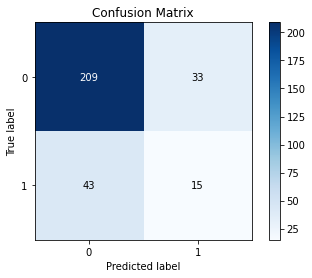

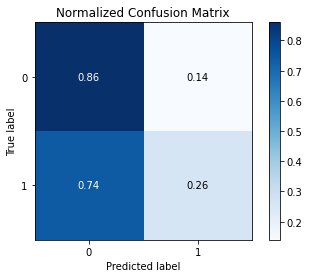

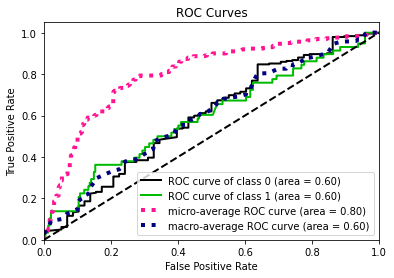

In [ ]:
pred = classifier.predict(X3_test)
prob = classifier.predict_proba(X3_test)
skplt.metrics.plot_confusion_matrix(y3_test, pred, normalize=False)
skplt.metrics.plot_confusion_matrix(y3_test, pred, normalize=True)
skplt.metrics.plot_roc(y3_test, prob)
plt.show()

In [ ]:
optuna.visualization.plot_slice(study)